<a href="https://colab.research.google.com/github/deepgolani4/Comparison-BW-SHA256-and-Blake2B/blob/master/cse519_hw1_deep_golani_116404347.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Copy this notebook (if using Colab) via `File -> Save a Copy in Drive`.

## You can do this assignment outside of Colab (using your local Python installation) via `File -> Download`.

## <u>**Use the "Text" blocks to provide explanations wherever you find them necessary. Highlight your answers inside these text fields to ensure that we don't miss it while grading your HW.**</u>

## *Please answer questions within their designated section and in the order they are asked to maintain clarity and organization. You can add new code and text blocks if you want.*

## **Setup** 🔧

- Code to download the data directly from the colab notebook.
- If you find it easier to download the data from the kaggle website (and uploading it to your drive), you can skip this section.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# First mount your drive before running these cells.
# Create a folder for the this HW and change to that dir
%cd drive/MyDrive/courses/cse519

/content/drive/MyDrive/courses/cse519


# Download data from Kaggle 📥

In [ ]:
!pip install -q kaggle

In [6]:
# Go to your Kaggle account and navigate to your account settings (click on your profile picture -> "Account").
# Scroll down to the "API" section and click "Create New API Token." This will download a kaggle.json file containing your API key.
# In your Colab notebook, run the following code to upload the kaggle.json file
from google.colab import files
files.upload()

Saving Kaggle.json to Kaggle.json


{'Kaggle.json': b'{"username":"ninjawithslowkatana","key":"bfa2acd03e76367fb37895e1c3d1295f"}'}

In [7]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [8]:
! cp Kaggle.json ~/.kaggle/

In [9]:
!kaggle datasets download -d dgawlik/nyse

Dataset URL: https://www.kaggle.com/datasets/dgawlik/nyse
License(s): CC0-1.0
 68% 21.0M/30.7M [00:00<00:00, 115MB/s] 
100% 30.7M/30.7M [00:00<00:00, 131MB/s]


# Alternate: download data using gdown (if having issues with Kaggle) 📁

In [ ]:
!pip install gdown

In [ ]:
# change
import gdown
url = 'https://drive.google.com/uc?id=1Z2raUyVZpAyICdv193t22YCT5bS9oEba'
gdown.download(url)

Downloading...
From (original): https://drive.google.com/uc?id=1Z2raUyVZpAyICdv193t22YCT5bS9oEba
From (redirected): https://drive.google.com/uc?id=1Z2raUyVZpAyICdv193t22YCT5bS9oEba&confirm=t&uuid=f364702c-68b4-4835-956e-be0390ca24d0
To: /content/drive/MyDrive/courses/cse519/nyse.zip
100%|██████████| 32.1M/32.1M [00:00<00:00, 54.3MB/s]


'nyse.zip'

# Extract data and install packages (regardless of data acquisition method) 🚀

In [10]:
!unzip nyse.zip

Archive:  nyse.zip
  inflating: fundamentals.csv        
  inflating: prices-split-adjusted.csv  
  inflating: prices.csv              
  inflating: securities.csv          


In [11]:
### TODO: Install required packages
### Student's code here
!pip install pandas
!pip install scikit-learn
!pip install numpy
!pip install matplotlib
!pip install seaborn
### END

## **Library and Data Imports**
- Import your libraries and the data here

In [74]:
### TODO: Load required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate

def printTableWithBorder(df, columnRenames):
    dfRenamed = df.rename(columns=columnRenames)
    dfRenamed = dfRenamed.reset_index(drop=True)
    dfRenamed.index += 1
    print(tabulate(dfRenamed, headers='keys', tablefmt='grid', showindex=True, stralign='center'))

headers = ["Ticker Symbol", "Company name", "Entry Date"]

###

## **Q1: Market Entry and Exit Dynamics Analysis (10 Points)**
Identify which companies in the dataset entered after data collection started (presumably new companies) and which left the exchange before the end date for data collection (perhaps going bankrupt)

In [101]:
df = pd.read_csv('prices.csv')
securitiesDf = pd.read_csv('securities.csv')

firstDate = pd.to_datetime(df['date'].min(), utc=True)
lastDate = pd.to_datetime(df['date'].max())

companiesEnteredLate = df.groupby('symbol')['date'].min()
newCompanies = companiesEnteredLate[pd.to_datetime(companiesEnteredLate, format="mixed", utc=True) > firstDate]

newCompaniesDf = pd.DataFrame(newCompanies).reset_index().rename(columns={'date': 'entry_date'})
newCompaniesWithNames = pd.merge(newCompaniesDf, securitiesDf[['Ticker symbol', 'Security']],
                                 how='left', left_on='symbol', right_on='Ticker symbol')
newCompaniesWithNames['Security'].fillna('Company Full Name Not Available', inplace=True)

print("\n\033[1mNew Companies (First price registered after the start date):\033[0m\n")
printTableWithBorder(newCompaniesWithNames[['symbol', 'Security', 'entry_date', ]],
                        {'Security': 'Company name', 'entry_date': 'Entry Date', 'symbol': 'Ticker Symbol'})


leftCmpanies=leftCmpanies = [["", "", ""]]
companyLeftEarly = df.groupby('symbol')['date'].max()
leftCmpanies = companyLeftEarly[pd.to_datetime(companyLeftEarly,format="mixed") < lastDate]
print("\n\033[Companies that left early (possibly went bankrupt or private):\033[0m\n")
print(tabulate(leftCmpanies, headers=headers, tablefmt='grid', showindex=False, stralign='center'))




New Companies (First price registered after the start date):

+-----------------+--------------------------------+---------------------+
|  Ticker Symbol  |          Company name          |     Entry Date      |
+=================+================================+=====================+
|      ABBV       |             AbbVie             |     2013-01-02      |
+-----------------+--------------------------------+---------------------+
|      ALLE       |            Allegion            |     2013-11-18      |
+-----------------+--------------------------------+---------------------+
|       CFG       |    Citizens Financial Group    |     2015-01-02      |
+-----------------+--------------------------------+---------------------+
|      CHTR       |     Charter Communications     |     2010-01-05      |
+-----------------+--------------------------------+---------------------+
|      COTY       |           Coty, Inc            |     2013-06-13      |
+-----------------+------------------

## **Q2: Ranking and Sampling (10 Points)**
Order the companies by how big/interesting/important they are, so we can restrict    analysis to the top n companies to work with to keep future computations reasonable.  Describe what ranking feature you think best here and why, and what n works for you for future analysis **given your limited compute environment**.

In [76]:
import pandas as pd
fundamentalsDf = pd.read_csv('fundamentals.csv')
pricesDf = pd.read_csv('prices.csv')
securitiesDf = pd.read_csv('securities.csv')

mergedDf = pd.merge(fundamentalsDf, pricesDf, left_on='Ticker Symbol', right_on='symbol')
mergedDf = pd.merge(mergedDf, securitiesDf[['Ticker symbol', 'Security']], left_on='Ticker Symbol', right_on='Ticker symbol')

mergedDf['Net Profit'] = mergedDf['Net Income'] /1000;
mergedDf['Revenue'] = mergedDf['Total Revenue']/1000;

groupedDf = mergedDf.groupby('Ticker Symbol')
incrementsDf = groupedDf.agg({
    'Security': 'first',
    'Net Profit': lambda x: x.diff().mean(),
    'Revenue': lambda x: x.diff().mean()
}).reset_index()


incrementsDf['Net Profit Rank'] = incrementsDf['Net Profit'].rank(ascending=False)
incrementsDf['Revenue Rank'] = incrementsDf['Revenue'].rank(ascending=False)


incrementsDf['Overall Rank'] = (incrementsDf['Net Profit Rank'] + incrementsDf['Revenue Rank'])

top100Df = incrementsDf.sort_values('Overall Rank').head(100)

printTableWithBorder(top100Df[['Security', 'Ticker Symbol', 'Revenue', 'Net Profit']],
                        {'Security': 'Company name', 'Ticker Symbol': 'Ticker Symbol'})


+-----+----------------------------------+-----------------+-----------+--------------+
|     |           Company name           |  Ticker Symbol  |   Revenue |   Net Profit |
+=====+==================================+=================+===========+==============+
|   1 |             Facebook             |       FB        | 4903.5    |    2157.53   |
+-----+----------------------------------+-----------------+-----------+--------------+
|   2 |         Gilead Sciences          |      GILD       | 3254.86   |    2201.79   |
+-----+----------------------------------+-----------------+-----------+--------------+
|   3 |            Apple Inc.            |      AAPL       | 6347.24   |    1227.47   |
+-----+----------------------------------+-----------------+-----------+--------------+
|   4 |      Verizon Communications      |       VZ        | 2238.4    |    2412.94   |
+-----+----------------------------------+-----------------+-----------+--------------+
|   5 |     American Airlines Gr

# **Ranking Algorithm**

The algorithm aims to identify the top 100 companies based on their performance in terms of net profit and revenue growth, providing a ranked list of companies for further analysis or investment consideration.


## **Q3: Stock Split Analysis (15 Points)**
There are two datafiles, one with raw prices, the other adjusted by stock splits.   Compare the pre-and-post split files to see if you can identify the dates/companies of the roughly 140 stock splits and what the ratio of each of the splits were.

In [78]:

import pandas as pd
import numpy as np
from tabulate import tabulate


def calculate_ratios(df):
    df = df.sort_values(['symbol', 'date'])
    df['ratio'] = df.groupby('symbol')['close'].shift(0) / df.groupby('symbol')['open'].shift(1)
    return df

def detect_splits(price_df, price_split_adjusted_df):
    price_df = calculate_ratios(price_df)
    price_split_adjusted_df = calculate_ratios(price_split_adjusted_df)
    merged_df = pd.merge(price_df, price_split_adjusted_df, on=['date', 'symbol'], suffixes=('', '_adjusted'))
    merged_df['split_detected'] = ((merged_df['ratio'] / merged_df['ratio_adjusted']) >1.0000001) | ((merged_df['ratio'] / merged_df['ratio_adjusted']) <0.9999999)
    merged_df['split_ratio'] =  merged_df['ratio_adjusted']/merged_df['ratio'];
    return merged_df[merged_df['split_detected']][['date', 'symbol', 'split_ratio']]

price_df = pd.read_csv('prices.csv')
price_split_adjusted_df = pd.read_csv('prices-split-adjusted.csv')
price_df['date'] = pd.to_datetime(price_df['date'], format="mixed")
price_split_adjusted_df['date'] = pd.to_datetime(price_split_adjusted_df['date'])
price_df = price_df.sort_values(['symbol', 'date'])
price_split_adjusted_df = price_split_adjusted_df.sort_values(['symbol', 'date'])
splits_df = detect_splits(price_df, price_split_adjusted_df)

column_renames = {
    'date': 'Date',
    'symbol': 'Symbol',
    'split_ratio': 'ratio'
}


printTableWithBorder(splits_df, column_renames)



+-----+---------------------+----------+------------+
|     |        Date         |  Symbol  |      ratio |
+=====+=====================+==========+============+
|   1 | 2014-11-03 00:00:00 |    A     |  1.398     |
+-----+---------------------+----------+------------+
|   2 | 2014-06-09 00:00:00 |   AAPL   |  7         |
+-----+---------------------+----------+------------+
|   3 | 2013-01-02 00:00:00 |   ABT    |  2.0842    |
+-----+---------------------+----------+------------+
|   4 | 2014-10-01 00:00:00 |   ADP    |  1.139     |
+-----+---------------------+----------+------------+
|   5 | 2012-03-19 00:00:00 |   ALK    |  2         |
+-----+---------------------+----------+------------+
|   6 | 2014-07-10 00:00:00 |   ALK    |  2         |
+-----+---------------------+----------+------------+
|   7 | 2011-05-23 00:00:00 |   ALXN   |  2         |
+-----+---------------------+----------+------------+
|   8 | 2010-12-22 00:00:00 |   AME    |  1.5       |
+-----+---------------------

Calculated the ratio of the closing price of the current day to the opening price of the next market day for both raw and adjusted price data. If the ratio is exactly the same, there is no split event; otherwise, a split event has occurred

## **Q4: Pairs Trading Strategy and Correlation Analysis (20 Points)**
Pairs trading is an investment strategy which relies on identifying pairs of stocks which move in the same direction each day – if stock A goes up (down) on a given day, then stock B likely goes up (down) the same day.   So:

<ol type="a">
 <li>Construct an appropriate daily time series for each stock reflecting how much it goes up or down each day.</li>
 <li>Construct a pairwise correlation matrix measuring how in sync these movements are among all pairs of your n top stocks.   Present this pairwise correlation matrix in a way to make its lesson as clear as possible to the viewer.</li>
 <li>Identify which pairs are most and least strongly correlated in their movements, and propose some reasonable explanations why this is the case.</li>
 <li> The 'securities.csv' file contains the economic sector which each company participates in.  Do companies within the same economic sector have stronger or weaker price correlations than those in different sectors? </li>
</ol>



### **Part a**

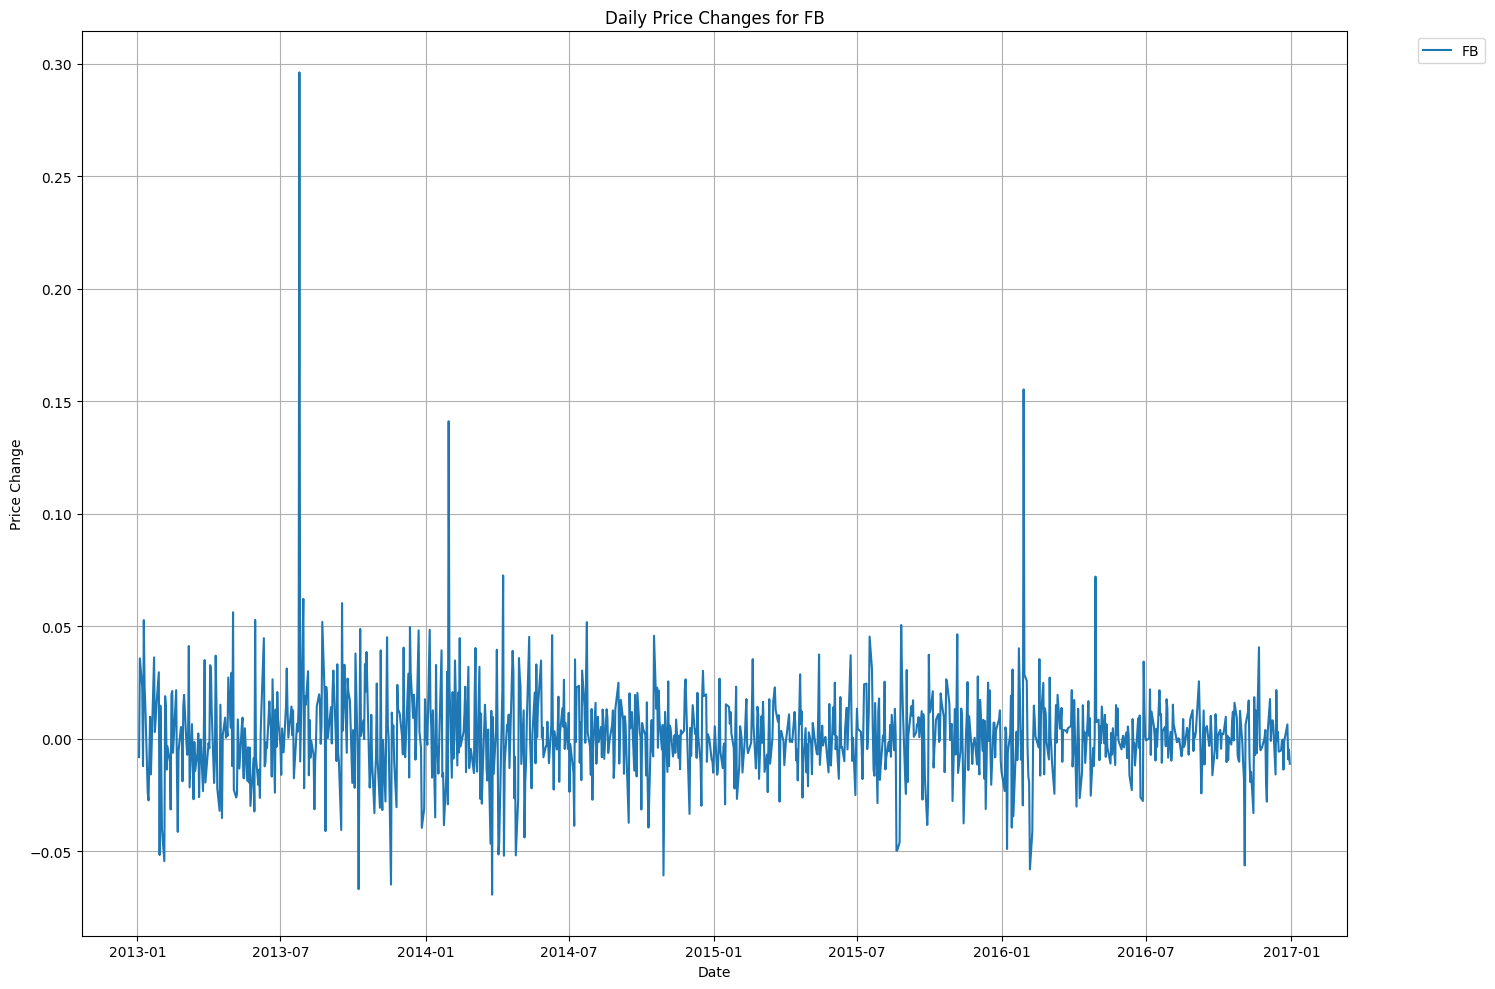

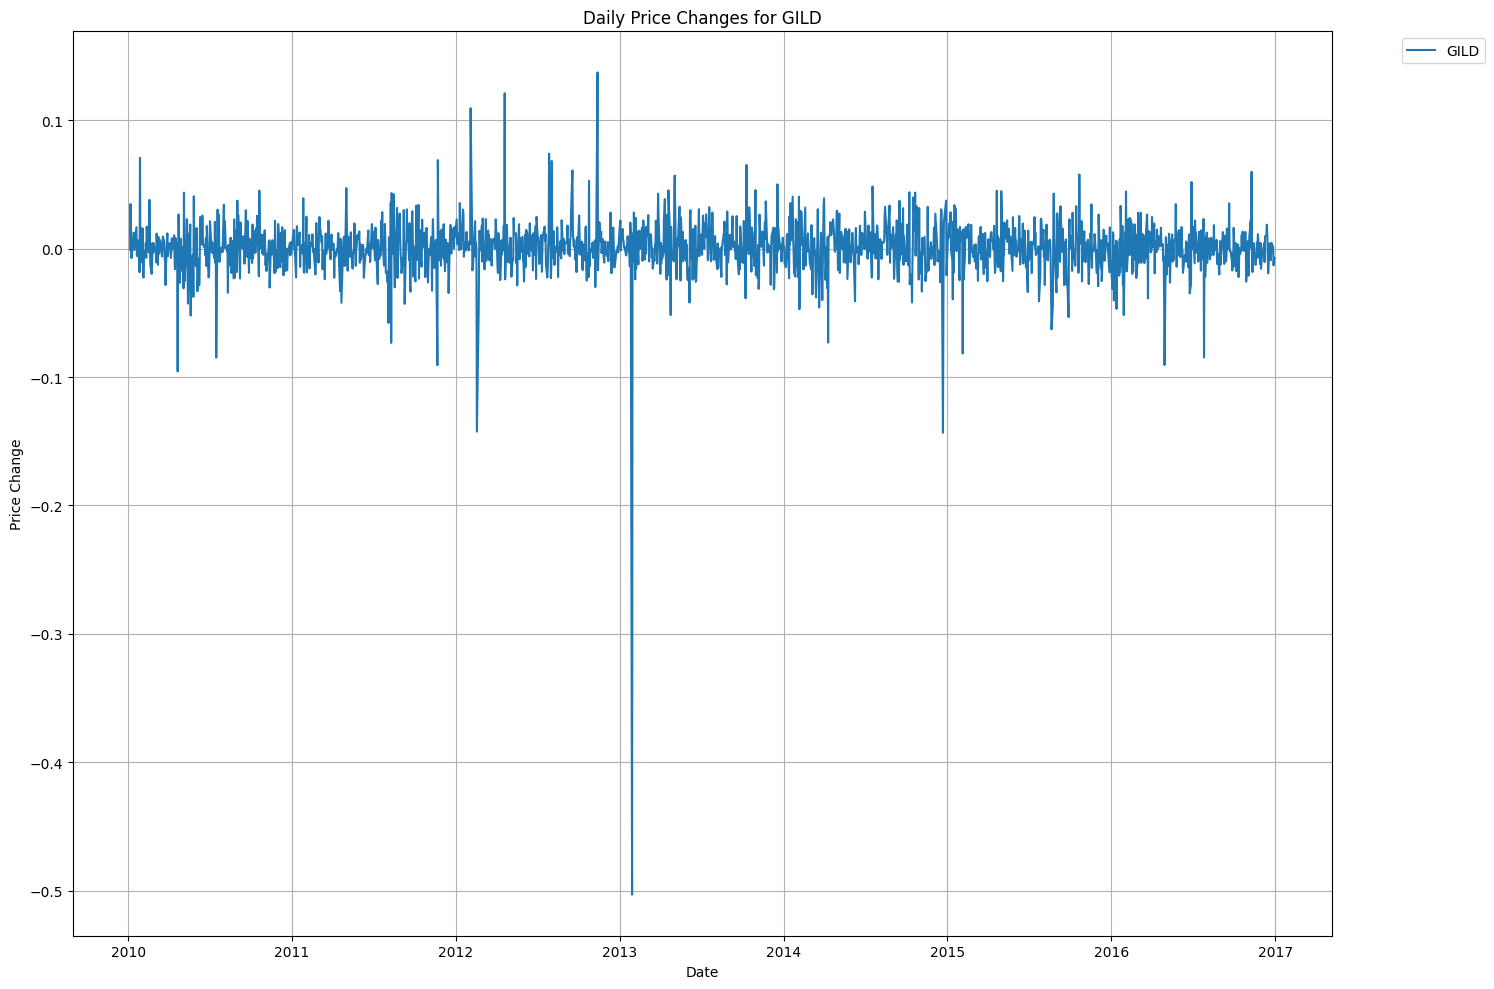

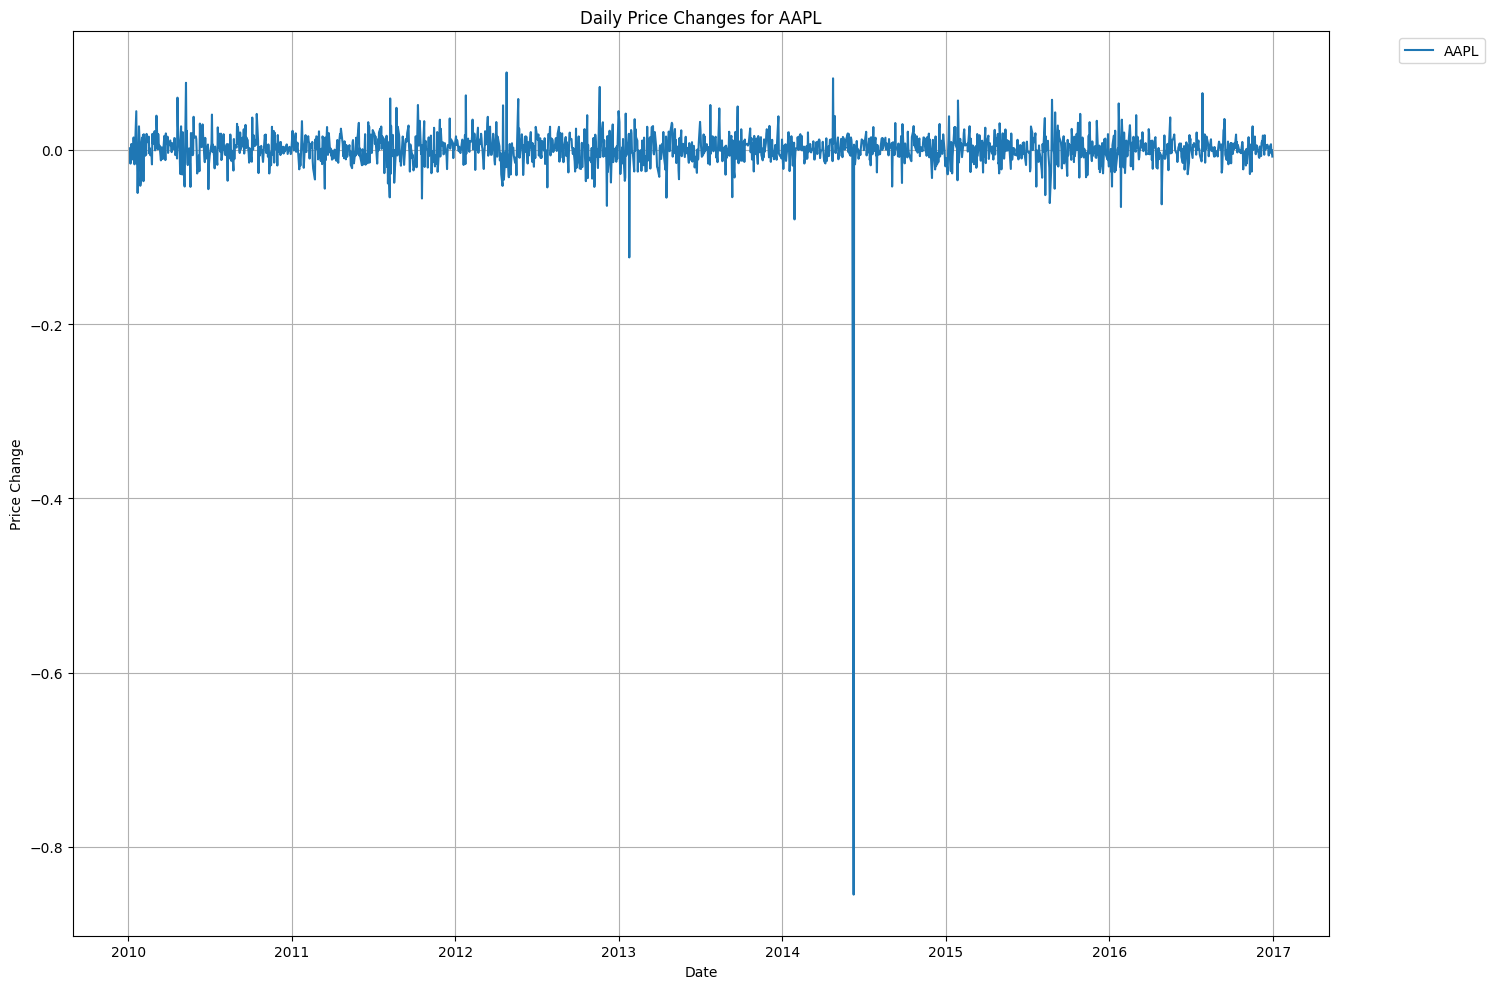

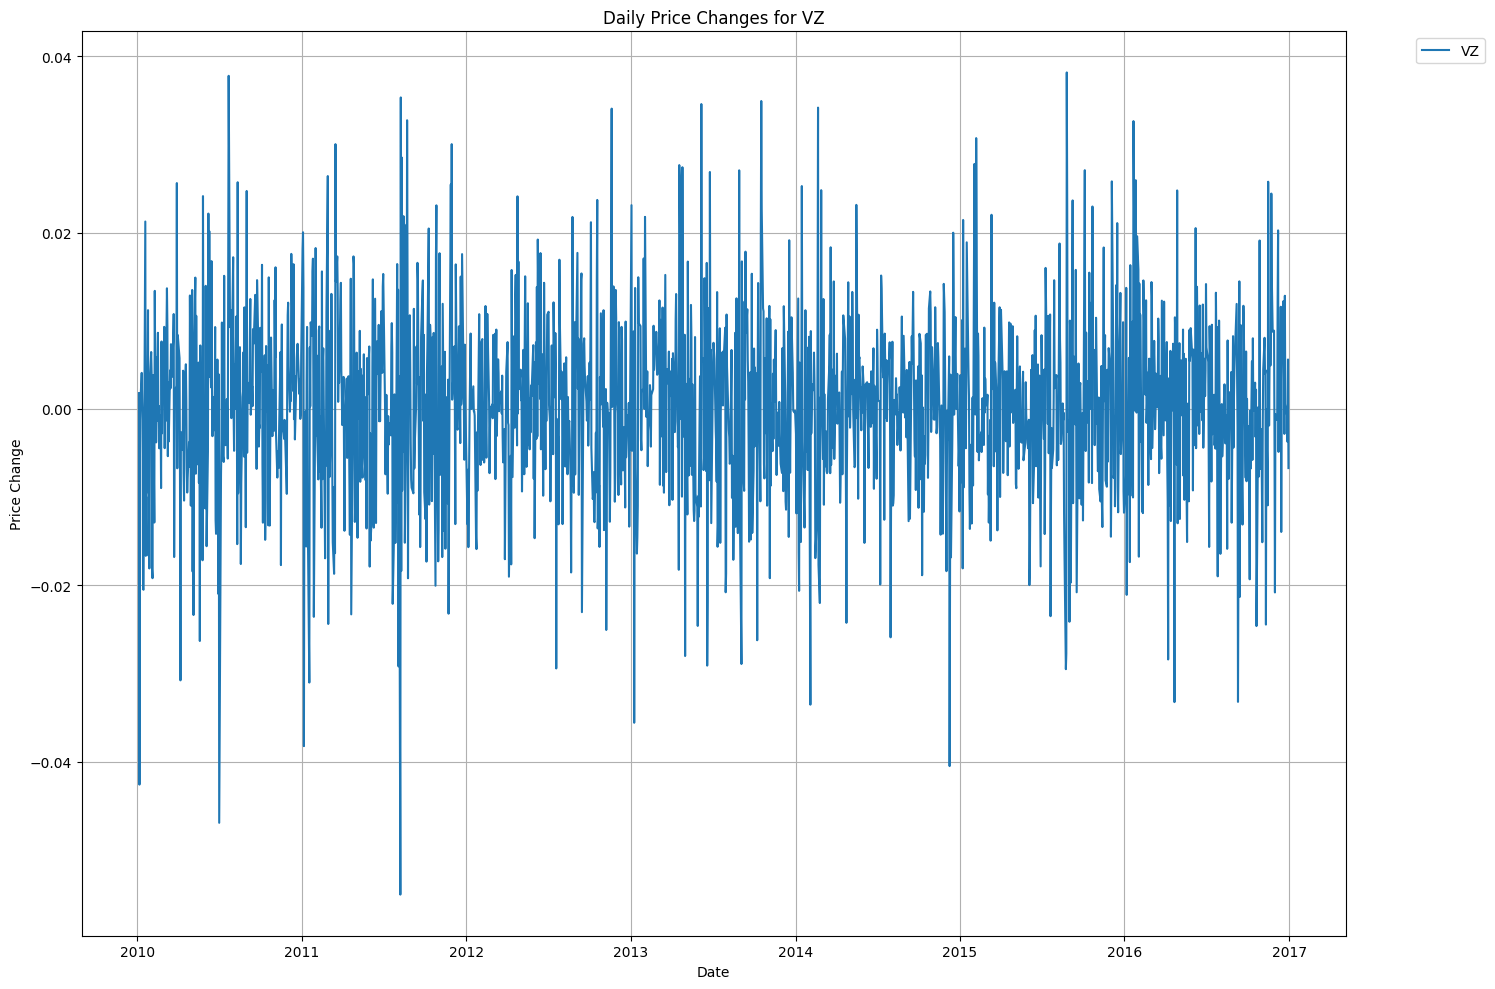

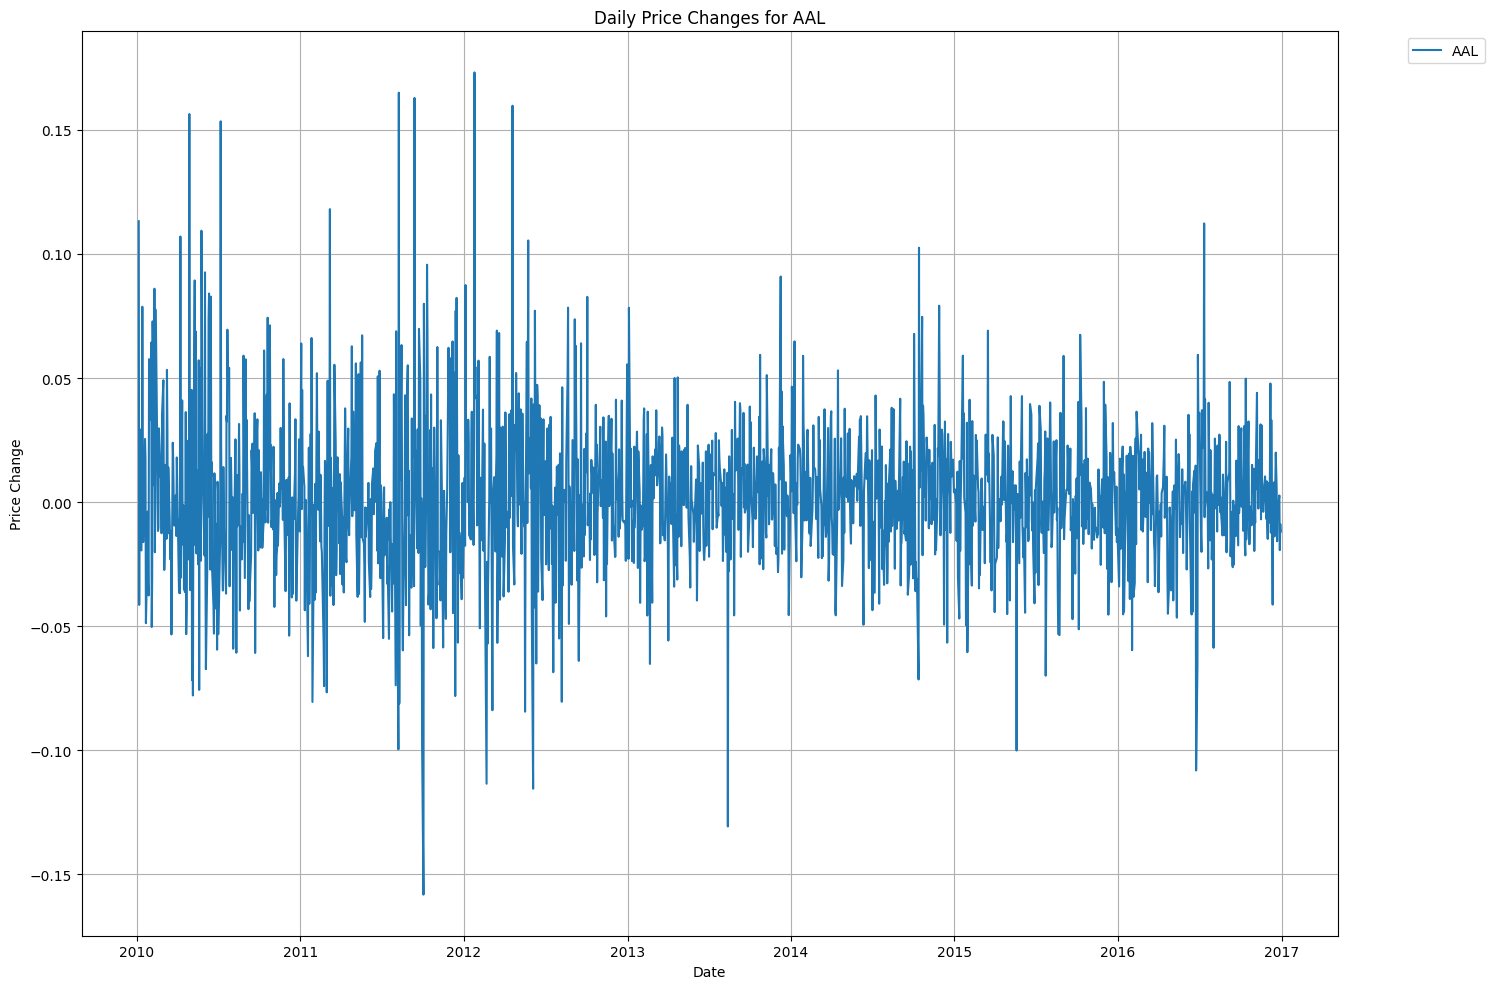

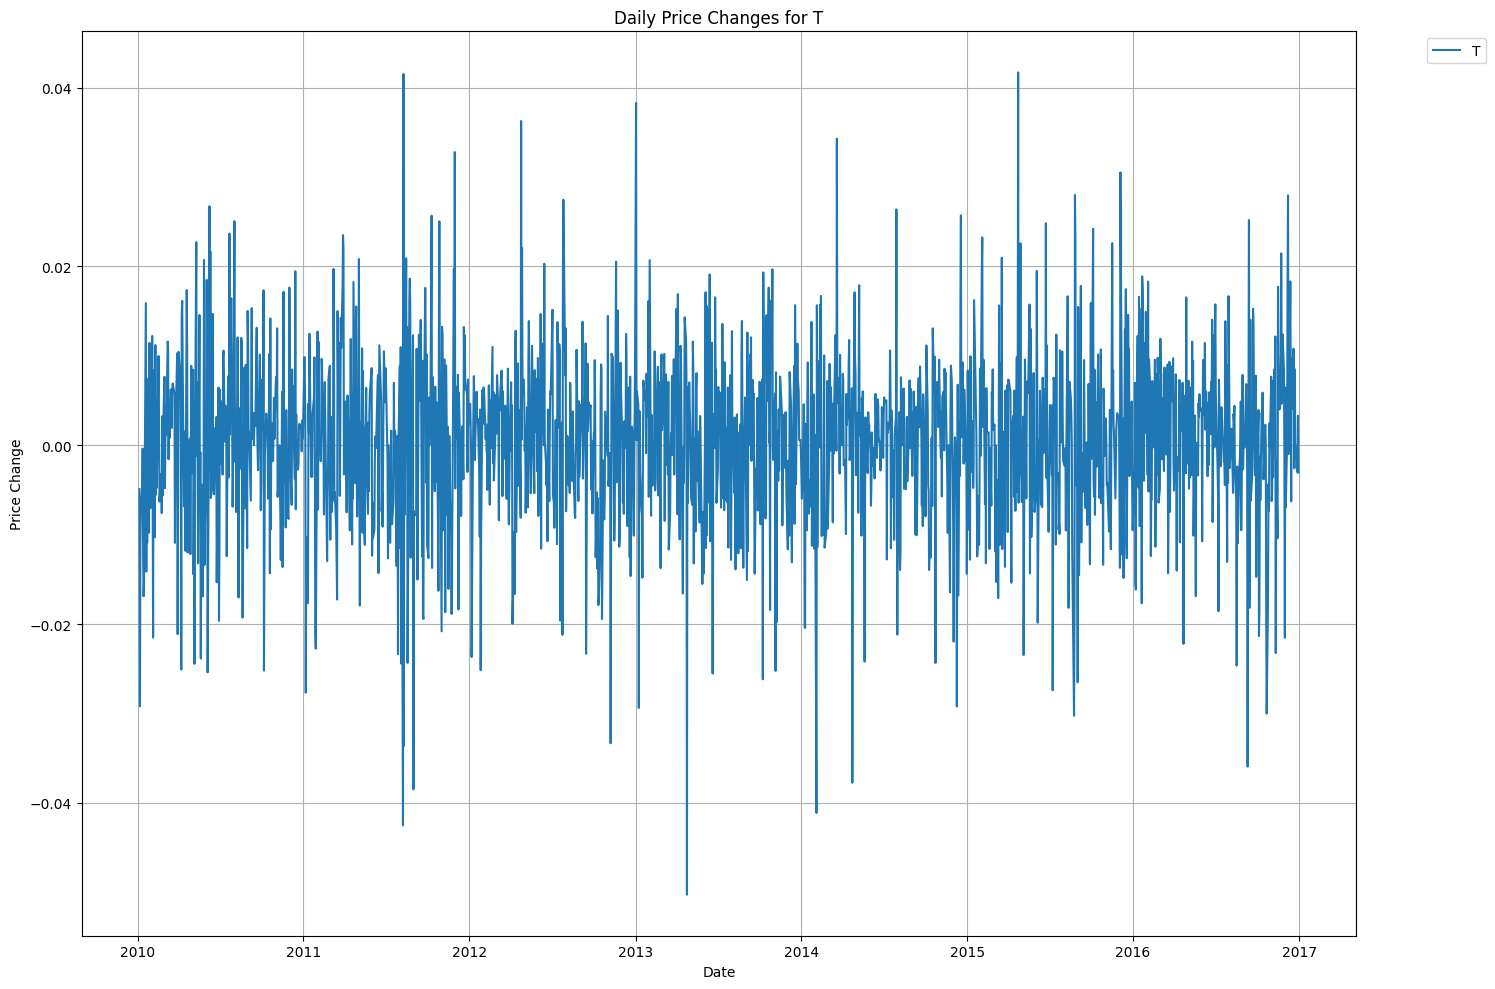

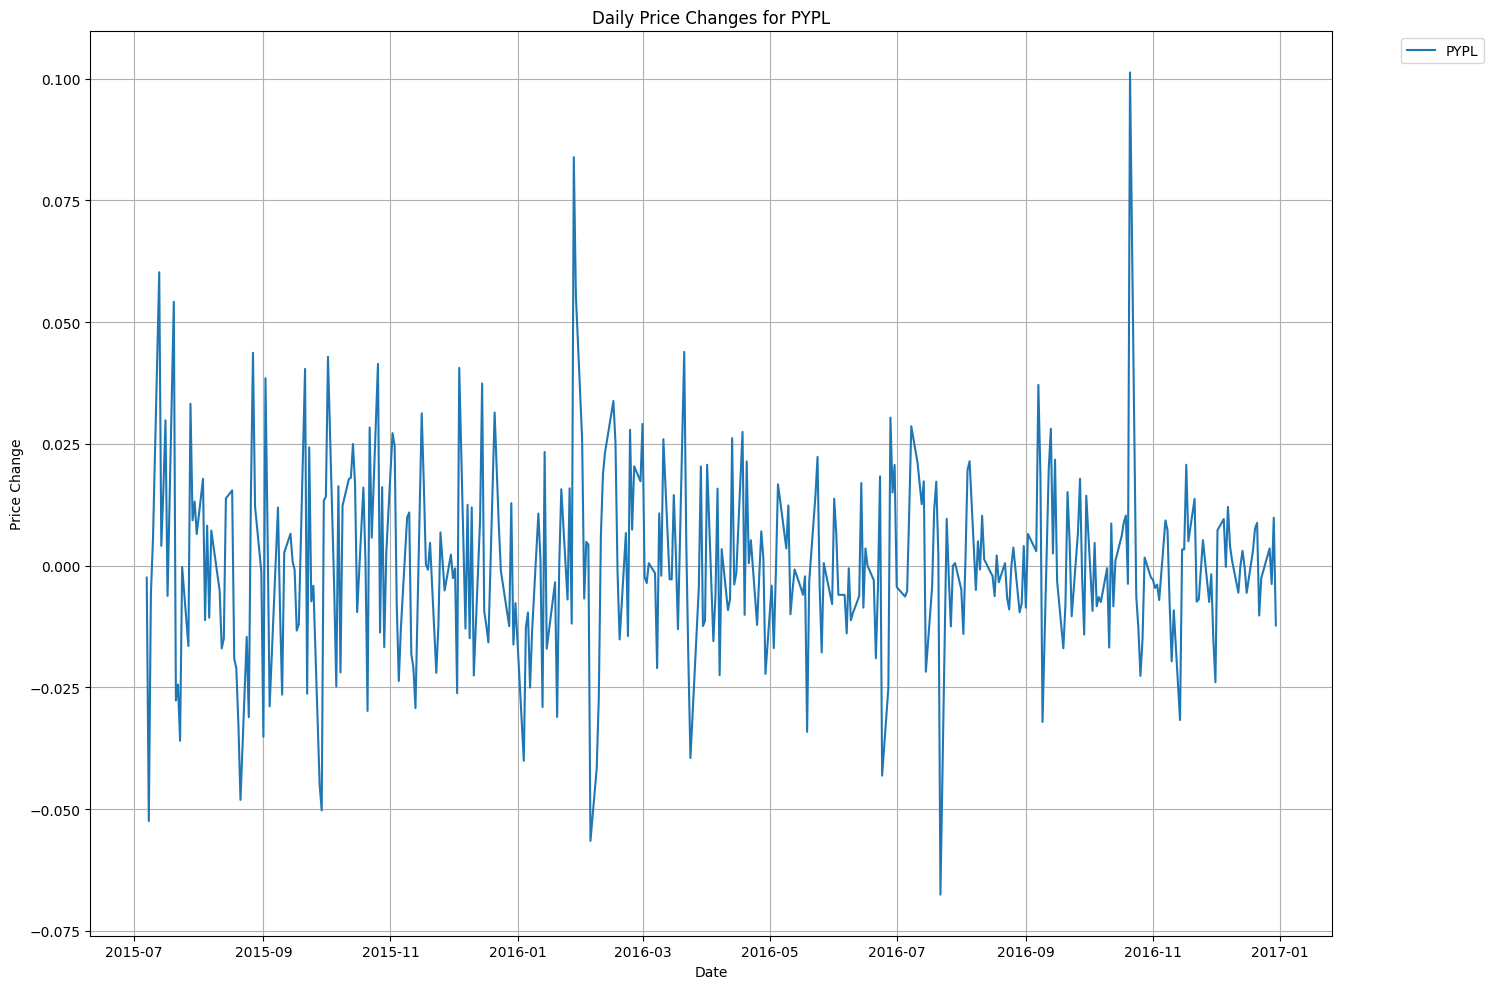

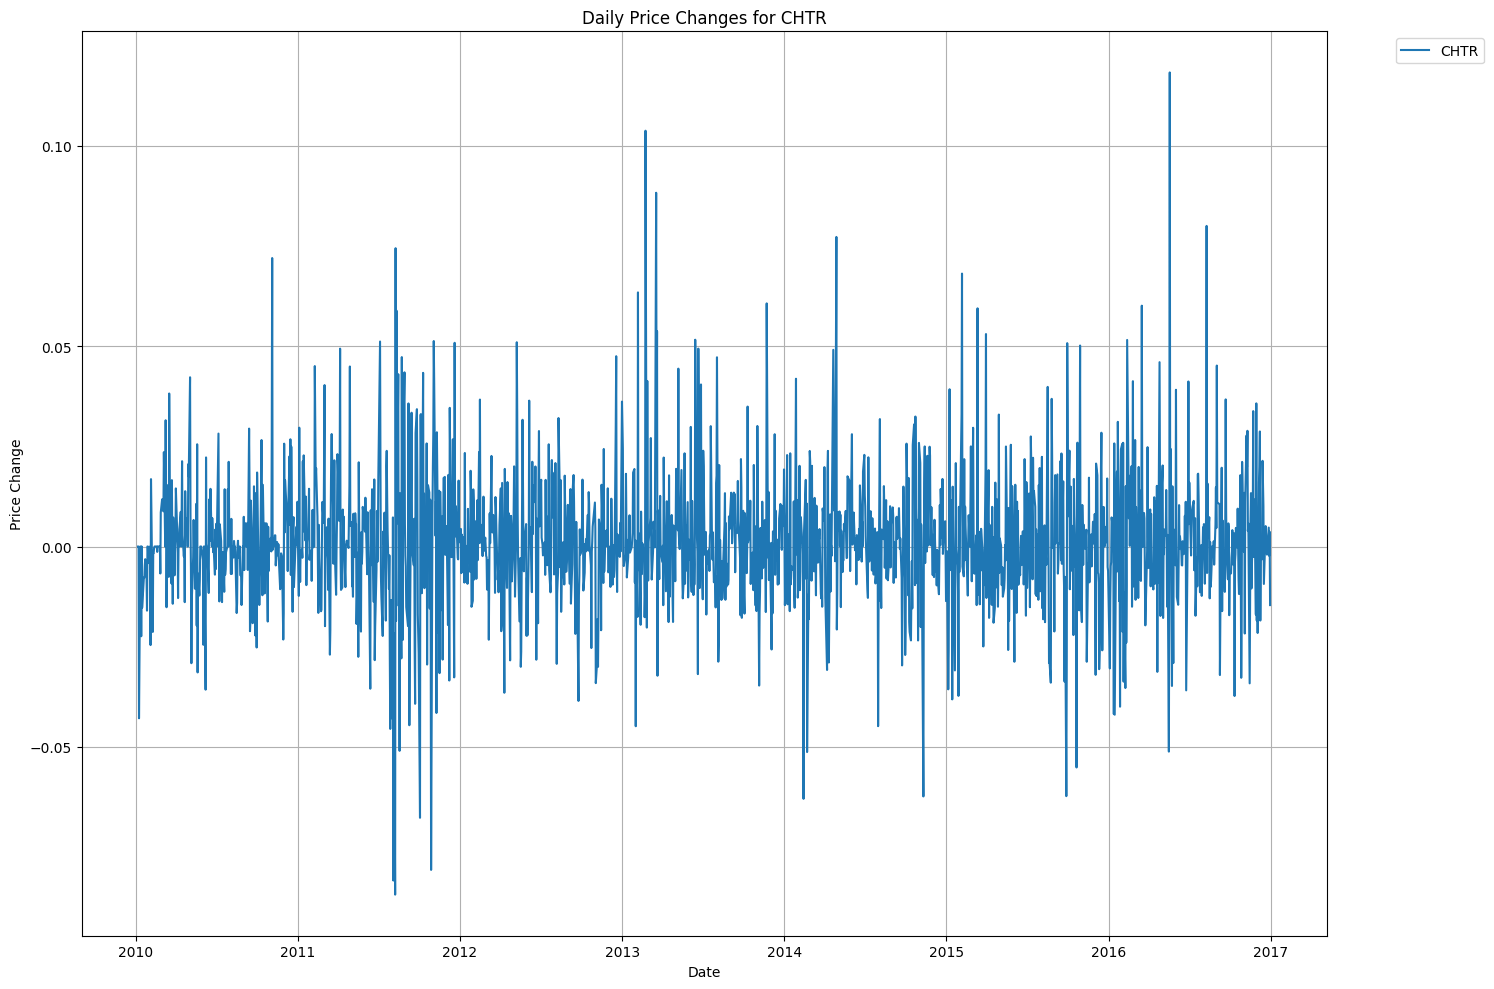

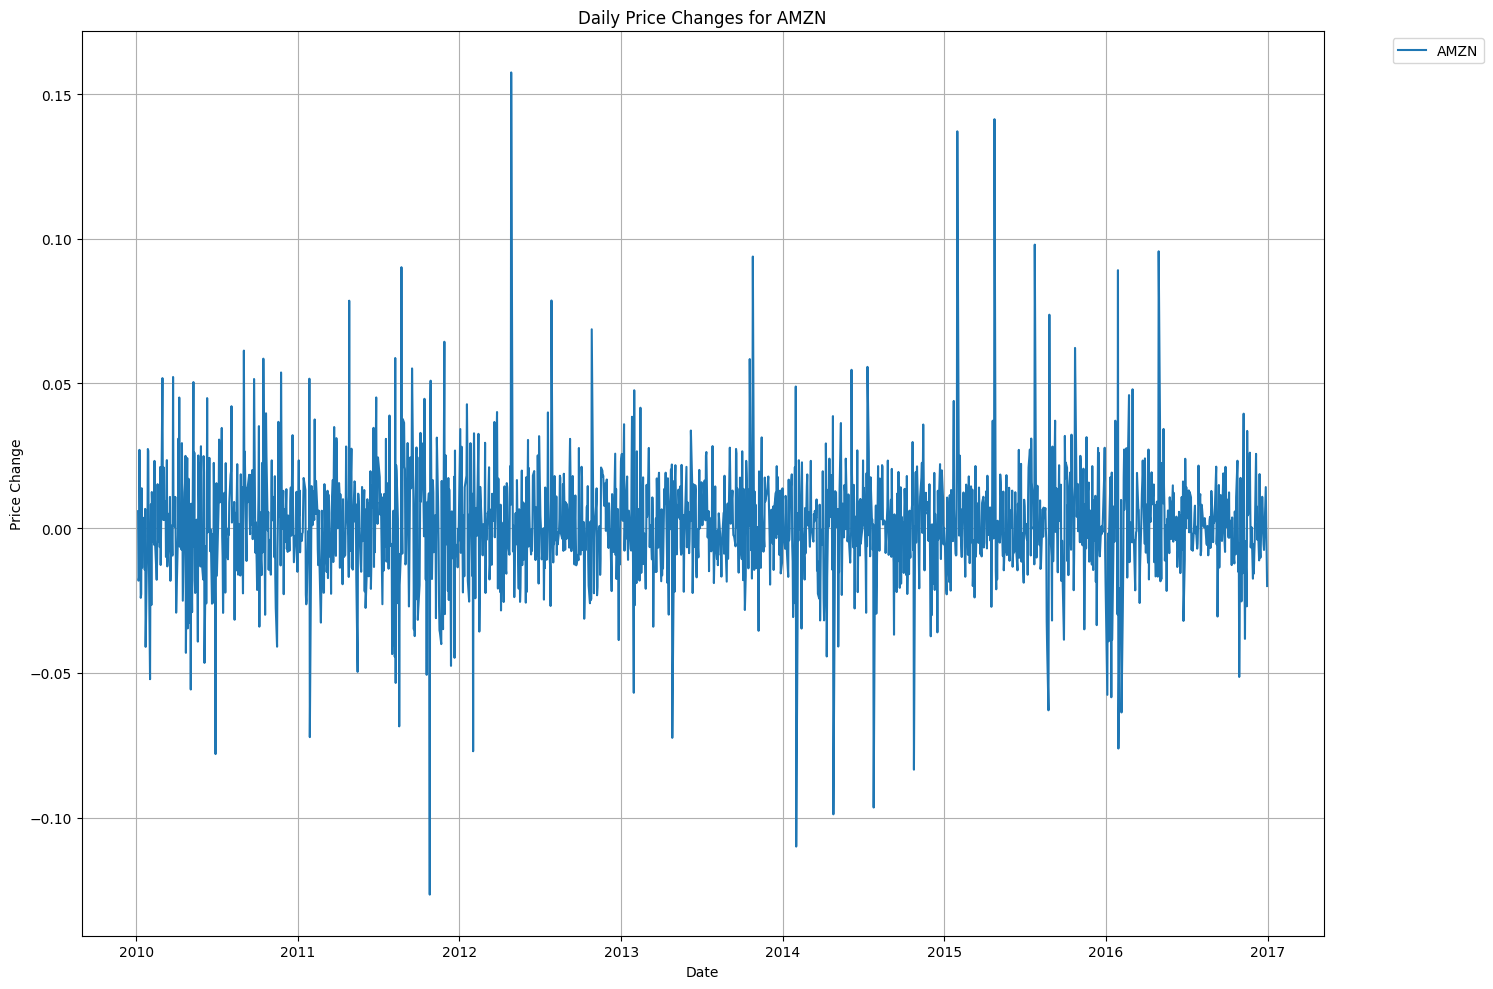

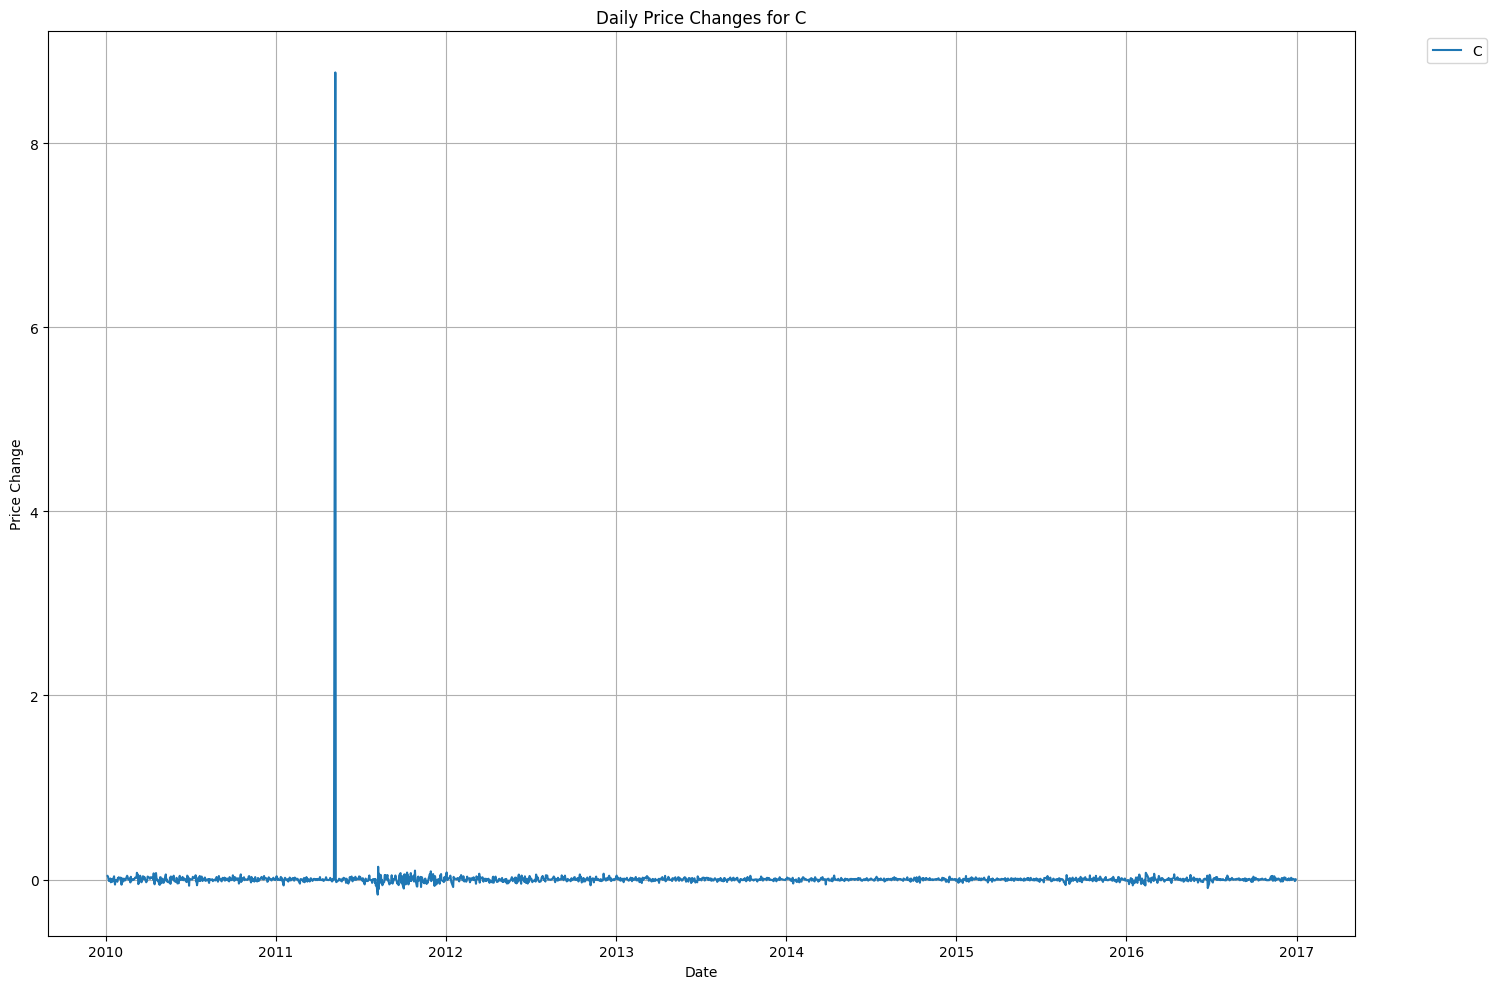

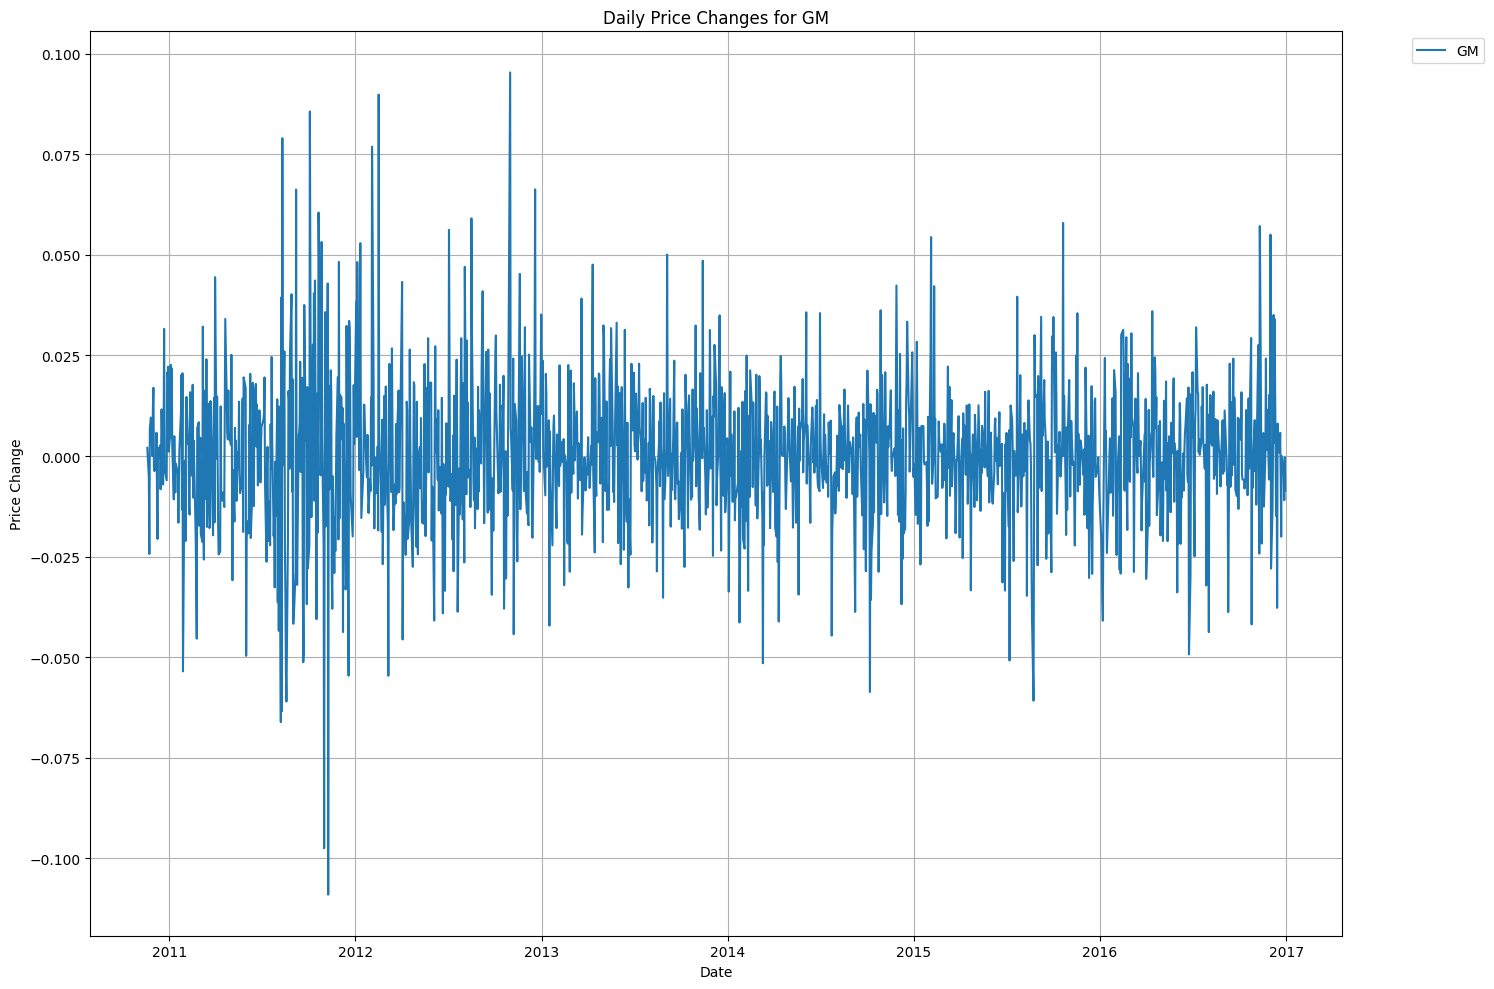

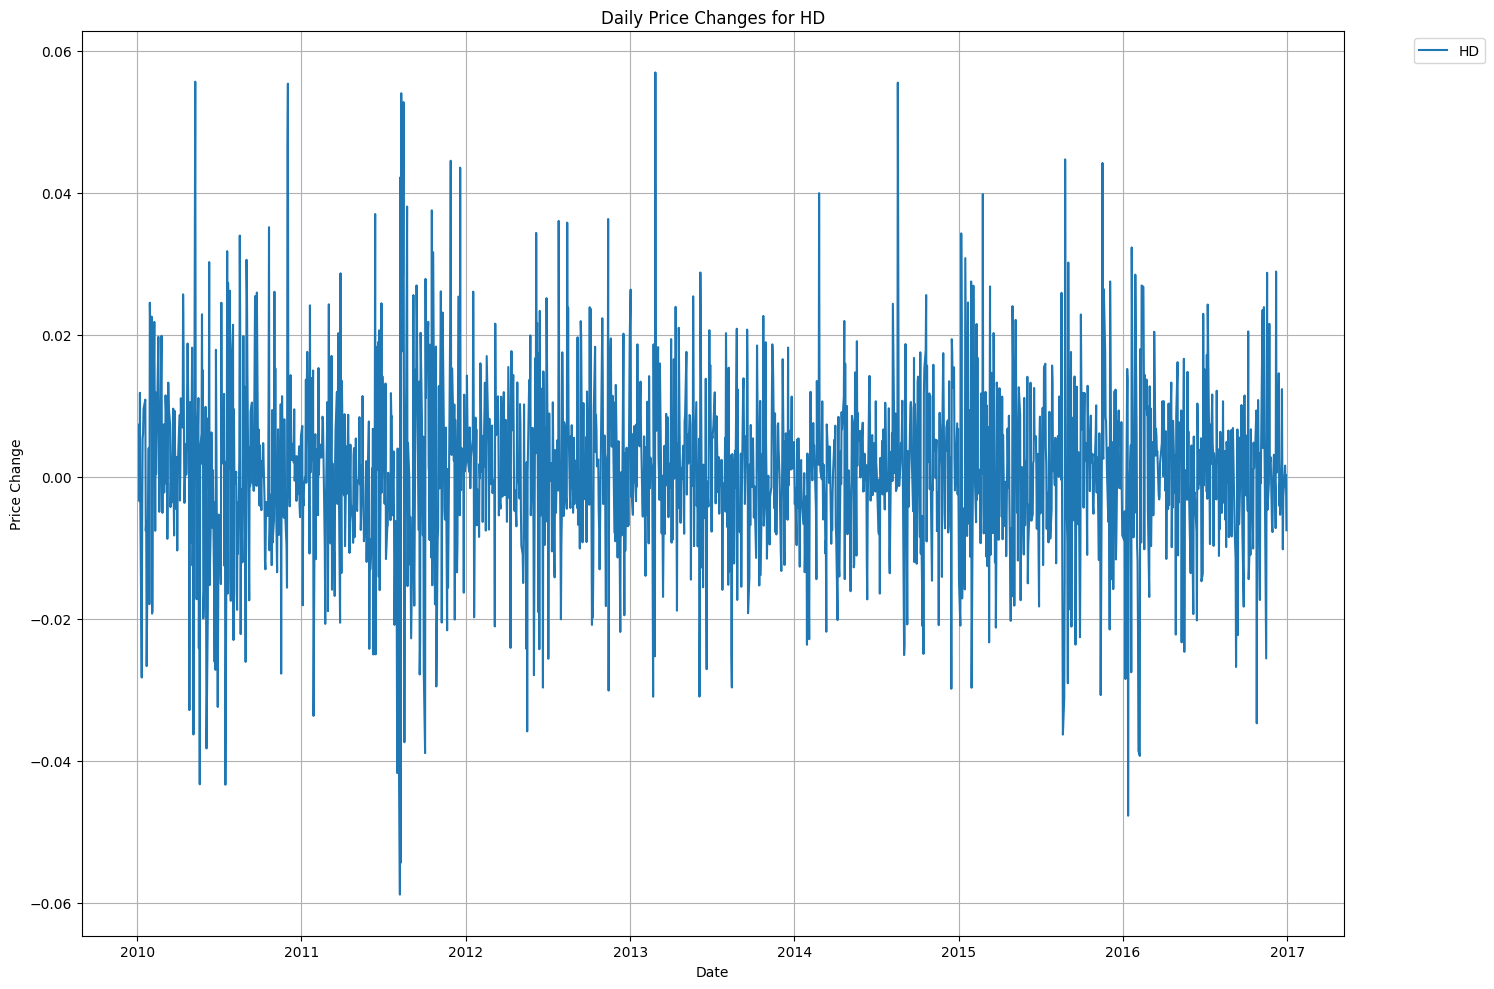

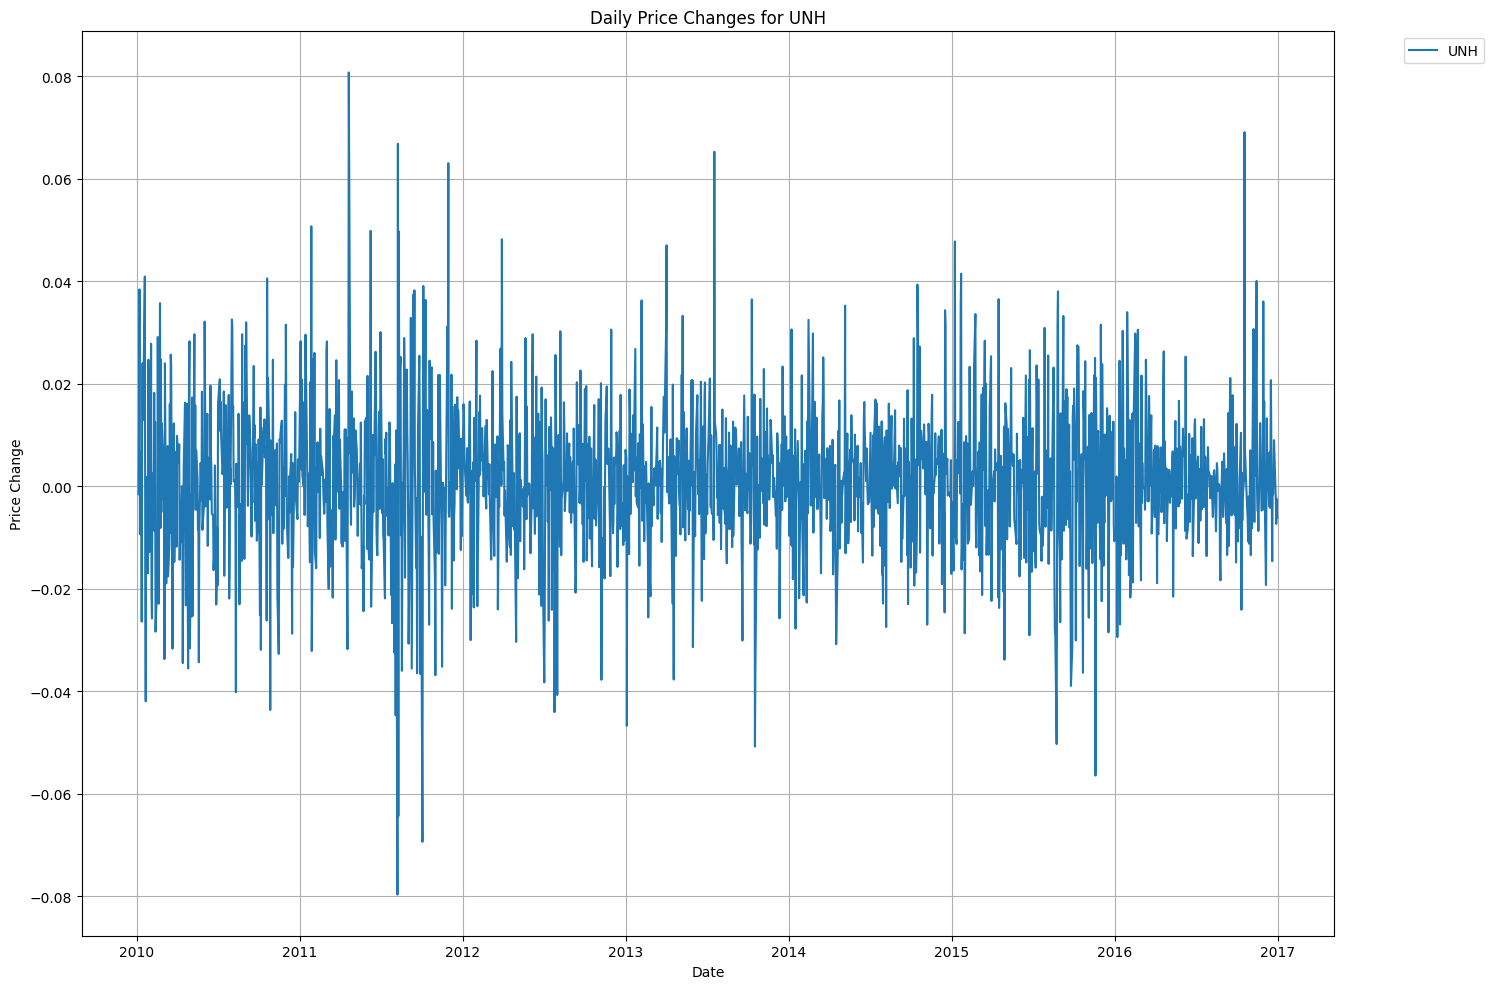

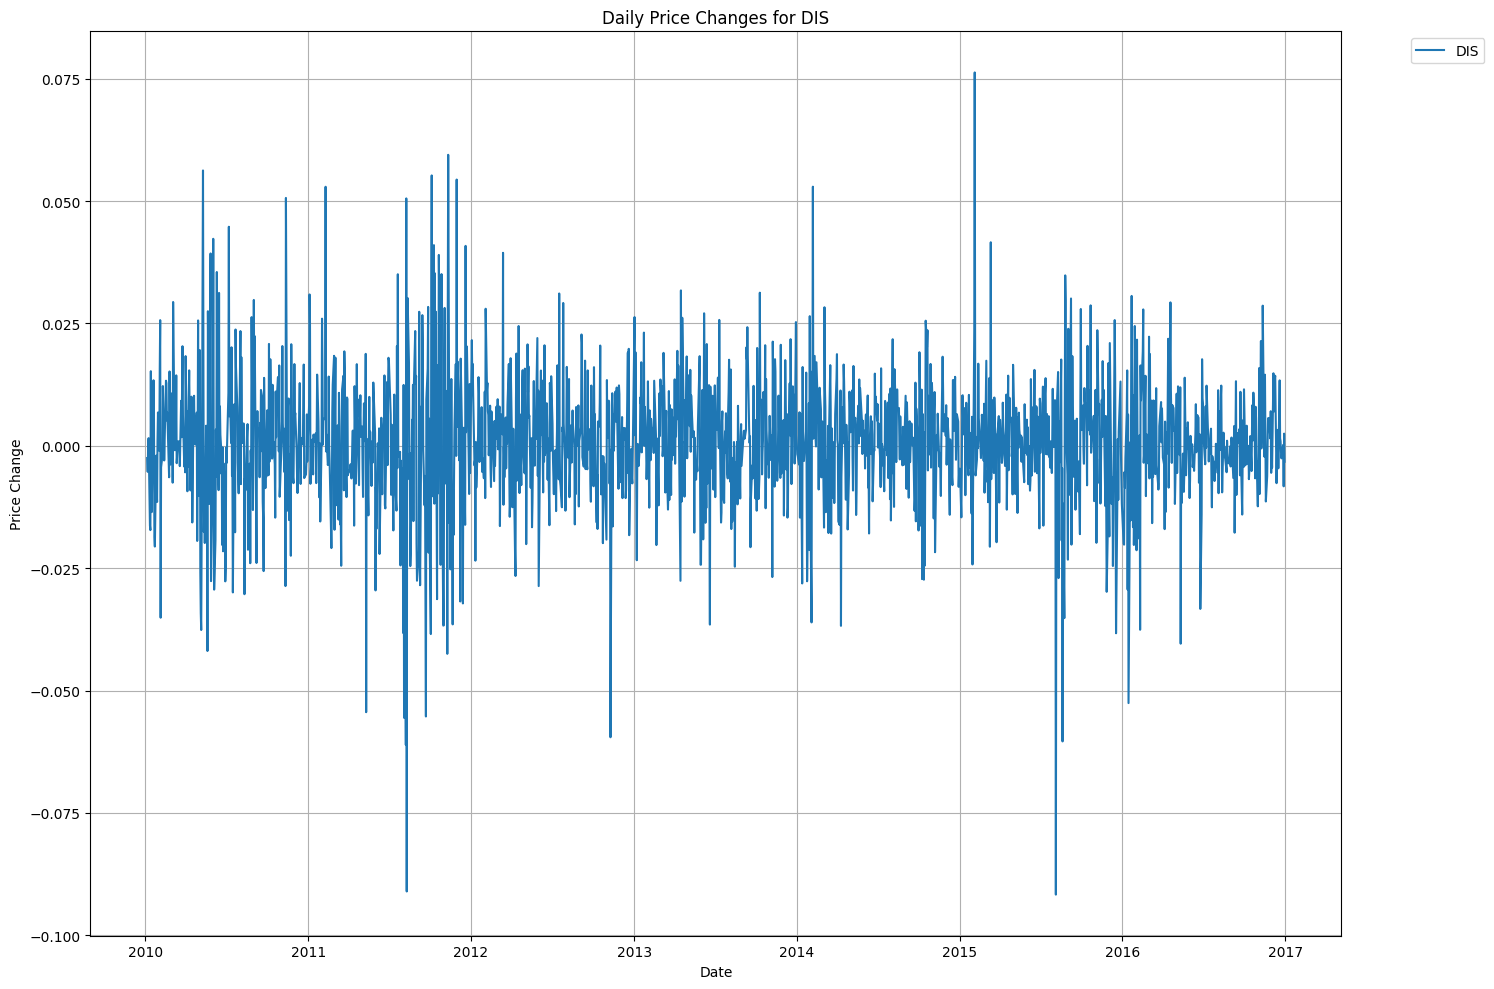

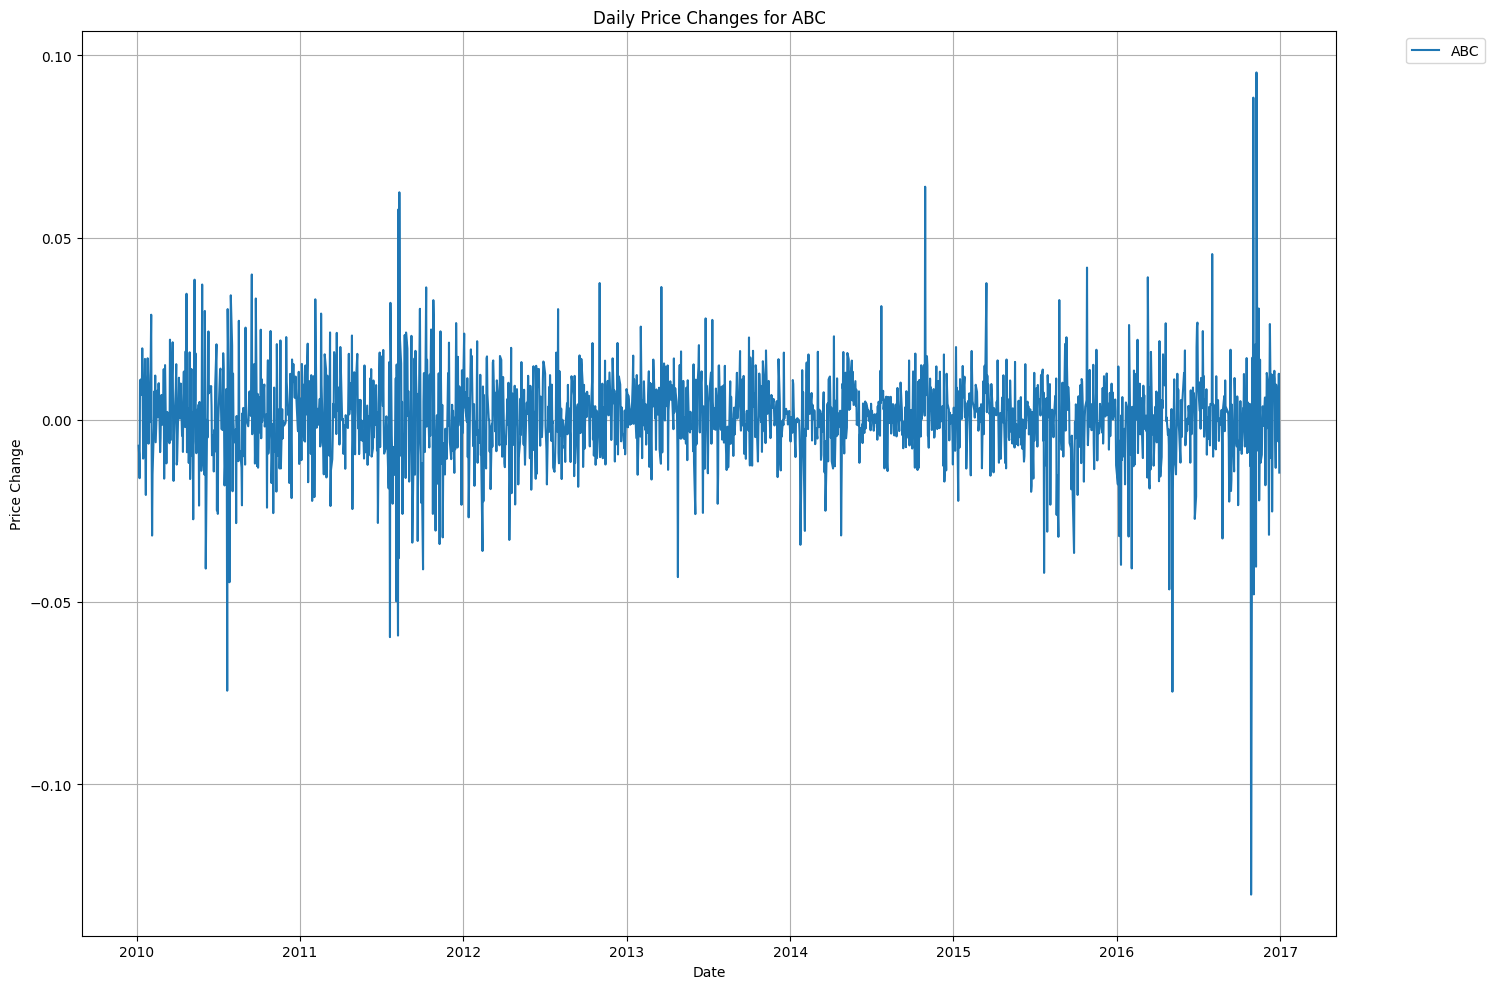

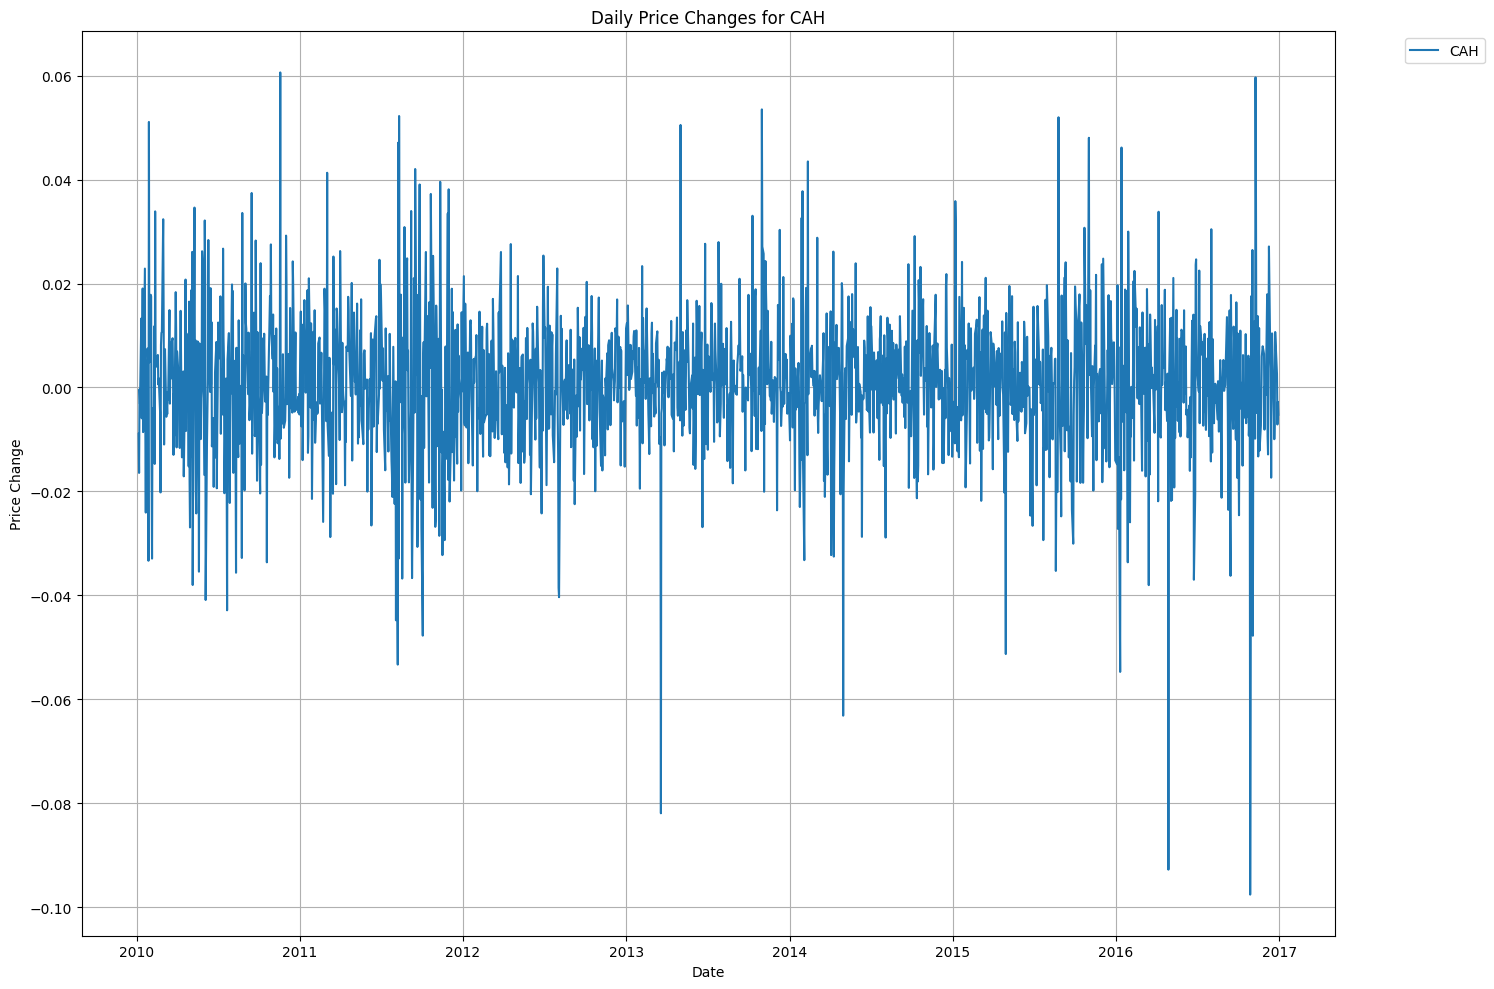

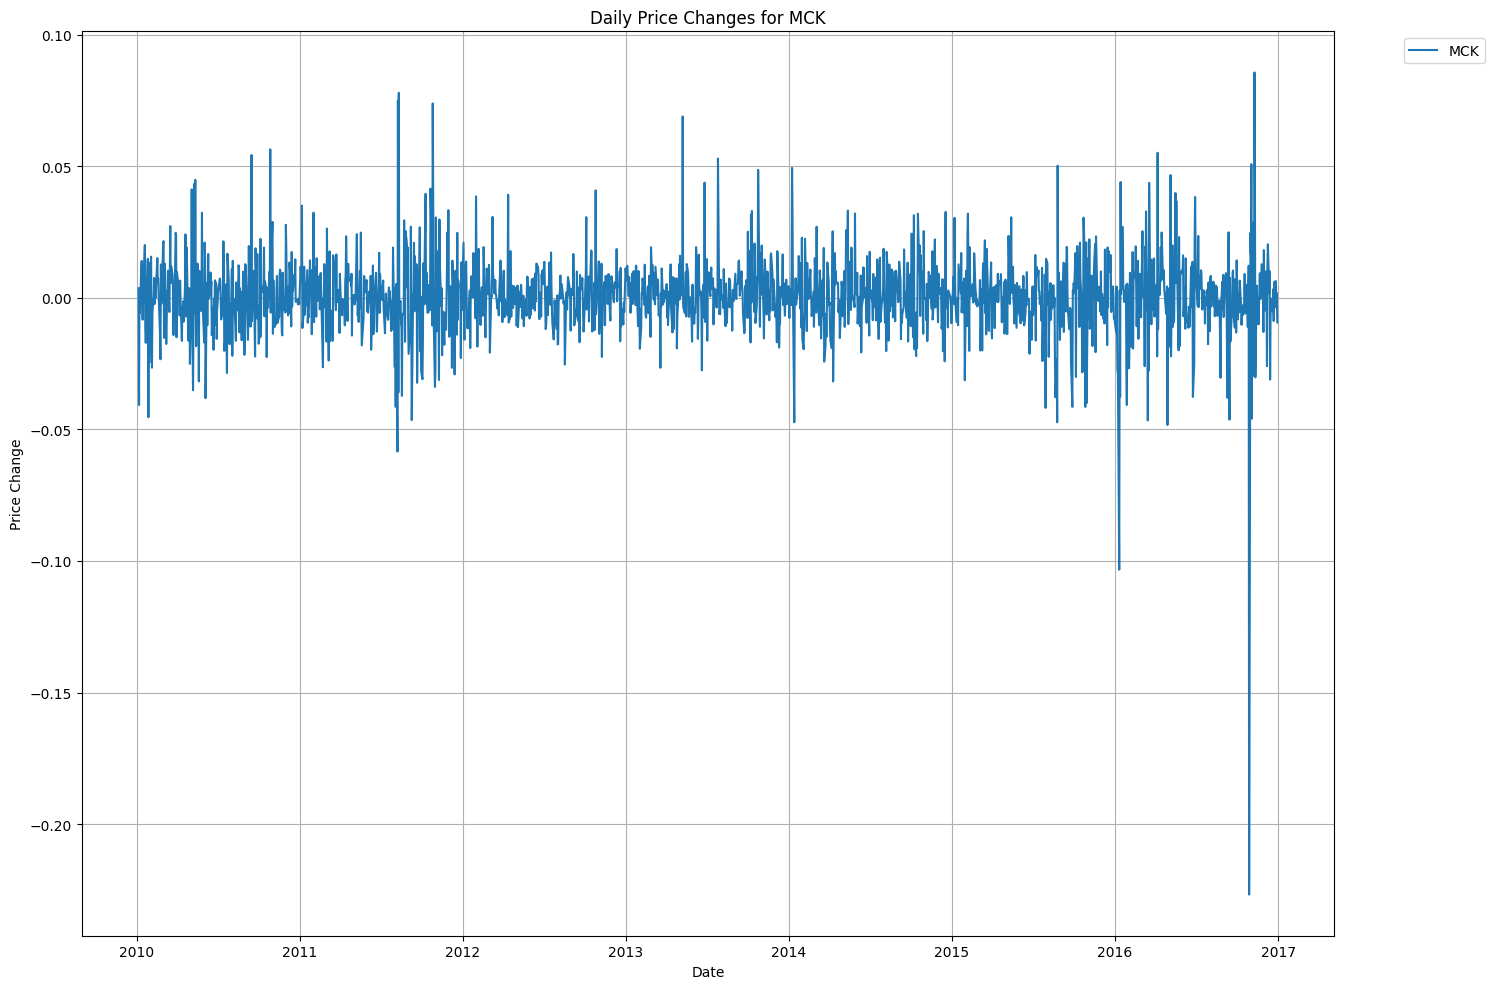

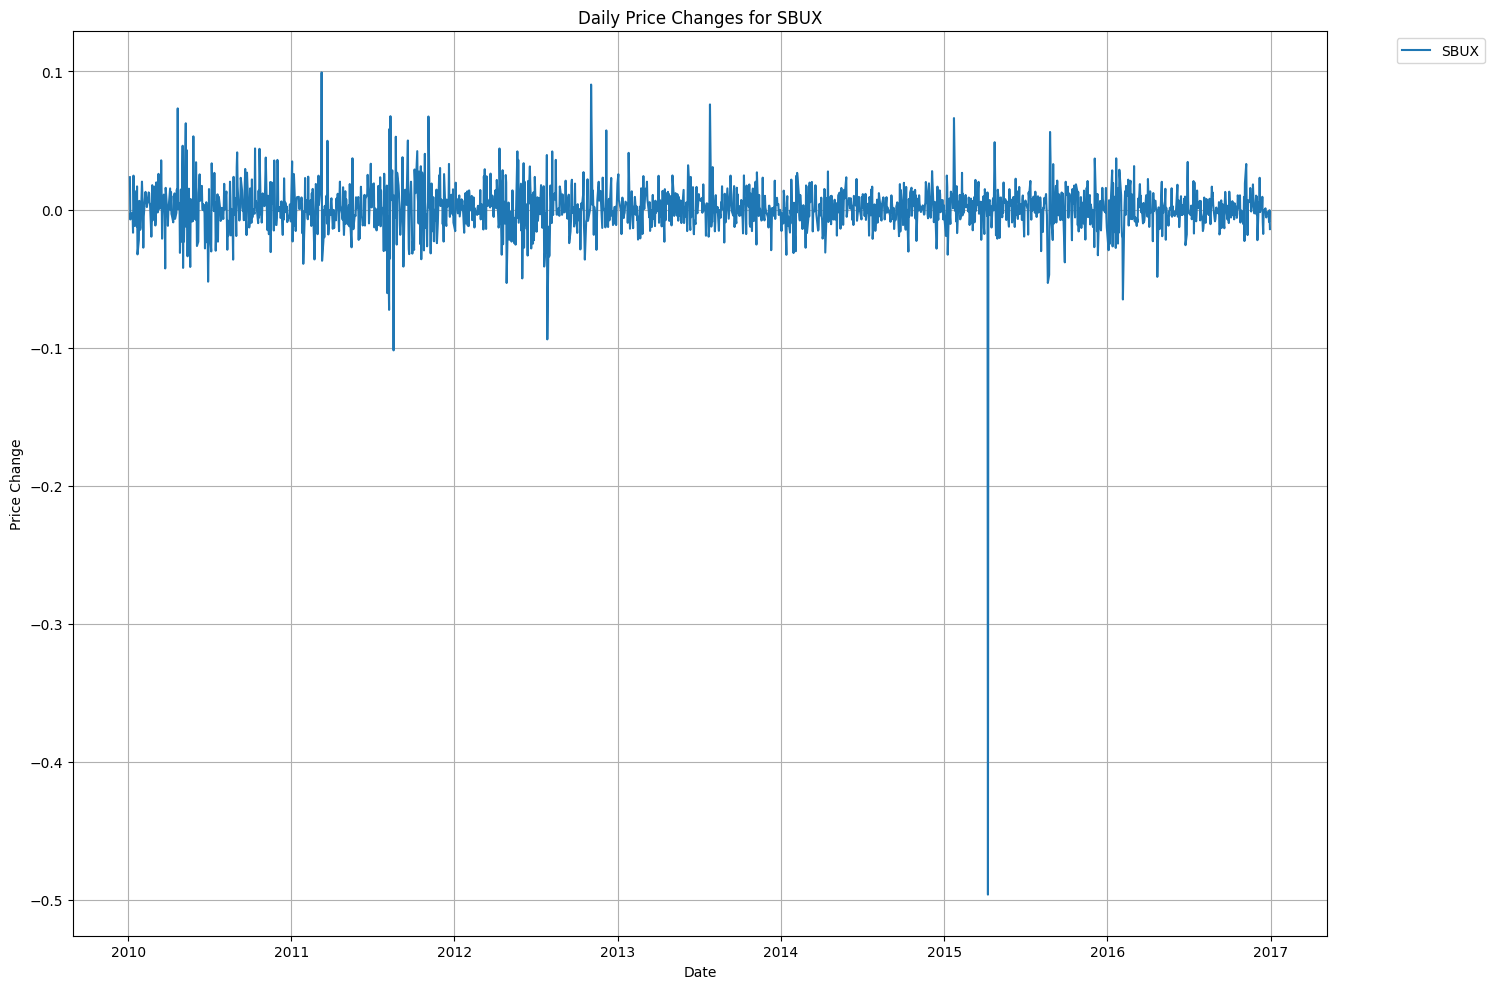

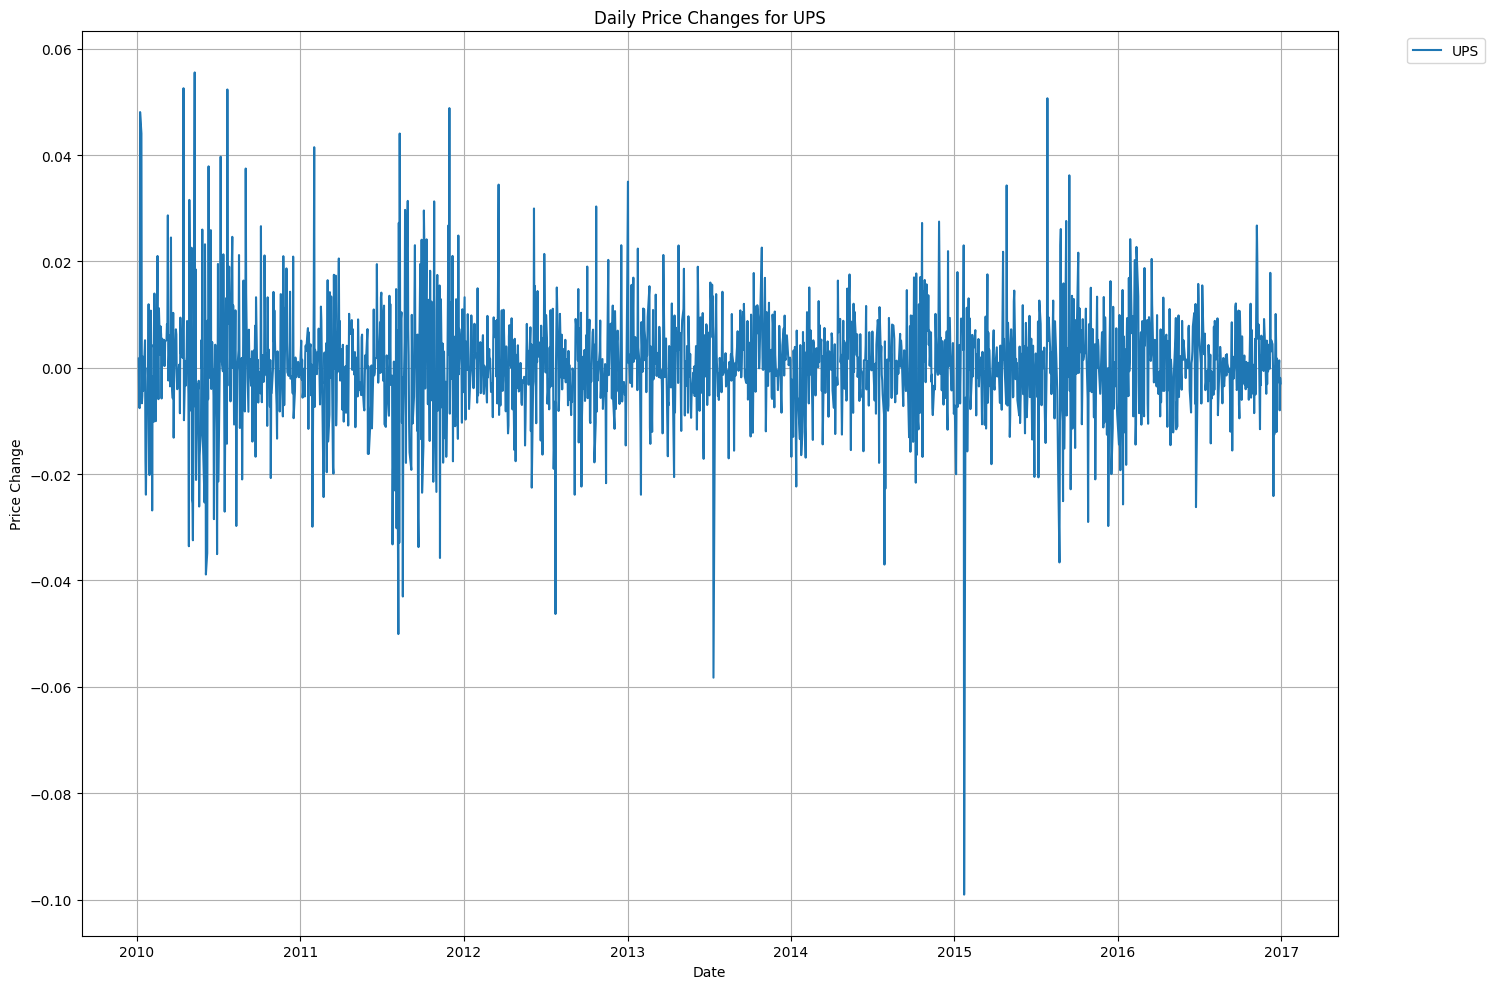

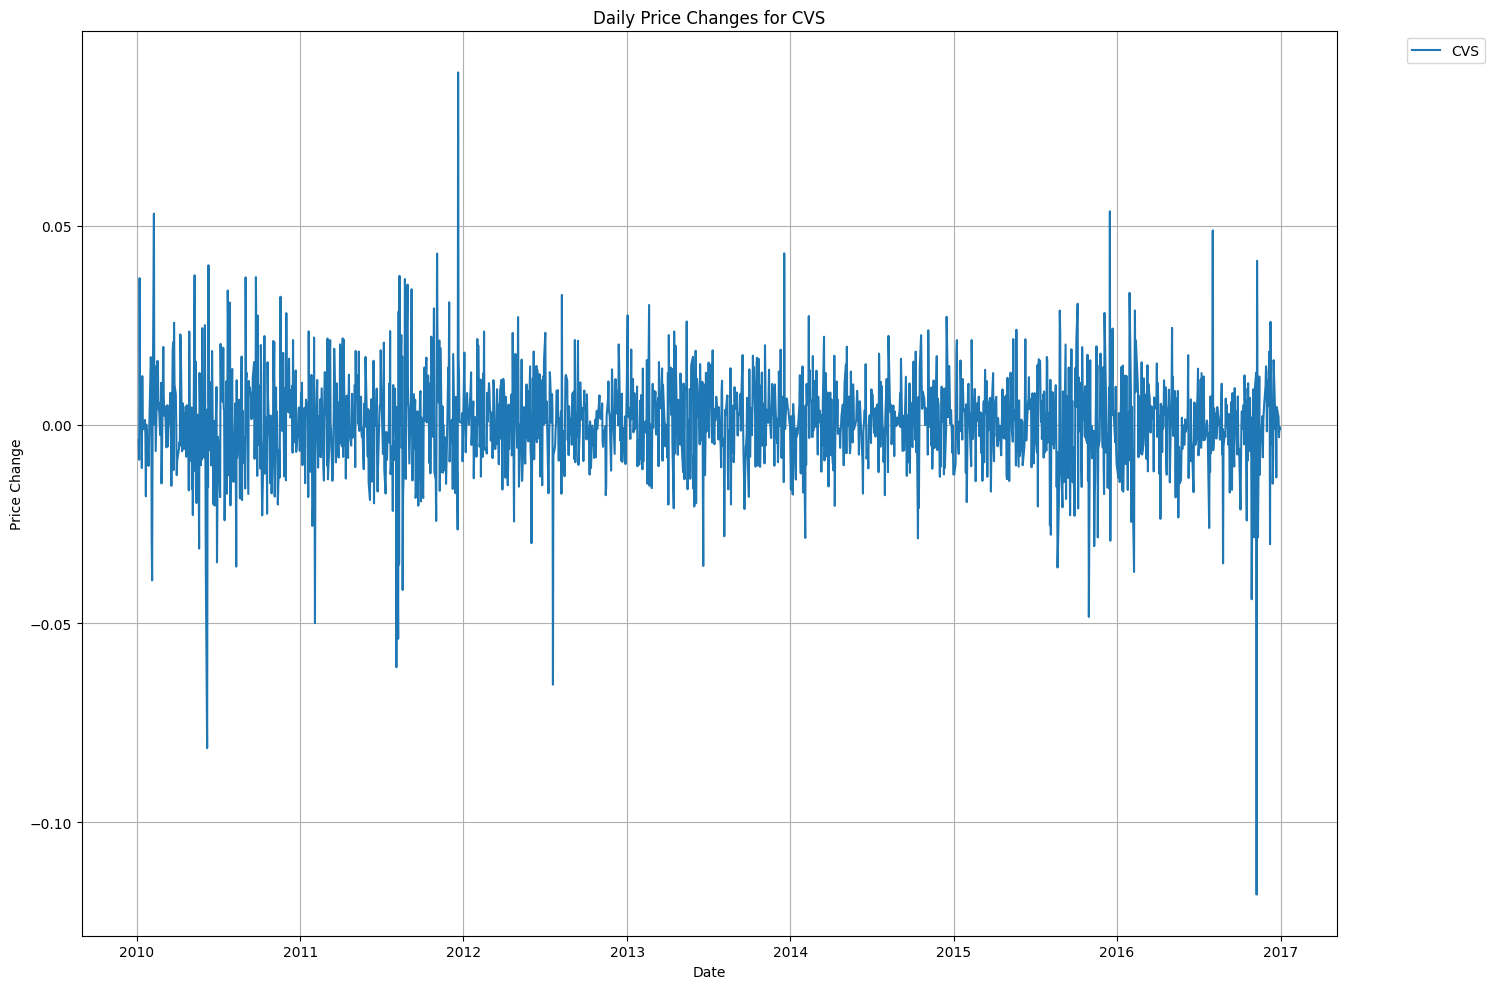

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
top20Df = top100Df.head(20)
prices_df = pd.read_csv('prices.csv')
prices_df['date'] = pd.to_datetime(prices_df['date'], format="mixed")
def calculate_price_change(group):
    group = group.sort_values('date')
    group['price_change'] = (group['close'] - group['close'].shift(1)) / group['close'].shift(1)
    return group


top20_symbols = top20Df['Ticker Symbol'].tolist()
price_changes = prices_df[prices_df['symbol'].isin(top20_symbols)].groupby('symbol').apply(calculate_price_change)

for symbol in top20_symbols:
    company_data = price_changes[price_changes['symbol'] == symbol]
    plt.figure(figsize=(15, 10))
    plt.plot(company_data['date'], company_data['price_change'], label=symbol)
    plt.title(f'Daily Price Changes for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Price Change')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.grid(True)
    plt.show()
    print("\n\n")



###**Part b**

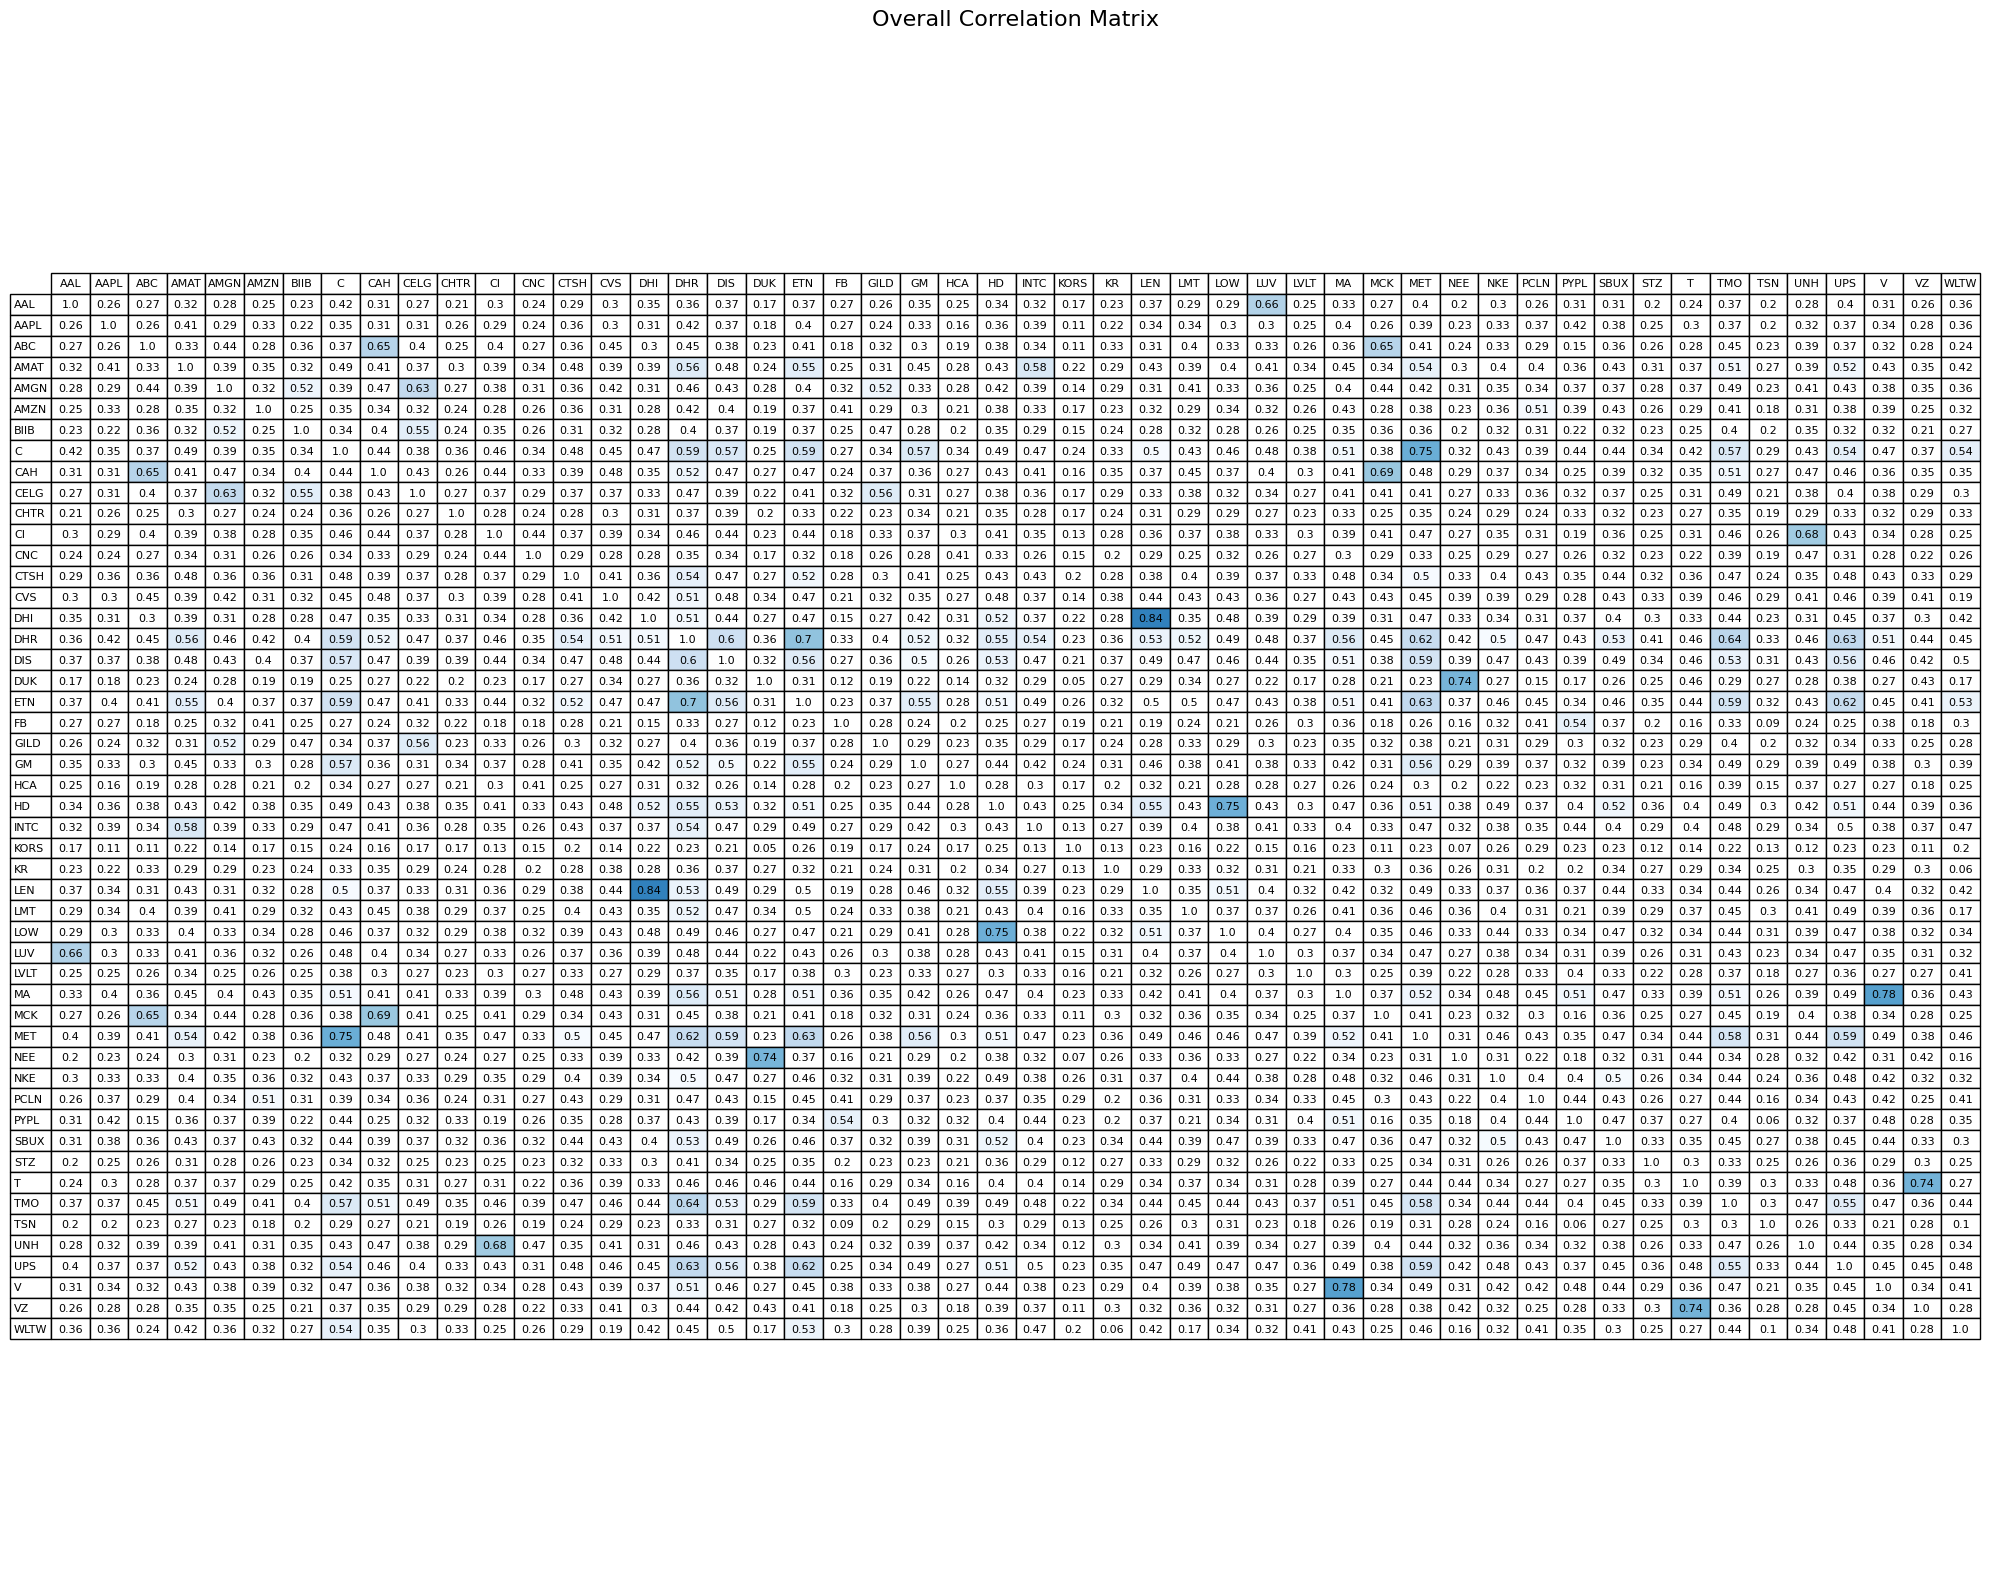

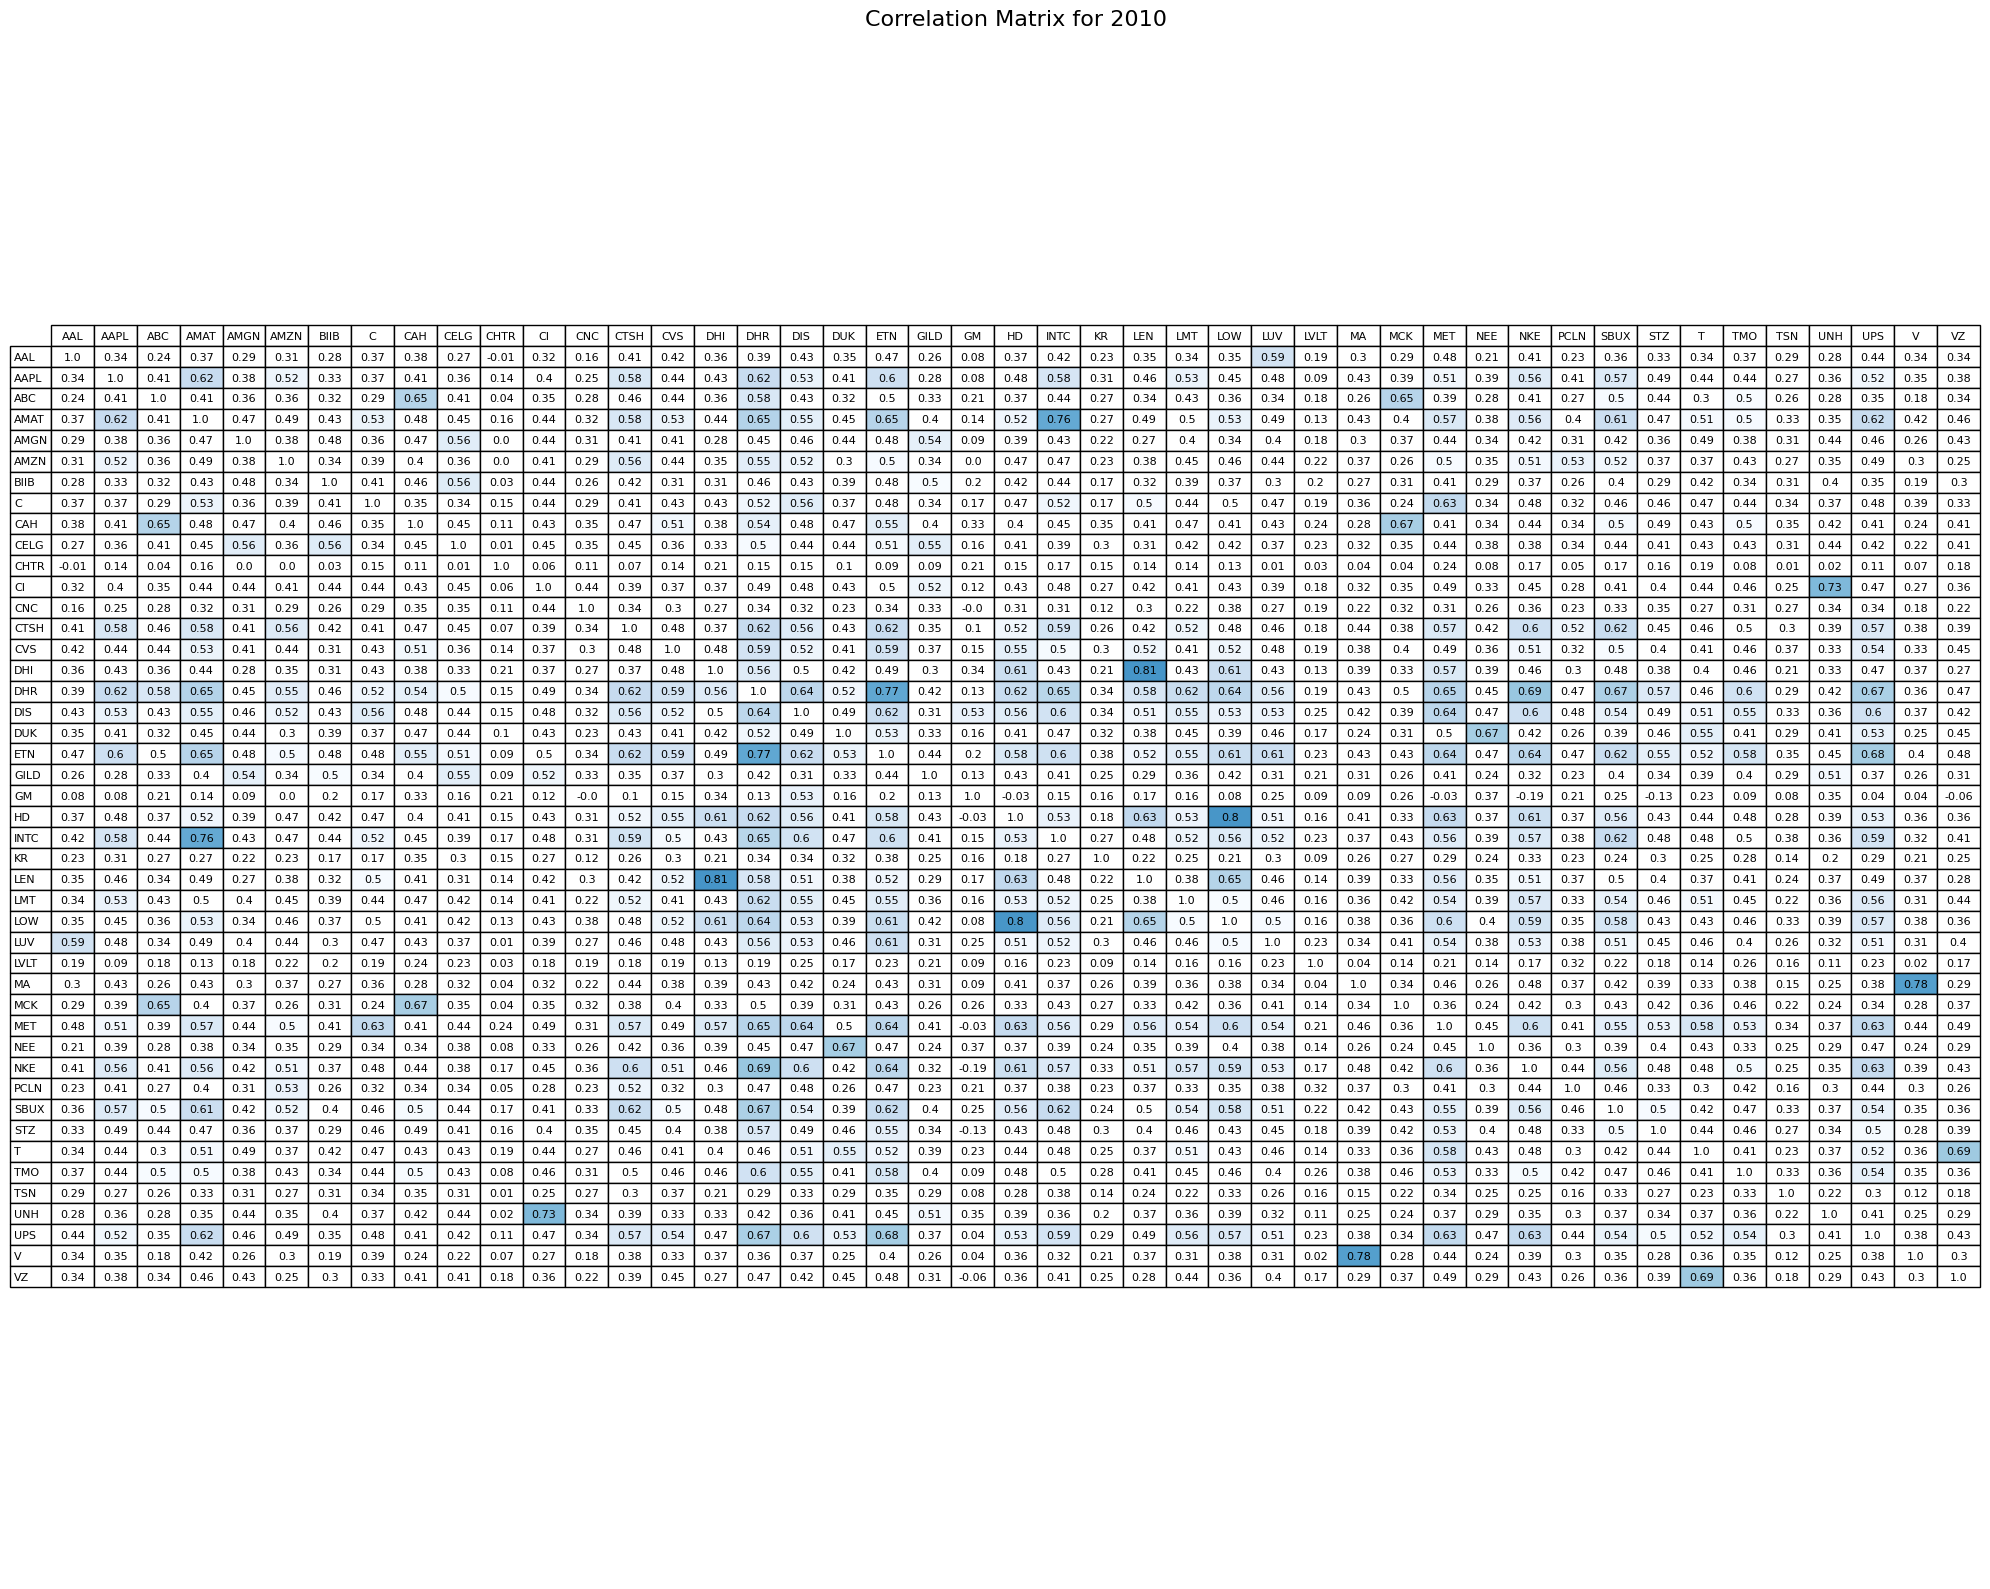

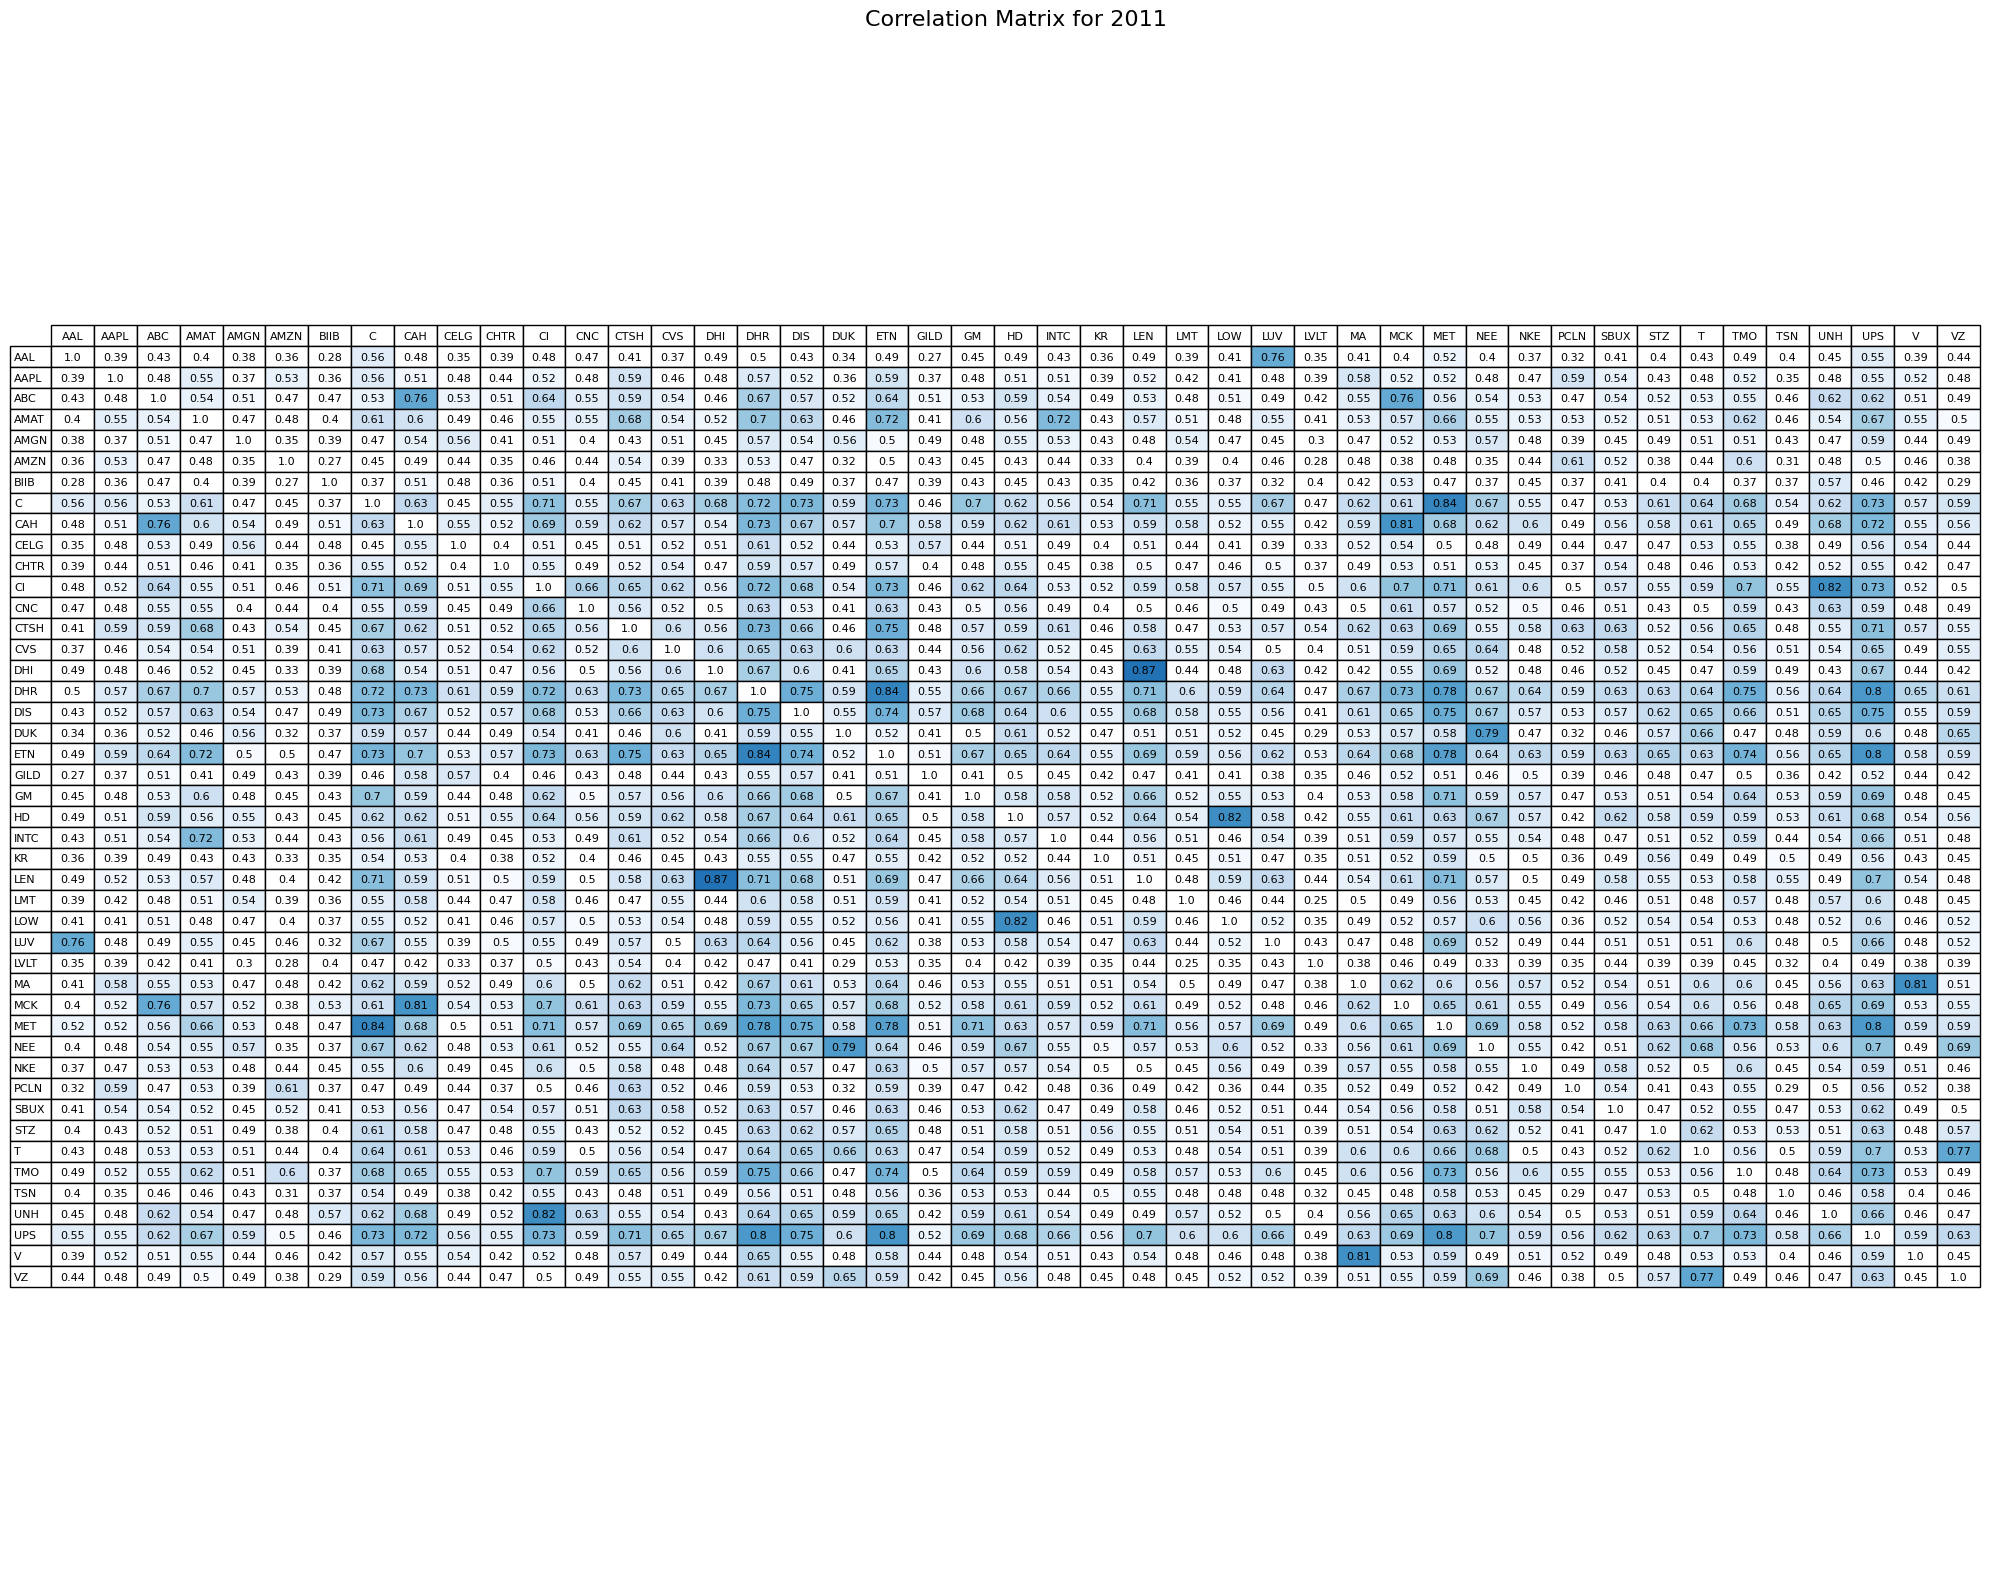

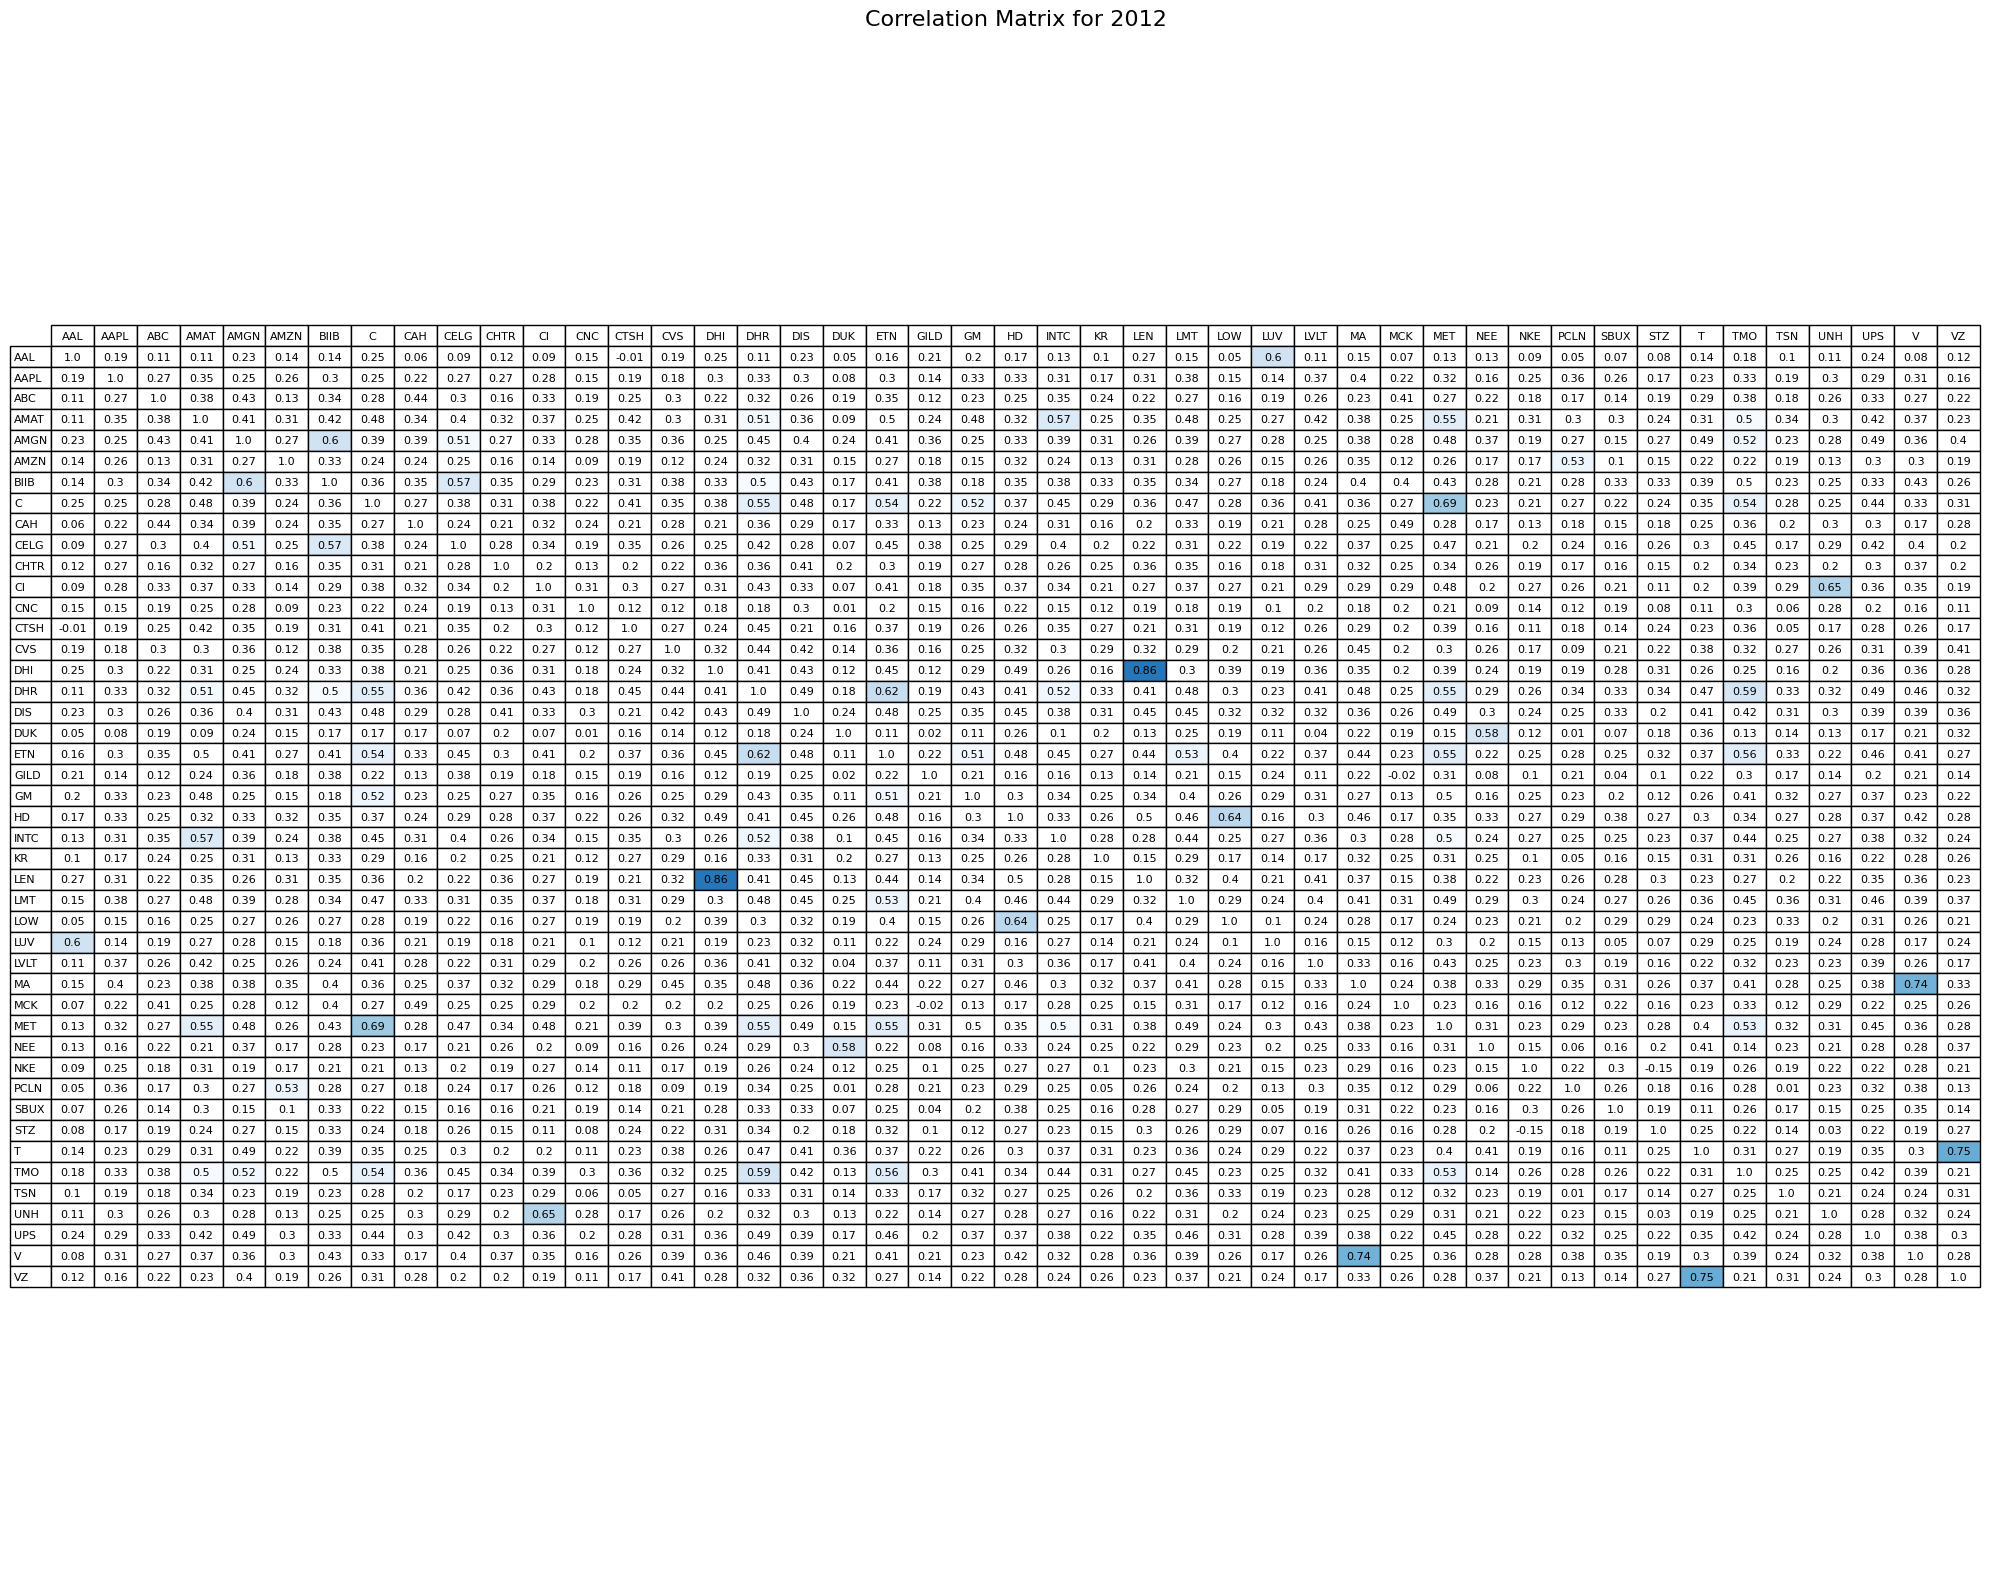

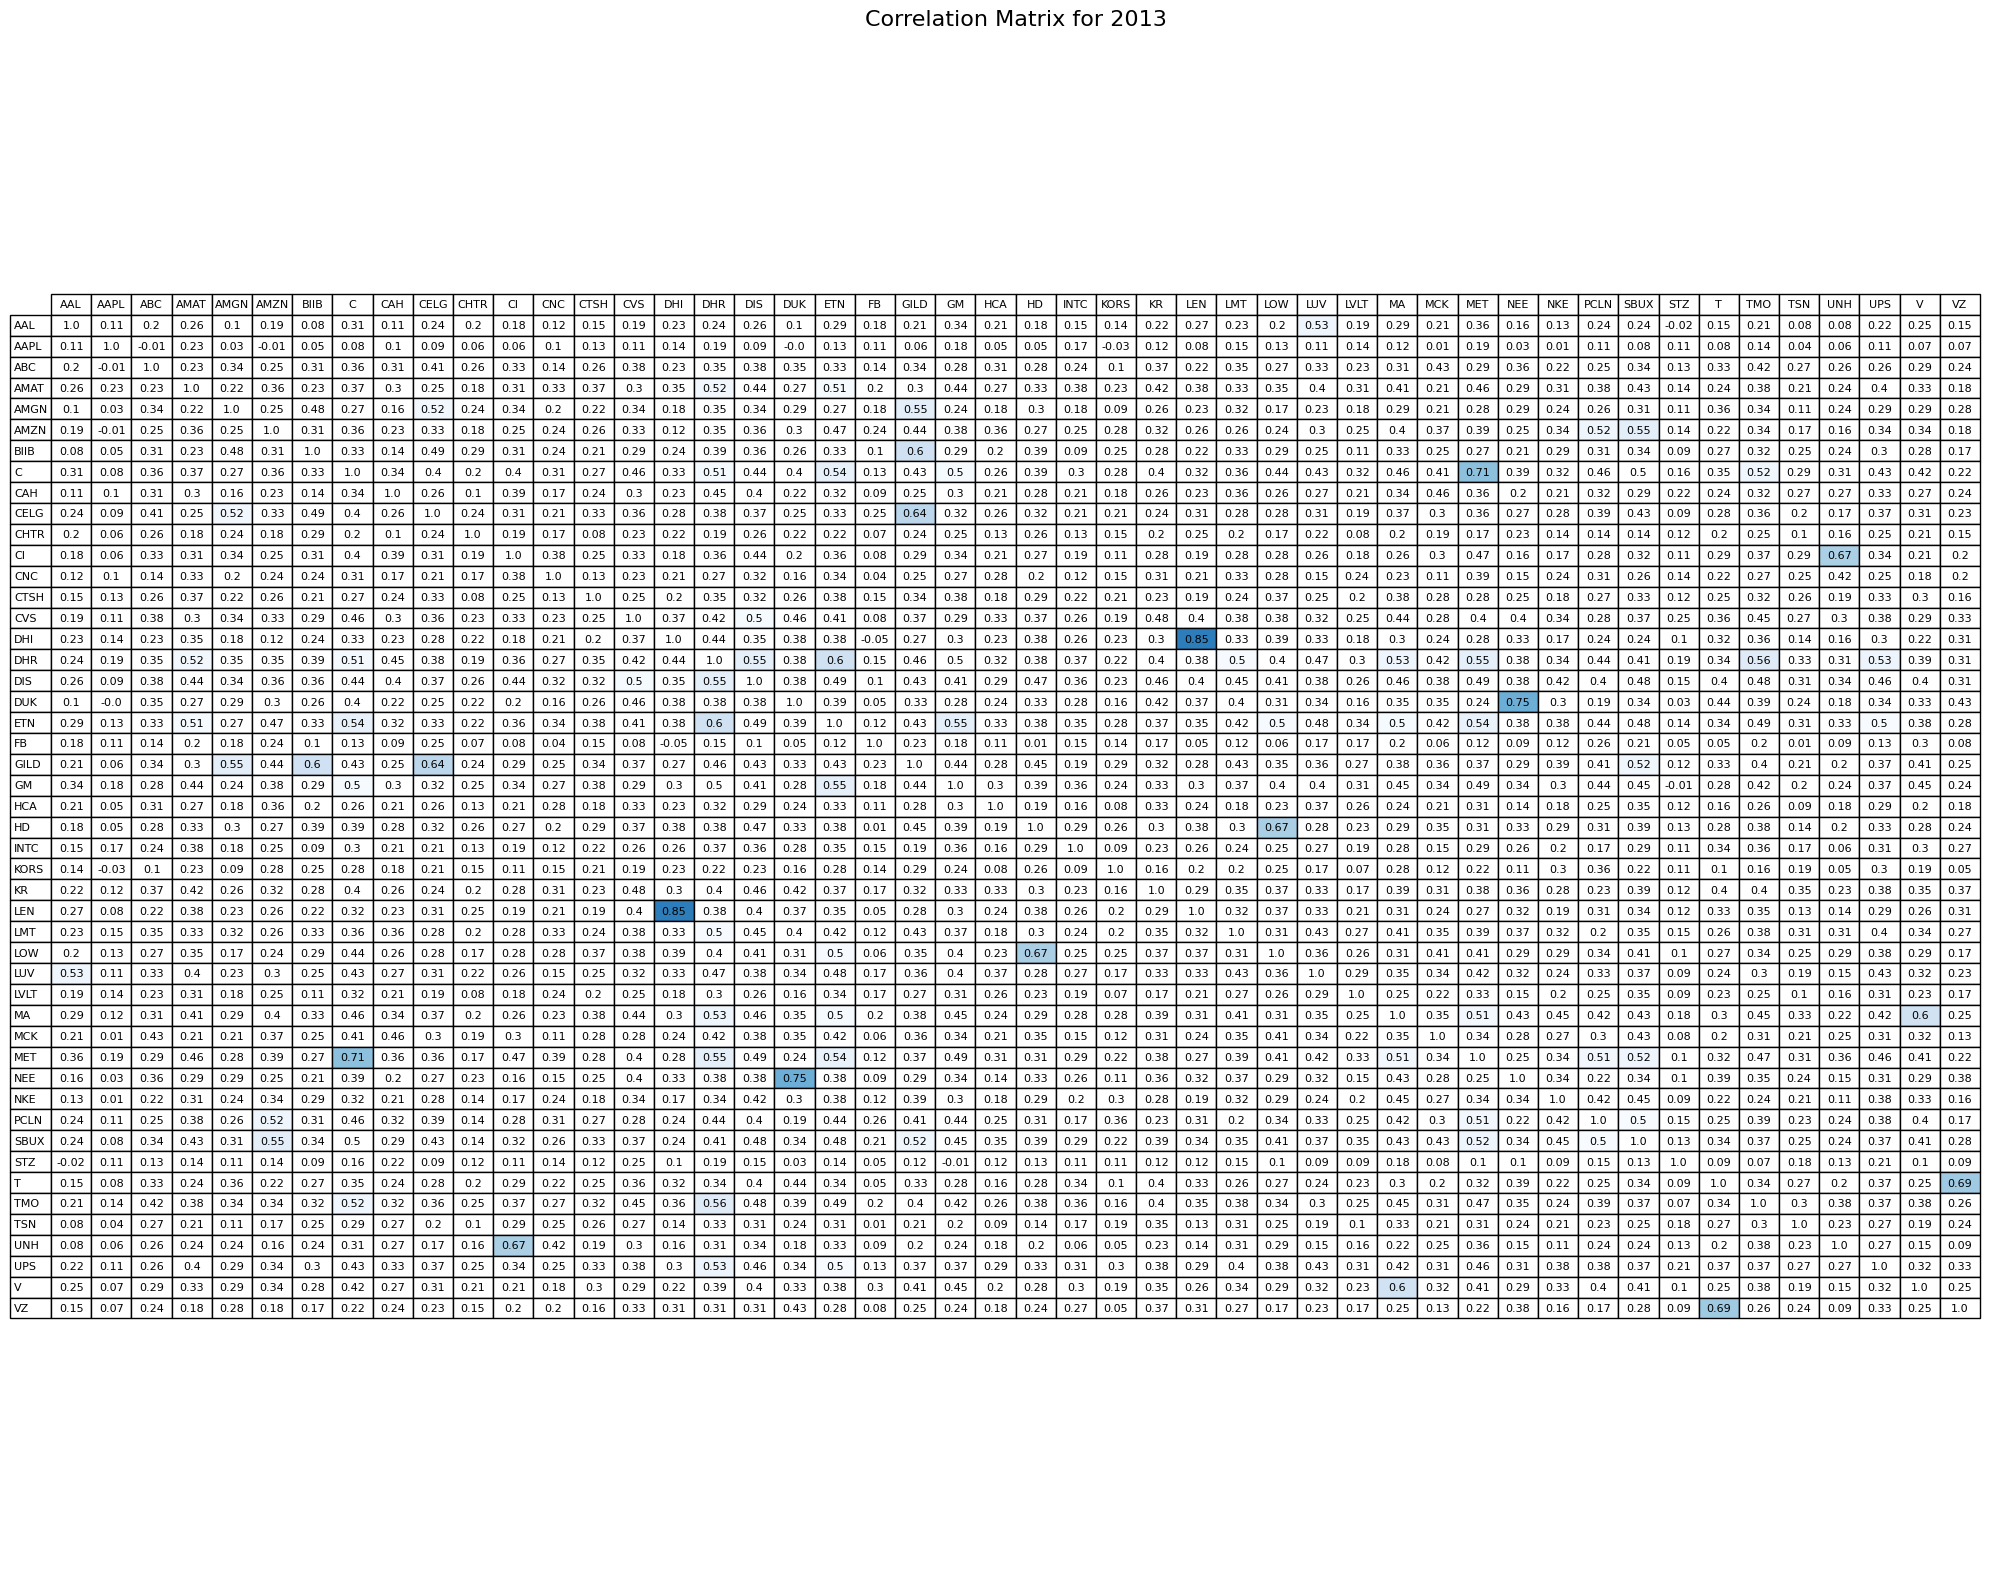

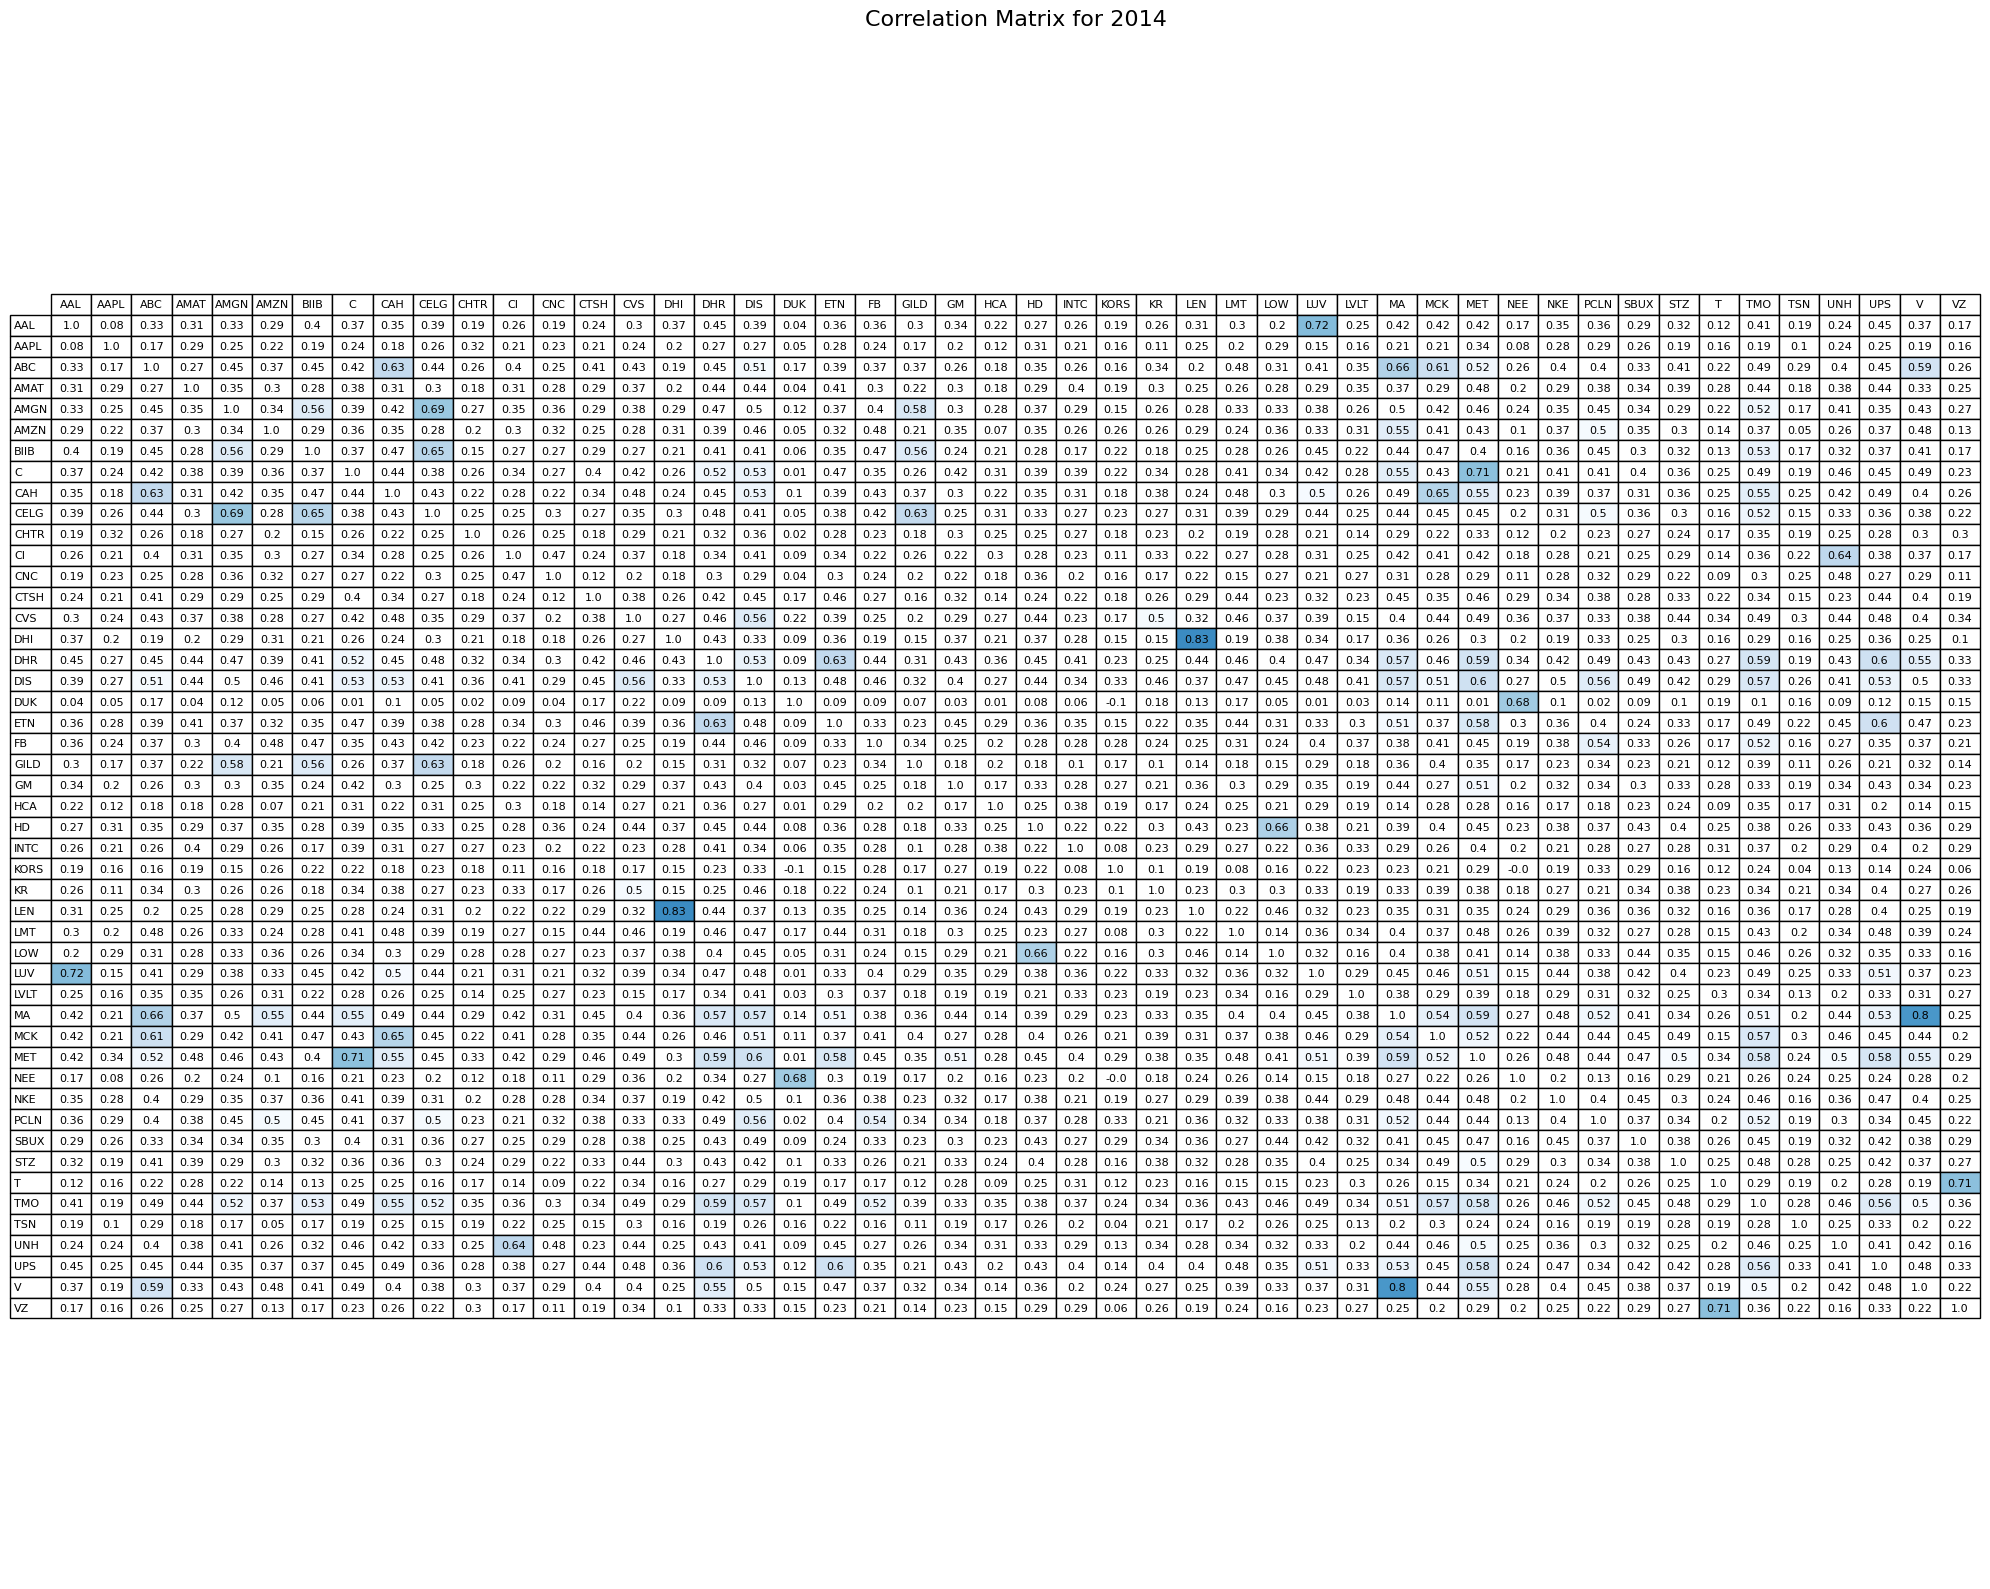

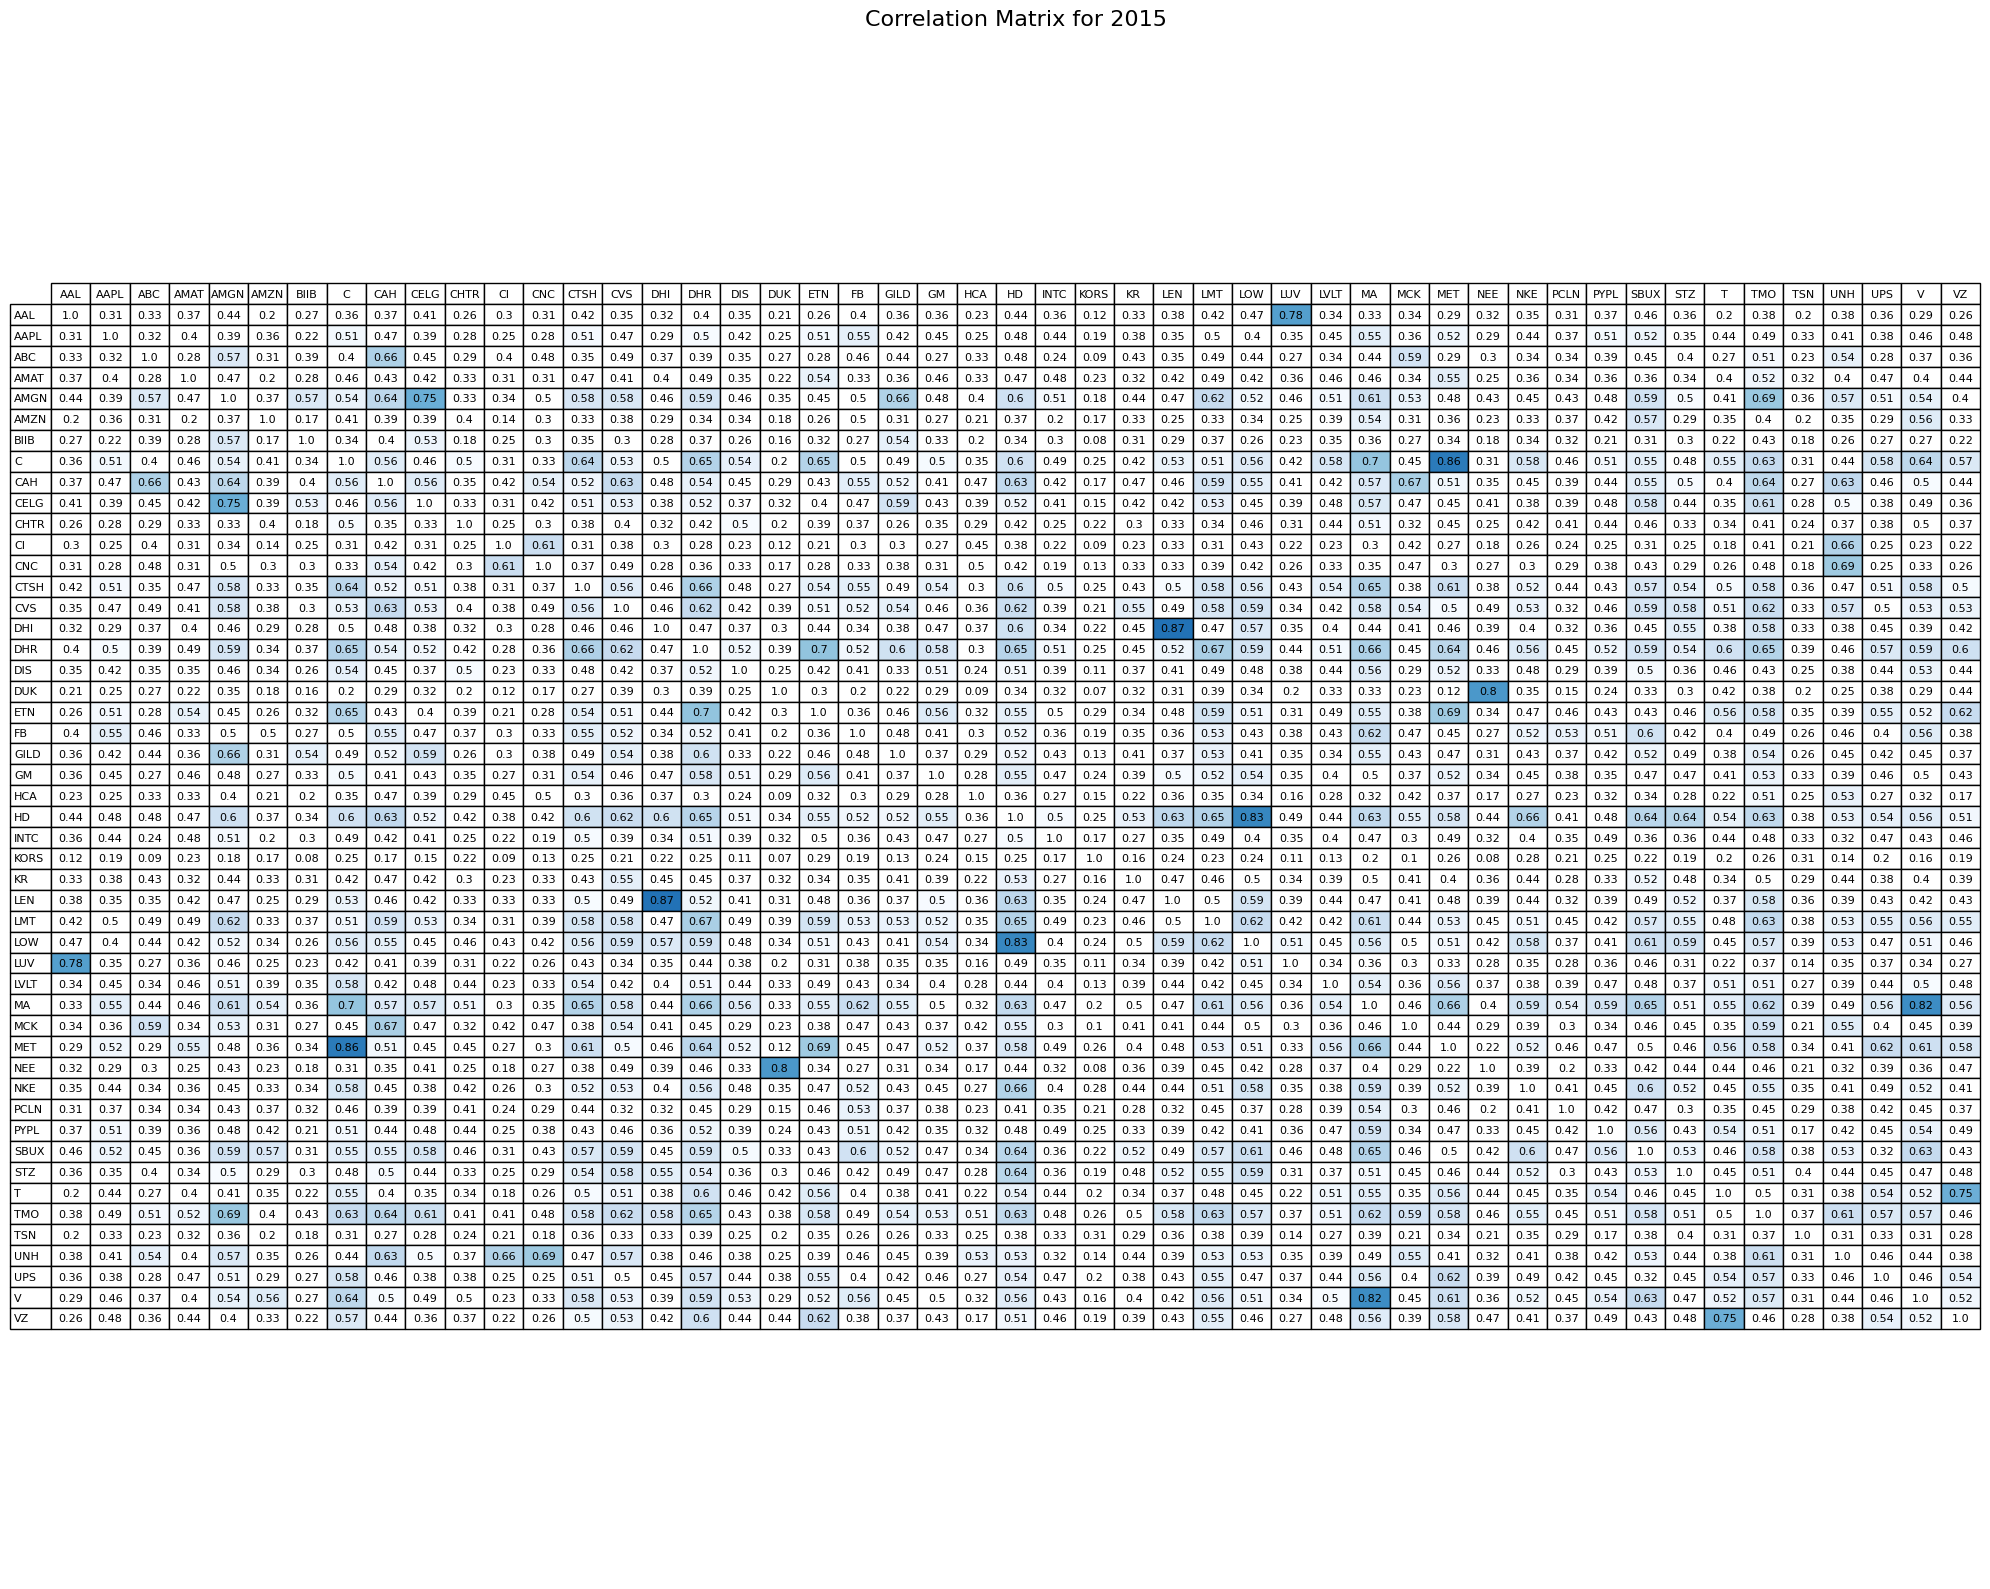

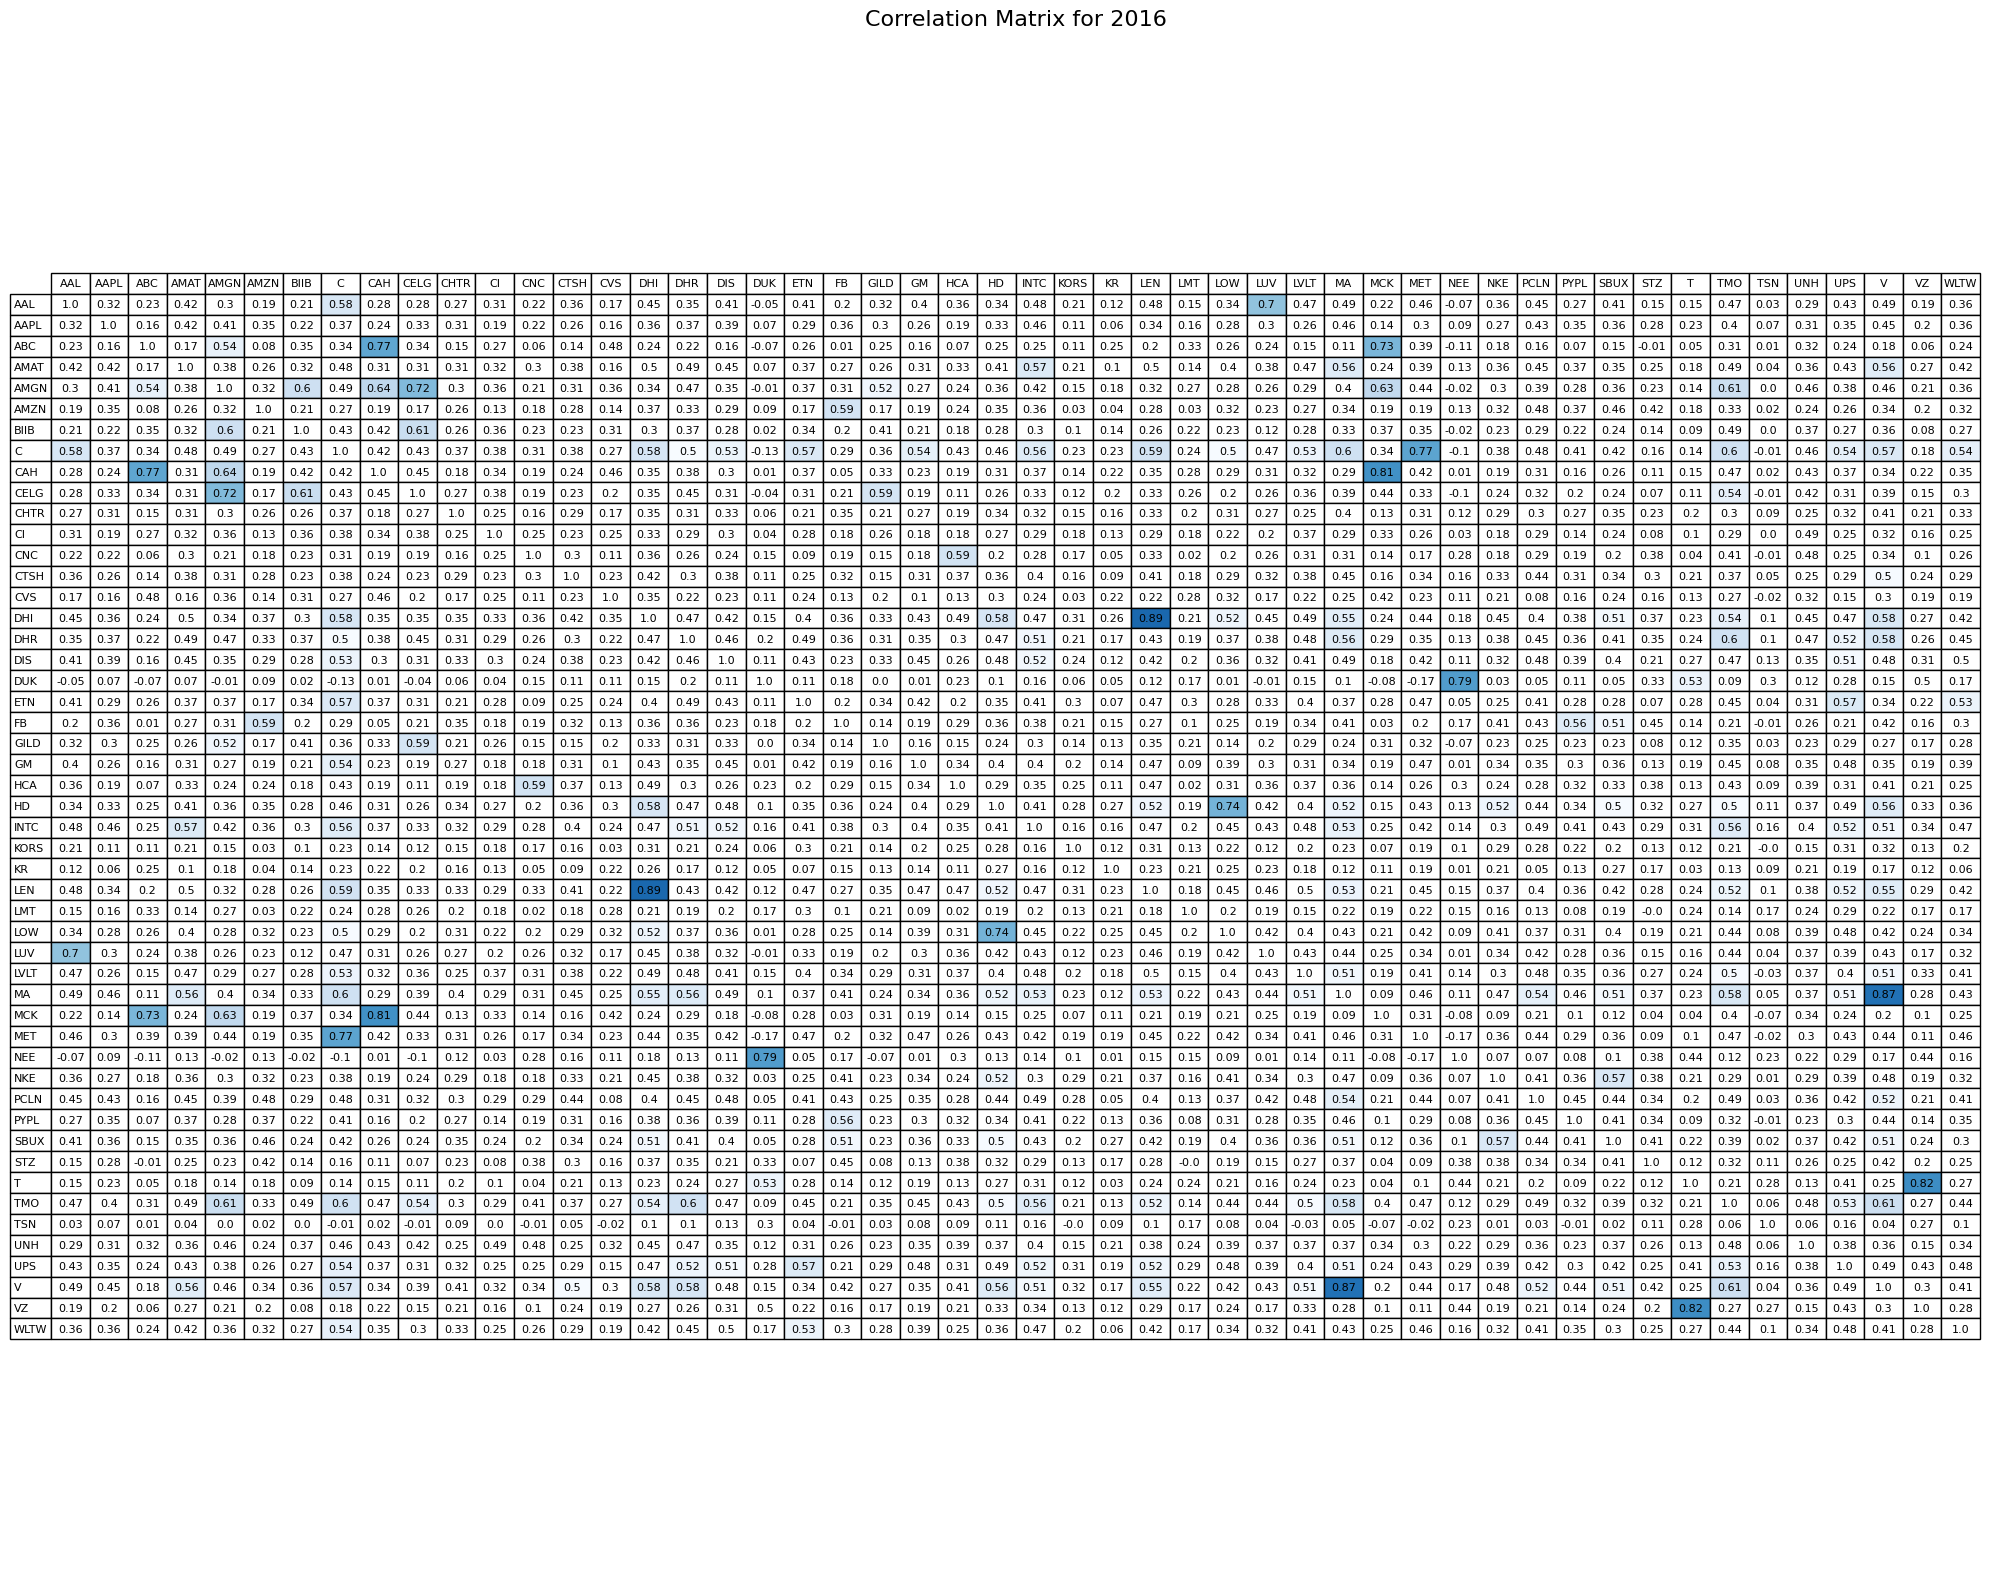

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
top50Stocks = top100Df['Ticker Symbol'].head(50).tolist()
df = pd.read_csv('prices-split-adjusted.csv')
dfTop50 = df[df['symbol'].isin(top50Stocks)].copy()
dfTop50.loc[:, 'date'] = pd.to_datetime(dfTop50['date'])
dfTop50.loc[:, 'daily_return'] = dfTop50.groupby('symbol')['close'].pct_change()

returns = dfTop50.pivot(index='date', columns='symbol', values='daily_return')

def plotCorrelationValues(corrMatrix, title):
    corrMatrix = corrMatrix.dropna(how='all').dropna(axis=1, how='all')
    fig, ax = plt.subplots(figsize=(20, 16))
    ax.axis('off')
    table = ax.table(cellText=corrMatrix.round(2).values,
                     rowLabels=corrMatrix.index,
                     colLabels=corrMatrix.columns,
                     cellLoc='center',
                     loc='center')

    table.auto_set_font_size(False)
    table.set_fontsize(8)
    for i in range(len(corrMatrix.index)):
        for j in range(len(corrMatrix.columns)):
            cell = table[i+1, j]
            if i != j:
                cellValue = corrMatrix.iloc[i, j]
                if pd.isna(cellValue):
                    cell.set_facecolor('lightgrey')
                elif abs(cellValue) <= 0.5:
                    cell.set_facecolor('white')
                else:
                    if cellValue > 0:
                        color_intensity = (cellValue - 0.5) * 2
                        cell.set_facecolor(plt.cm.Blues(color_intensity))
                    else:
                        color_intensity = (abs(cellValue) - 0.5) * 2
                        cell.set_facecolor(plt.cm.Reds(color_intensity))

    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()
    print("\n\n\n")

overallCorrMatrix = returns.corr()
plotCorrelationValues(overallCorrMatrix, 'Overall Correlation Matrix')

for year in returns.index.year.unique():
    yearly_returns = returns[returns.index.year == year]
    corrMatrix = yearly_returns.corr()
    plotCorrelationValues(corrMatrix, f'Correlation Matrix for {year}')


### **Part c**

In [91]:
import pandas as pd
import numpy as np
from tabulate import tabulate

securitiesDf = pd.read_csv('securities.csv')
tickerToName = dict(zip(securitiesDf['Ticker symbol'], securitiesDf['Security']))
tickerToSector = dict(zip(securitiesDf['Ticker symbol'], securitiesDf['GICS Sector']))

def identifyExtremeCorrelations(corrMatrix, highThreshold=0.7, lowThreshold=0.25):
    highCorrPairs = []
    lowCorrPairs = []
    for i in range(len(corrMatrix.index)):
        for j in range(i+1, len(corrMatrix.columns)):
            ticker1 = corrMatrix.index[i]
            ticker2 = corrMatrix.columns[j]
            corrValue = corrMatrix.iloc[i, j]
            company1 = tickerToName.get(ticker1, ticker1)
            company2 = tickerToName.get(ticker2, ticker2)
            sector1 = tickerToSector.get(ticker1, 'N/A')
            sector2 = tickerToSector.get(ticker2, 'N/A')
            if abs(corrValue) > highThreshold:
                highCorrPairs.append((ticker1, company1, sector1, ticker2, company2, sector2, corrValue))
            elif abs(corrValue) <= lowThreshold:
                lowCorrPairs.append((ticker1, company1, sector1, ticker2, company2, sector2, corrValue))

    highCorrPairs.sort(key=lambda x: abs(x[6]), reverse=True)
    lowCorrPairs.sort(key=lambda x: abs(x[6]))

    columns = ['Ticker 1', 'Company 1', 'Sector 1', 'Ticker 2', 'Company 2', 'Sector 2', 'Correlation']
    return pd.DataFrame(highCorrPairs, columns=columns), pd.DataFrame(lowCorrPairs, columns=columns)

def printTableWithBorder(df, columnRenames):
    dfRenamed = df.rename(columns=columnRenames)
    print(tabulate(dfRenamed, headers='keys', tablefmt='grid', showindex=False, stralign='center'))


mostCorrelatedDf, leastCorrelatedDf = identifyExtremeCorrelations(overallCorrMatrix, highThreshold=0.7, lowThreshold=0.25)


columnRenames = {
    'Ticker 1': 'Ticker Symbol 1',
    'Company 1': 'Company Name 1',
    'Sector 1': 'GICS Sector 1',
    'Ticker 2': 'Ticker Symbol 2',
    'Company 2': 'Company Name 2',
    'Sector 2': 'GICS Sector 2',
    'Correlation': 'Correlation Value'
}


print("Most Correlated Pairs (|correlation| > 0.7):")
printTableWithBorder(mostCorrelatedDf, columnRenames)

print("\n" + "="*50 + "\n")

print("Least Correlated Pairs (|correlation| <= 0.25):")
printTableWithBorder(leastCorrelatedDf, columnRenames)

Most Correlated Pairs (|correlation| > 0.7):
+-------------------+------------------+-----------------------------+-------------------+------------------------+-----------------------------+---------------------+
|  Ticker Symbol 1  |  Company Name 1  |        GICS Sector 1        |  Ticker Symbol 2  |     Company Name 2     |        GICS Sector 2        |   Correlation Value |
+===================+==================+=============================+===================+========================+=============================+=====================+
|        DHI        |   D. R. Horton   |   Consumer Discretionary    |        LEN        |      Lennar Corp.      |   Consumer Discretionary    |            0.844933 |
+-------------------+------------------+-----------------------------+-------------------+------------------------+-----------------------------+---------------------+
|        MA         | Mastercard Inc.  |   Information Technology    |         V         |       Visa Inc.        |

**Most Strongly Correlated Pairs**


**Same Industry Pairs:** If we see pairs like (DHI - LIN) or (C - MET), these are likely strongly correlated because they operate in the same industry. Companies in the same sector often face similar market conditions, regulatory environments, and economic factors.


**Complementary Businesses:** Pairs like (V - MA) might be strongly correlated due to their complementary nature. As Financials sector (V) grows, so does the demand for financial services (MA).

\



**Least Strongly Correlated Pairs**


**Different Sector Pairs:** Pairs like (NKE - TSM) (consumer goods vs. Health care) might be least correlated because they operate in vastly different sectors with different driving factors.

**Defensive vs. Cyclical Stocks**: A pair like (AMZN - CHTR) might show low correlation because Charter Communication is considered a defensive stock (stable in various economic conditions), while Amazon is more cyclical (sensitive to economic cycles).

**Domestic vs. International Focus:** A pair like (FB - CAH) might show low correlation because facebook also have significant international exposure while cardinal health only caters to some countries only.

### **Part d**

In [92]:
import pandas as pd
import numpy as np
from tabulate import tabulate
topSectors = securitiesDf['GICS Sector'].value_counts().head(5)
def analyzeCorrelations(corrMatrix):
    np.fill_diagonal(corrMatrix.values, np.nan)

    high_corr = ((corrMatrix > 0.75) & (corrMatrix <= 1.0)).sum().sum()
    mid_high_corr = ((corrMatrix > 0.5) & (corrMatrix <= 0.75)).sum().sum()
    mid_low_corr = ((corrMatrix > 0.25) & (corrMatrix <= 0.5)).sum().sum()
    low_pos_corr = ((corrMatrix > 0) & (corrMatrix <= 0.25)).sum().sum()
    neg_corr = (corrMatrix <= 0).sum().sum()
    total_pairs = (high_corr + mid_high_corr + mid_low_corr + low_pos_corr + neg_corr)

    return {
        "0.75 < corr <= 1.00": f"{int(high_corr)} ({high_corr/total_pairs:.2%})",
        "0.50 < corr <= 0.75": f"{int(mid_high_corr)} ({mid_high_corr/total_pairs:.2%})",
        "0.25 < corr <= 0.50": f"{int(mid_low_corr)} ({mid_low_corr/total_pairs:.2%})",
        "0.00 < corr <= 0.25": f"{int(low_pos_corr)} ({low_pos_corr/total_pairs:.2%})",
        "-1.00 <= corr <= 0.00": f"{int(neg_corr)} ({neg_corr/total_pairs:.2%})"
    }

def createSectorCorrelationMatrix(sector):
    sectorStocks = securitiesDf[securitiesDf['GICS Sector'] == sector]['Ticker symbol'].tolist()
    sectorPrices = pricesDf[pricesDf['symbol'].isin(sectorStocks)]
    pivotedPrices = sectorPrices.pivot(index='date', columns='symbol', values='close')
    corrMatrix = pivotedPrices.pct_change().corr()
    return corrMatrix

sectorAnalysis = {}
for sector in topSectors.index:
    corrMatrix = createSectorCorrelationMatrix(sector)
    analysis = analyzeCorrelations(corrMatrix)
    sectorAnalysis[sector] = analysis
    analysisDf = pd.DataFrame([analysis])

summaryDf = pd.DataFrame(sectorAnalysis).T
overallAnalysis = analyzeCorrelations(overallCorrMatrix)
summaryDf.loc['Overall'] = overallAnalysis

print("Summary of Correlation Analysis for Top 5 GICS Sectors and Overall:")
printTableWithBorder(summaryDf, {})

Summary of Correlation Analysis for Top 5 GICS Sectors and Overall:
+-----------------------+-----------------------+-----------------------+-----------------------+-------------------------+
|  0.75 < corr <= 1.00  |  0.50 < corr <= 0.75  |  0.25 < corr <= 0.50  |  0.00 < corr <= 0.25  |  -1.00 <= corr <= 0.00  |
+=======================+=======================+=======================+=======================+=========================+
|      16 (0.23%)       |     816 (11.70%)      |     5612 (80.49%)     |      528 (7.57%)      |        0 (0.00%)        |
+-----------------------+-----------------------+-----------------------+-----------------------+-------------------------+
|      20 (0.43%)       |     2240 (47.74%)     |     2244 (47.83%)     |      188 (4.01%)      |        0 (0.00%)        |
+-----------------------+-----------------------+-----------------------+-----------------------+-------------------------+
|      16 (0.35%)       |     654 (14.35%)      |     3614 (79.3

**Sector-Specific and overall Correlations:**



1.   Financials exhibit the strongest intra-sector correlations, with 87.
79% of pairs having correlations above 0.5 (8.57% above 0.75).
Industrials follow closely, with 48.17% of pairs above 0.5, indicating consistent sector trends.
1.   Other sectors like Consumer Discretionary, Information Technology, and Health Care show moderate correlations, primarily in the 0.25 to 0.5 range.
2.   The overall market shows weaker correlations, with only 6.69% of stock pairs above 0.5 and a majority (77.88%) in the 0.25 to 0.5 range due to large number of sample size and diffrent sectors.




Strong intra-sector correlations suggest that diversifying across different sectors may be more effective for risk management than diversifying within the same sector.

The absence of negative correlations indicates a generally positive relationship among stocks.

**Conclusion:**


*   Stocks within the same sector tend to have stronger correlations than the overall market, particularly in Financials and Industrials, highlighting the importance of sector analysis in investment strategies.



## **Q5: Distribution of Daily Price Movements  (10 Points)**
Plot the distributions of frequency of daily price movements according to your statistic.   What type of classical distribution does this look like, and are there any surprising deviations from the theoretical distribution?

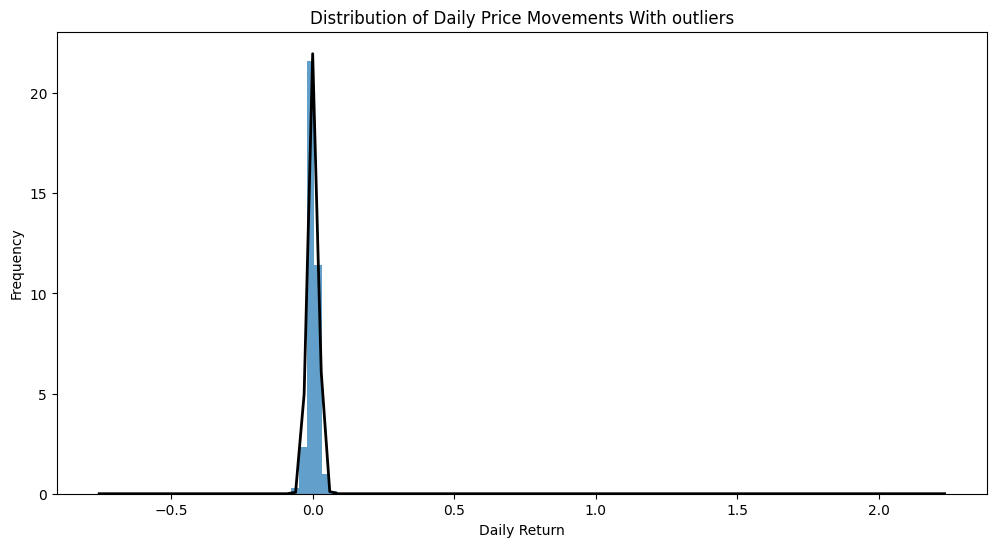

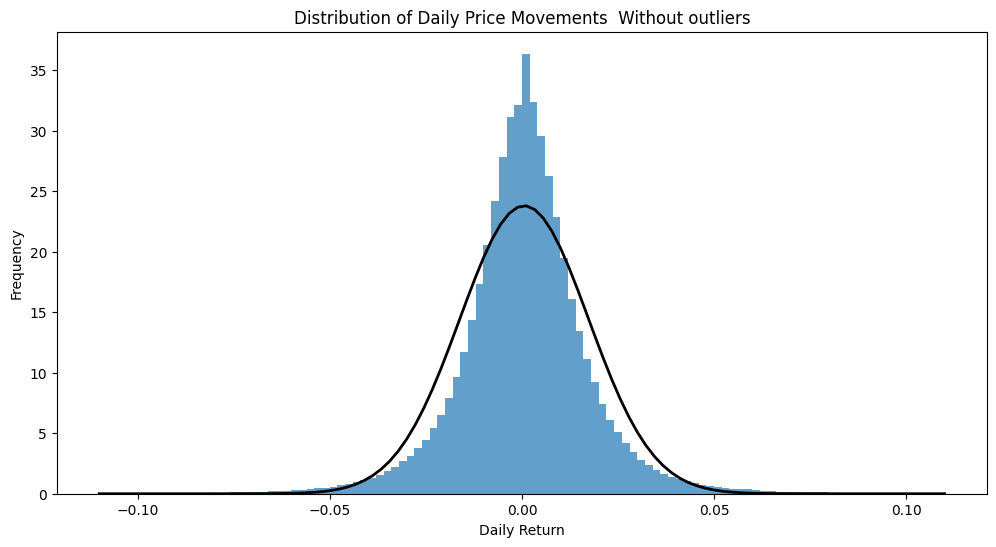

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('prices-split-adjusted.csv')
df['return'] = df.groupby('symbol')['close'].pct_change()


plt.figure(figsize=(12, 6))
plt.hist(df['return'].dropna(), bins=100, density=True, alpha=0.7)
plt.title('Distribution of Daily Price Movements With outliers')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
mu, std = stats.norm.fit(df['return'].dropna())
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.show()

print("\n\n")
df = df[np.abs(df['return']) < 0.1]

plt.figure(figsize=(12, 6))
plt.hist(df['return'].dropna(), bins=100, density=True, alpha=0.7)
plt.title('Distribution of Daily Price Movements  Without outliers')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
mu, std = stats.norm.fit(df['return'].dropna())
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.show()




It's normal distribution with removing outliers

## **Q6: Exploratory Data Analysis (15 Points)**
Create three plots of your own using the dataset that you think reveal something very interesting. Explain what it is, and anything else you learned from your exploration.

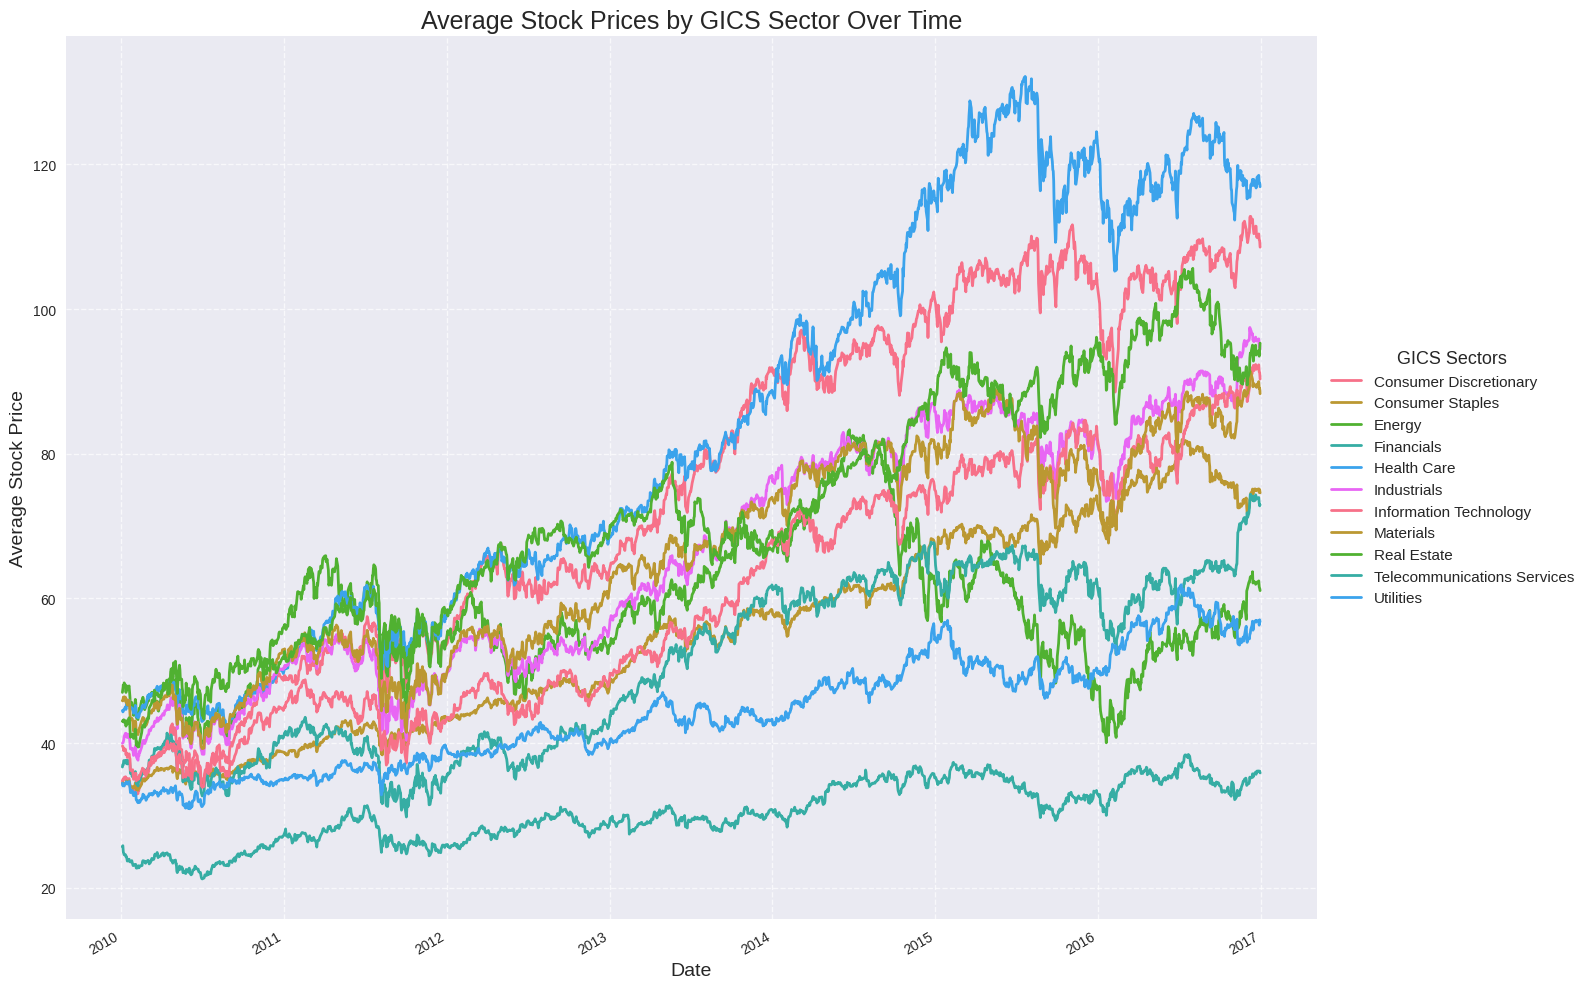


Stock Increments by GICS Sector:

+-----------------------------+------------------+---------------------+
|           Sector            |   Avg. Increment |   Overall Increment |
+=============================+==================+=====================+
|   Consumer Discretionary    |           0.0419 |             73.8758 |
+-----------------------------+------------------+---------------------+
|         Health Care         |           0.0411 |             72.409  |
+-----------------------------+------------------+---------------------+
|         Industrials         |           0.0309 |             54.4606 |
+-----------------------------+------------------+---------------------+
|         Real Estate         |           0.0297 |             52.2663 |
+-----------------------------+------------------+---------------------+
|   Information Technology    |           0.0288 |             50.7311 |
+-----------------------------+------------------+---------------------+
|          Mater

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

securitiesDf = pd.read_csv('securities.csv')
pricesDf = pd.read_csv('prices-split-adjusted.csv')

mergedDf = pd.merge(pricesDf, securitiesDf[['Ticker symbol', 'GICS Sector']], left_on='symbol', right_on='Ticker symbol')
mergedDf['date'] = pd.to_datetime(mergedDf['date'])
groupedDf = mergedDf.groupby(['GICS Sector', 'date'])['close'].mean().reset_index()

fig, ax = plt.subplots(figsize=(16, 10))
sectorIncrements = groupedDf.groupby('GICS Sector').agg(
    Average_Increment=('close', lambda x: (x.iloc[-1] - x.iloc[0]) / len(x)),
    Overall_Increment=('close', lambda x: x.iloc[-1] - x.iloc[0])
).reset_index()

sectorIncrements['Average_Increment'] = sectorIncrements['Average_Increment'].round(4)
sectorIncrements['Overall_Increment'] = sectorIncrements['Overall_Increment'].round(4)
sectorIncrements = sectorIncrements.sort_values('Overall_Increment', ascending=False)

for sector in groupedDf['GICS Sector'].unique():
    sectorData = groupedDf[groupedDf['GICS Sector'] == sector]
    ax.plot(sectorData['date'], sectorData['close'], label=sector, linewidth=2)

ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Average Stock Price', fontsize=14)
ax.set_title('Average Stock Prices by GICS Sector Over Time', fontsize=18)
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_minor_locator(MonthLocator([1, 4, 7, 10]))  # January, April, July, October
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
plt.gcf().autofmt_xdate()
ax.legend(title='GICS Sectors', title_fontsize='13', fontsize='11', loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nStock Increments by GICS Sector:\n")
printTableWithBorder(sectorIncrements, {
    'GICS Sector': 'Sector',
    'Average_Increment': 'Avg. Increment',
    'Overall_Increment': 'Overall Increment'
})


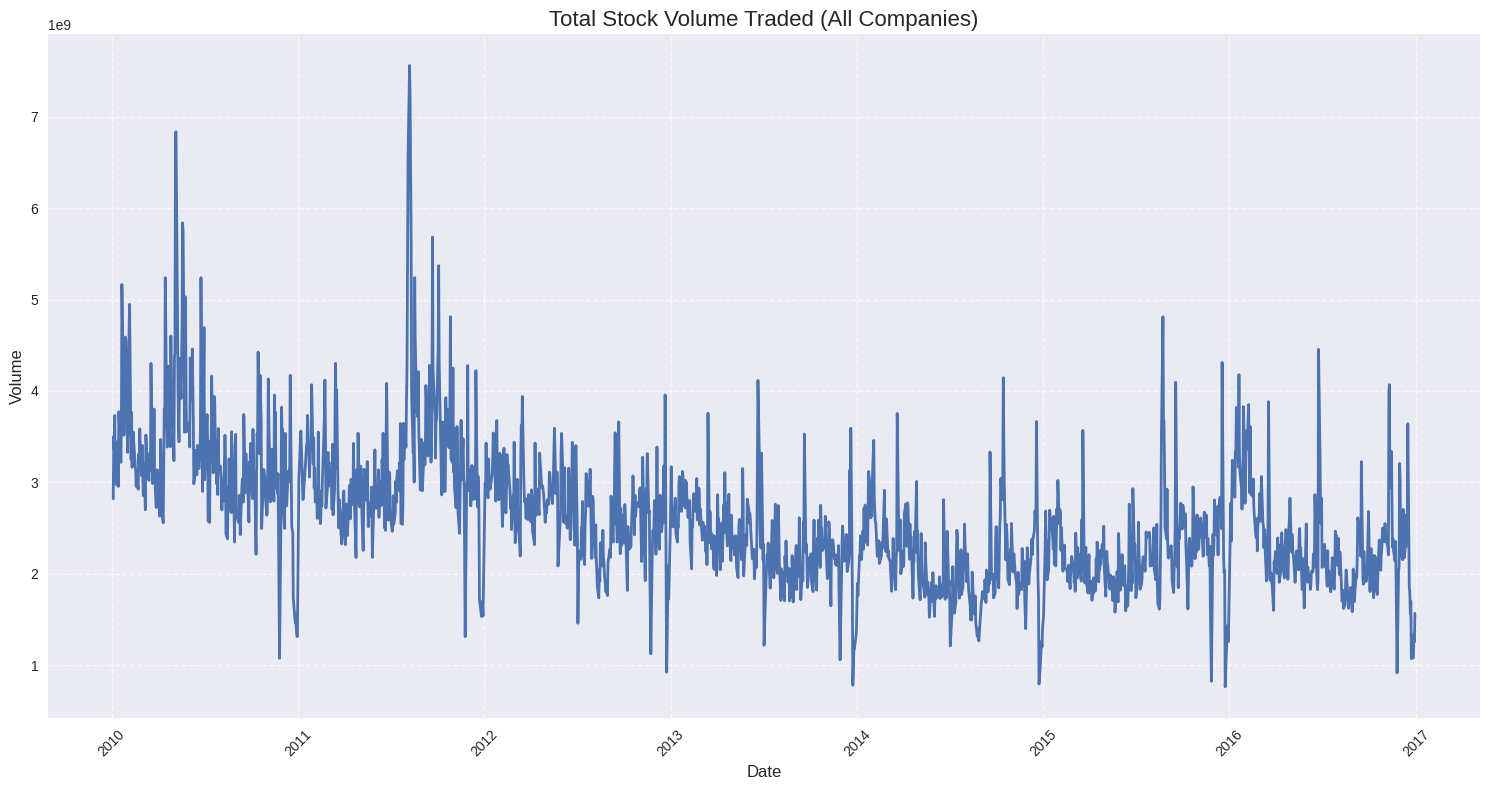

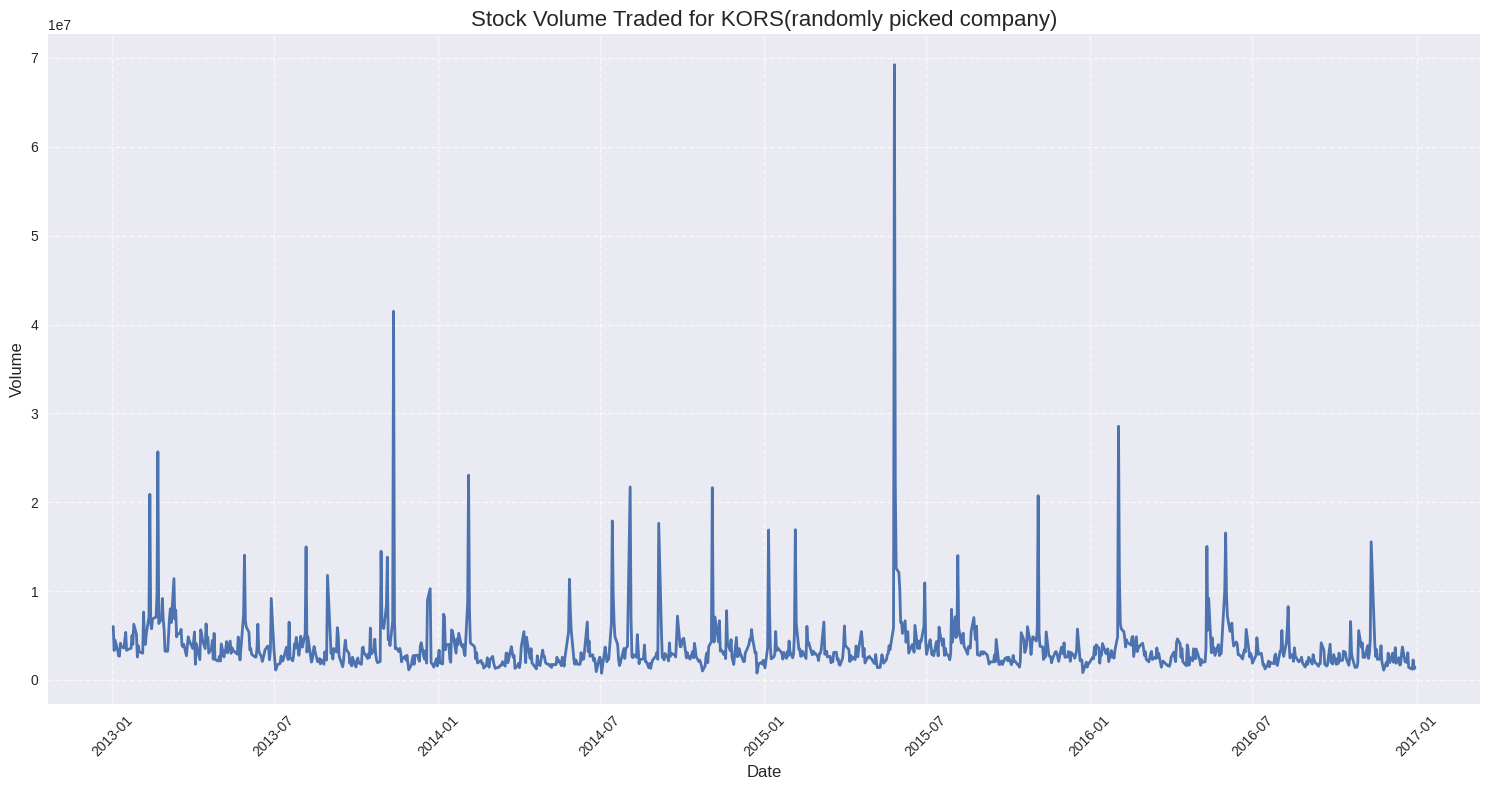

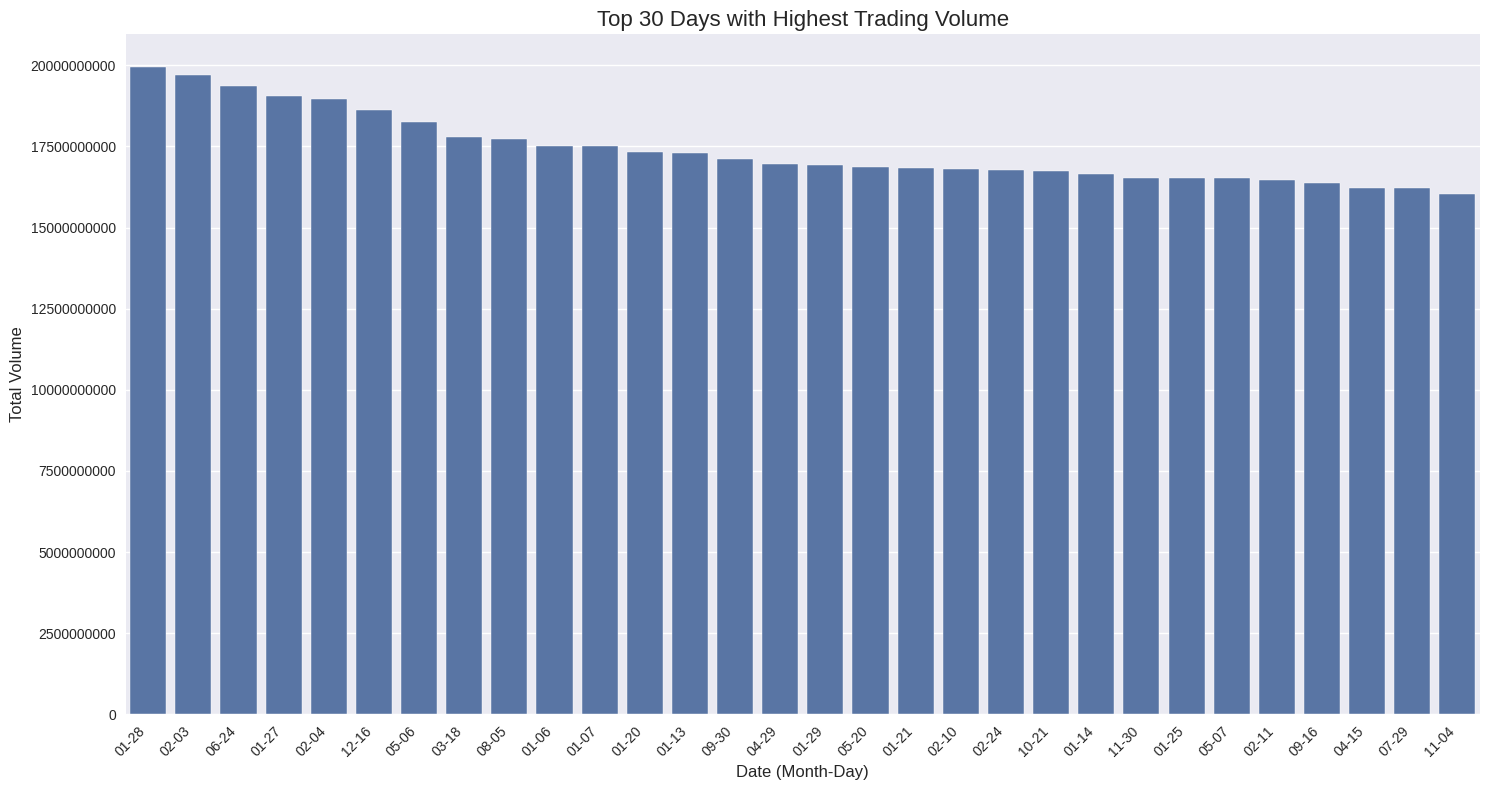





Percentage of Stock Volume Traded by Year and Month
+---------+-----------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
|         |    Total Volume |   Jan |   Feb |   Mar |   Apr |   May |   Jun |   Jul |   Aug |   Sep |   Oct |   Nov |   Dec |
+=========+=================+=======+=======+=======+=======+=======+=======+=======+=======+=======+=======+=======+=======+
| 2010.00 | 847059127000.00 |  8.31 |  7.79 |  8.65 |  8.89 | 10.78 |  9.48 |  8.47 |  7.81 |  7.37 |  8.04 |  7.65 |  6.76 |
+---------+-----------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
| 2011.00 | 812890458300.00 |  8.10 |  7.15 |  8.52 |  6.94 |  7.29 |  8.08 |  7.22 | 12.67 |  9.52 |  9.50 |  8.04 |  6.98 |
+---------+-----------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
| 2012.00 | 674426811700.00 |  9.26 |  8.74 |  9.30 |  8.41 | 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Read the CSV file
df = pd.read_csv('prices.csv')

df['date'] = pd.to_datetime(df['date'], format="mixed")
totalVolume = df.groupby('date')['volume'].sum().reset_index()

# Create the graph
plt.figure(figsize=(15, 8))
plt.plot(totalVolume['date'], totalVolume['volume'], linewidth=2)
plt.title('Total Stock Volume Traded (All Companies)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.close()

randomCompany = random.choice(df['symbol'].unique())
companyData = df[df['symbol'] == randomCompany]

print("\n\n\n")

plt.figure(figsize=(15, 8))
plt.plot(companyData['date'], companyData['volume'], linewidth=2)
plt.title(f'Stock Volume Traded for {randomCompany}(randomly picked company)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.close()

df['monthDay'] = df['date'].dt.strftime('%m-%d')
volumeByDay = df.groupby('monthDay')['volume'].sum().reset_index()
top30Days = volumeByDay.sort_values('volume', ascending=False).head(30)
top30Days['rank'] = range(1, 31)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
volumeByYearMonth = df.groupby(['year', 'month'])['volume'].sum().reset_index()
volumeByYear = df.groupby('year')['volume'].sum().reset_index()
tableData = {}

print("\n\n\n")

plt.figure(figsize=(15, 8))
sns.barplot(x='monthDay', y='volume', data=top30Days)
plt.title('Top 30 Days with Highest Trading Volume', fontsize=16)
plt.xlabel('Date (Month-Day)', fontsize=12)
plt.ylabel('Total Volume', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()
plt.close()

for _, row in volumeByYear.iterrows():
    year = row['year']
    totalVolume = row['volume']
    tableData[year] = {'Total': totalVolume}
    for _, monthRow in volumeByYearMonth[volumeByYearMonth['year'] == year].iterrows():
        month = monthRow['month']
        monthVolume = monthRow['volume']
        percentage = (monthVolume / totalVolume) * 100
        tableData[year][month] = percentage

tableDf = pd.DataFrame.from_dict(tableData, orient='index')
columns = ['Total'] + list(range(1, 13))
tableDf = tableDf.reindex(columns=columns)

def printTableWithBorder(df, columnRenames):
    dfRenamed = df.rename(columns=columnRenames)
    print(tabulate(dfRenamed, headers='keys', tablefmt='grid', showindex=True, stralign='right', numalign='right', floatfmt=".2f"))

columnRenames = {
    'Total': 'Total Volume',
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
print("\n\n\n")
print("Percentage of Stock Volume Traded by Year and Month")
printTableWithBorder(tableDf, columnRenames)


Average volume one month before split: 90.45M
Average volume one month after split: 48.70M
Overall average volume: 63.15M


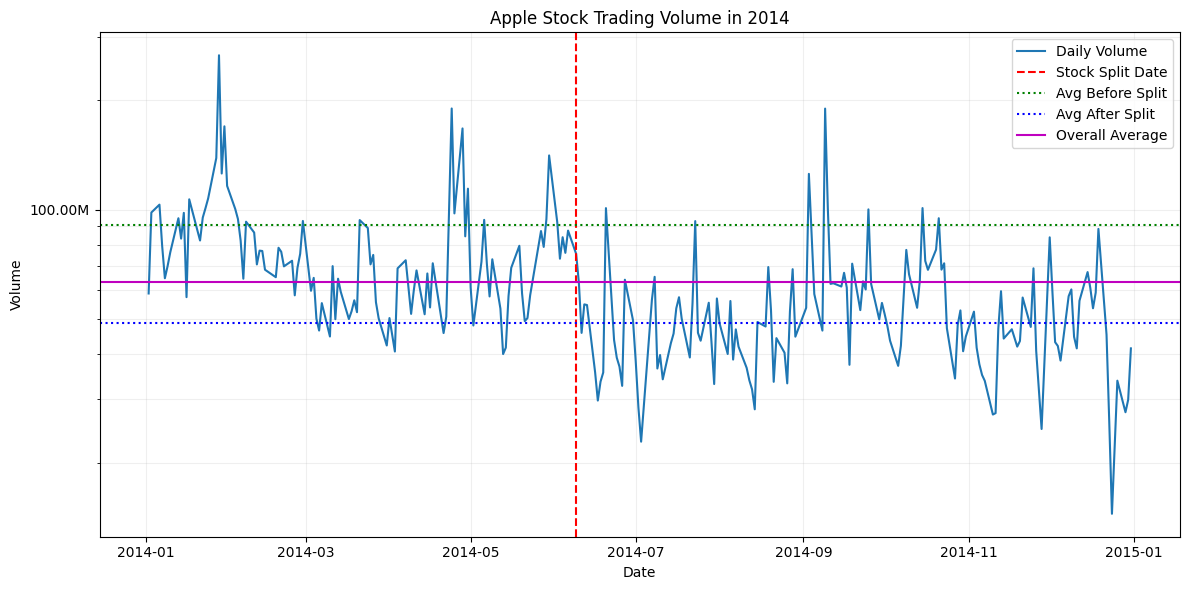

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


df = pd.read_csv('prices.csv')
df['date'] = pd.to_datetime(df['date'], format="mixed")
appleDf = df[(df['symbol'] == 'AAPL') & (df['date'].dt.year == 2014)]

splitDate = datetime(2014, 6, 9)
oneMonthBefore = splitDate - timedelta(days=15)
oneMonthAfter = splitDate + timedelta(days=15)
beforeSplit = appleDf[(appleDf['date'] >= oneMonthBefore) & (appleDf['date'] < splitDate)]['volume'].mean()
afterSplit = appleDf[(appleDf['date'] > splitDate) & (appleDf['date'] <= oneMonthAfter)]['volume'].mean()
totalAverage = appleDf['volume'].mean()

def formatLargeNumber(number):
    if number >= 1e9:
        return f"{number/1e9:.2f}B"
    elif number >= 1e6:
        return f"{number/1e6:.2f}M"
    elif number >= 1e3:
        return f"{number/1e3:.2f}K"
    else:
        return f"{number:.2f}"


print(f"Average volume one month before split: {formatLargeNumber(beforeSplit)}")
print(f"Average volume one month after split: {formatLargeNumber(afterSplit)}")
print(f"Overall average volume: {formatLargeNumber(totalAverage)}")

plt.figure(figsize=(12, 6))
plt.plot(appleDf['date'], appleDf['volume'], label='Daily Volume')
plt.axvline(x=splitDate, color='r', linestyle='--', label='Stock Split Date')
plt.axhline(y=beforeSplit, color='g', linestyle=':', label='Avg Before Split')
plt.axhline(y=afterSplit, color='b', linestyle=':', label='Avg After Split')
plt.axhline(y=totalAverage, color='m', linestyle='-', label='Overall Average')

plt.title('Apple Stock Trading Volume in 2014')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.yscale('log')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: formatLargeNumber(x)))

plt.tight_layout()
plt.show()


## **Q7: Predicting Earnings Per Share - Linear Regression (10 Points)**
The foundations.csv file contains four years worth of profitability data on each of the companies.   Perhaps the most important number to reflect how profitable the company is the earnings per share.    There are two predictive tasks here:
<ol type="i">
<li> Use linear regression to predict the earnings per share for company X in year Y using the other variables from foundations.csv for year Y. </li>
<li> Use linear regressions to predict the earnings per share for company X in year Y using the variables from foundations.csv for year Y-1.</li>
</ol>

How good are these models and how can you tell?


### **Task i**

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


data = pd.read_csv('fundamentals.csv')
new_var = [
    'Total Revenue',
    'Gross Profit',
    'Operating Income',
    'Net Income',
    'Earnings Before Interest and Tax',
    'Total Liabilities',
    'Total Equity',
    'Capital Expenditures',
    'Treasury Stock',
     'Profit Margin',
    'Operating Margin',
    'After Tax ROE',
    'Estimated Shares Outstanding',
    "Total Assets",
    "Net Income",
    "Investments",

]

features = new_var
X = data[features]
y = data['Earnings Per Share']
mask = ~(X.isna().any(axis=1) | y.isna())
X = X[mask]
y = y[mask]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train )
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100
print(f"Mean Square error: {mse:.4f}")
print(f"R Square Score: {r2:.2f}%")


Mean Square error: 11.2657
R Square Score: 0.26%


### **Task ii**

In [95]:

data = pd.read_csv('fundamentals.csv')
new_var = [
    'Total Revenue',
    'Gross Profit',
    'Operating Income',
    'Net Income',
    'Earnings Before Interest and Tax',
    'Total Liabilities',
    'Total Equity',
    'Capital Expenditures',
    'Treasury Stock',
    'Profit Margin',
    'Operating Margin',
    'After Tax ROE',
    'Estimated Shares Outstanding',
    "Total Assets",
    "Net Income",
    "Investments",
]

features = new_var
target = 'Earnings Per Share'
data = data.sort_values(by=['Ticker Symbol', 'Period Ending'])
data_shifted = data.groupby('Ticker Symbol').apply(lambda df: df.assign(**{col: df[col].shift(1) for col in features}))
data_shifted = data_shifted.reset_index(drop=True)
mask = ~(data_shifted[features].isna().any(axis=1) | data_shifted[target].isna())
X = data_shifted[features][mask]
y = data_shifted[target][mask]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100

print(f"Mean Square Error: {mse:.4f}")
print(f"R Square Score: {r2:.2f}")


Mean Square Error: 31.3751
R Square Score: 0.06


Conclusion for Q7: \[Write here\]

## **Q8: Advanced Modeling Techniques (10 Points)**
Now repeat this exercise to try to build better models for parts i and ii.    I bet that (hint) improved data preparation/normalization/feature engineering will help.  Maybe an algorithm other than linear regression (e.g. Random Forest, Nearest Neighbor, etc) will prove better training.

\[Note: [scikit-learn](https://scikit-learn.org/stable/) is a user-friendly library which is used to perform data loading, pre-processing, transformations, algorithms and metrics needed for Data Science and Machine learning\]  

Compare their performance and explain your reasoning for the differences in their performances.

Mean Squared Error: 0.1482
R-squared Score: 0.99
Accuracy: 99.03%


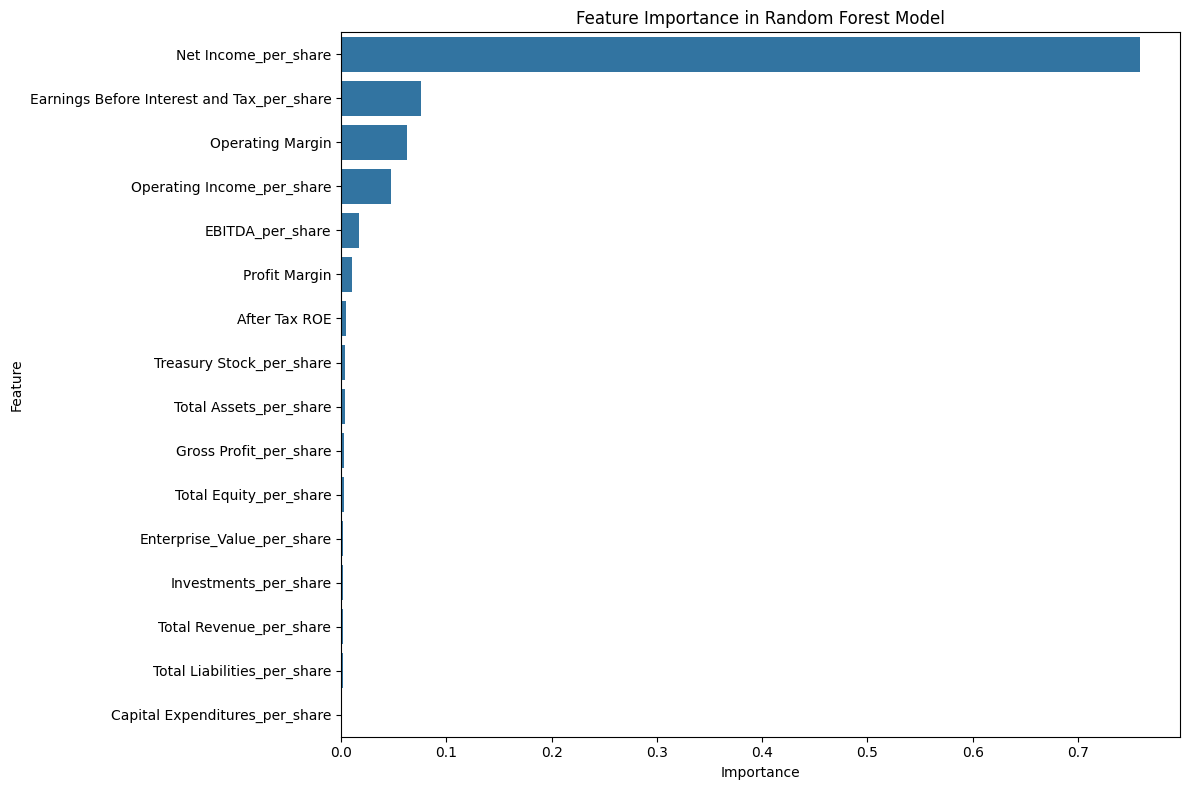

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('fundamentals.csv')

def replace_inf_with_nan(df):
    return df.replace([np.inf, -np.inf], np.nan)

def engineer_features(df):
    df['EBITDA'] = df['Net Income'] + df['Interest Expense'] + df['Income Tax'] + df['Depreciation']
    df['Enterprise_Value'] = df['Total Assets'] - df['Cash and Cash Equivalents'] + df['Short-Term Debt / Current Portion of Long-Term Debt'] + df['Long-Term Debt']
    features_to_divide = [
        'Total Revenue', 'Gross Profit', 'Operating Income', 'Net Income',
        'Earnings Before Interest and Tax', 'Total Liabilities', 'Total Equity',
        'Capital Expenditures', 'Treasury Stock', 'EBITDA', 'Enterprise_Value',
        'Total Assets', 'Investments'
    ]

    for feature in features_to_divide:
        df[f'{feature}_per_share'] = df[feature] / df['Estimated Shares Outstanding']

    return replace_inf_with_nan(df)

data = engineer_features(data)

new_var = [
    'Total Revenue_per_share',
    'Gross Profit_per_share',
    'Operating Income_per_share',
    'Net Income_per_share',
    'Earnings Before Interest and Tax_per_share',
    'Total Liabilities_per_share',
    'Total Equity_per_share',
    'Capital Expenditures_per_share',
    'Treasury Stock_per_share',
    'Profit Margin',
    'Operating Margin',
    'After Tax ROE',
    'EBITDA_per_share',
    'Enterprise_Value_per_share',
    'Total Assets_per_share',
    'Investments_per_share',
]

features = new_var
X = data[features]
y = data['Earnings Per Share']
mask = ~(X.isna().any(axis=1) | y.isna())
X = X[mask]
y = y[mask]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.2f}")
print(f"Accuracy: {accuracy:.2f}%")

feature_importance = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': features, 'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Mean Square Error: 18.9905
R Square Score: 0.43
Accuracy: 43.08%


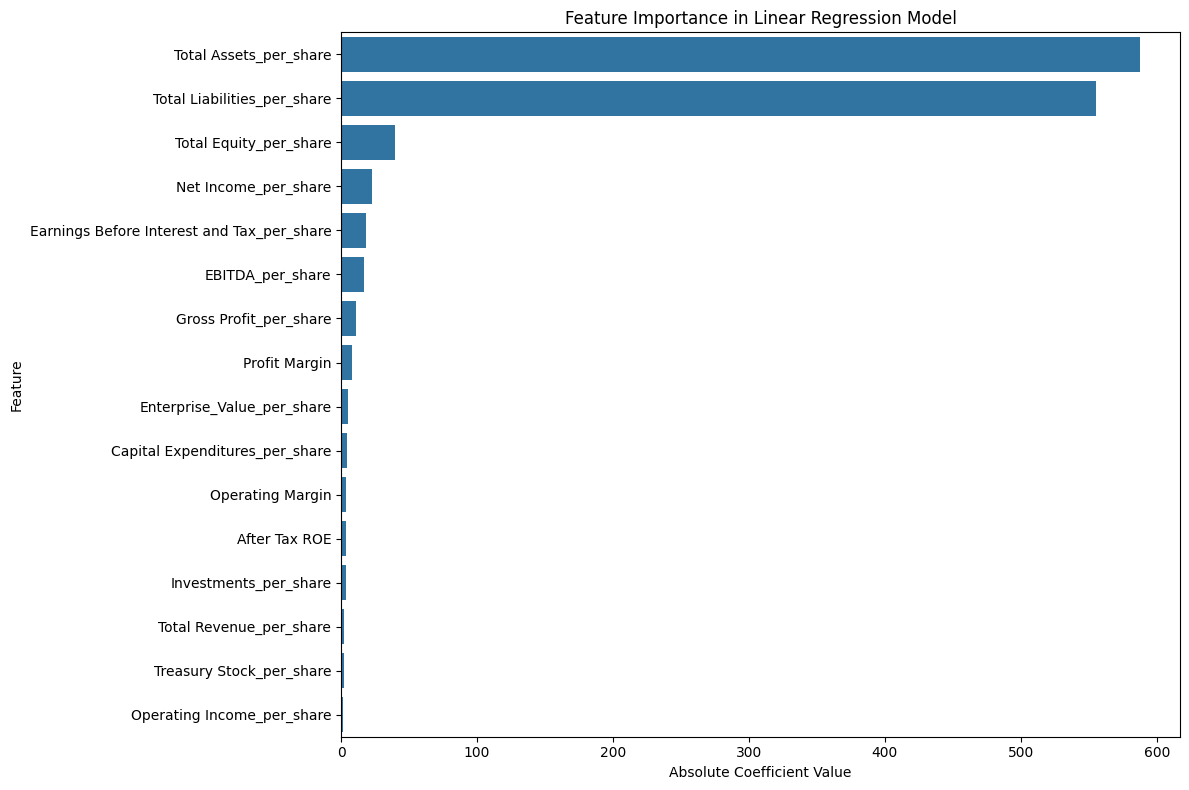

In [100]:
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('fundamentals.csv')

def replace_inf_with_nan(df):
    return df.replace([np.inf, -np.inf], np.nan)

def engineer_features(df):
    df['EBITDA'] = df['Net Income'] + df['Interest Expense'] + df['Income Tax'] + df['Depreciation']
    df['Enterprise_Value'] = df['Total Assets'] - df['Cash and Cash Equivalents'] + df['Short-Term Debt / Current Portion of Long-Term Debt'] + df['Long-Term Debt']

    features_to_divide = [
        'Total Revenue', 'Gross Profit', 'Operating Income', 'Net Income',
        'Earnings Before Interest and Tax', 'Total Liabilities', 'Total Equity',
        'Capital Expenditures', 'Treasury Stock', 'EBITDA', 'Enterprise_Value',
        'Total Assets', 'Investments'
    ]

    for feature in features_to_divide:
        df[f'{feature}_per_share'] = df[feature] / df['Estimated Shares Outstanding']

    return replace_inf_with_nan(df)

new_var = [
    'Total Revenue_per_share',
    'Gross Profit_per_share',
    'Operating Income_per_share',
    'Net Income_per_share',
    'Earnings Before Interest and Tax_per_share',
    'Total Liabilities_per_share',
    'Total Equity_per_share',
    'Capital Expenditures_per_share',
    'Treasury Stock_per_share',
    'Profit Margin',
    'Operating Margin',
    'After Tax ROE',
    'EBITDA_per_share',
    'Enterprise_Value_per_share',
    'Total Assets_per_share',
    'Net Income_per_share',
    'Investments_per_share',
]

features = new_var
target = 'Earnings Per Share'

data = engineer_features(data)
data = data.sort_values(by=['Ticker Symbol', 'Period Ending'])
data_shifted = data.groupby('Ticker Symbol').apply(lambda df: df.assign(**{col: df[col].shift(1) for col in features}))
data_shifted = data_shifted.reset_index(drop=True)
mask = ~(data_shifted[features].isna().any(axis=1) | data_shifted[target].isna())
X = data_shifted[features][mask]
y = data_shifted[target][mask]
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100

print(f"Mean Square Error: {mse:.4f}")
print(f"R Square Score: {r2:.2f}")
print(f"Accuracy: {accuracy:.2f}%")

feature_importance = np.abs(model.coef_)
feature_importance_df = pd.DataFrame({'feature': features, 'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance in Linear Regression Model')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Conclusion for Q8: \[Write here\]

## **Submission Guideline:**
- Submit everything through Google classroom. As mentioned above, you will need to upload:
  1. The Jupyter notebook all your work is in (.ipynb file), derived from the provided template
  2. PDF (export the notebook as a pdf file)


- These files should be named with the following format, where the italicized parts should be replaced with the corresponding values:
  1. cse519_hw1_*lastname_firstname_sbuid*.ipynb
  2. cse519_hw1_*lastname_firstname_sbuid*.pdf

Your Submission will  **NOT BE GRADED** if you don't follow the naming convention**❗❗**





Good Luck! 😃